In [1]:
import pandas as pd
import random
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import math
import statistics as stat
from scipy.stats import norm
import numpy as np
import pprint

# ***1-Team Analysis and Ratings***

***Axis7 : Possesion Stats***

In Order to execute this notebook tou should upload the following files :

- possesion_stat_team.xlsx
- possesion_stat_opponant_team.xlsx
- all_players_possesion_stats.xlsx
- all_players_wages.xlsx

In [2]:
df = pd.read_excel('/content/possesion_stat_team.xlsx')
df1=pd.read_excel('/content/possesion_stat_opponant_team.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


***subaxis7.1 : Touches***

In [3]:
dico = df.set_index('Squad')['Touches'].to_dict()
dic = df1.set_index('Squad')['Touches'].to_dict()
dic

{'Arsenal': 19203,
 'Aston Villa': 22020,
 'Bournemouth': 26820,
 'Brentford': 24216,
 'Brighton': 19339,
 'Chelsea': 20667,
 'Crystal Palace': 24639,
 'Everton': 25326,
 'Fulham': 23238,
 'Leeds United': 24304,
 'Leicester City': 24725,
 'Liverpool': 20607,
 'Manchester City': 18167,
 'Manchester Utd': 21994,
 'Newcastle Utd': 20772,
 "Nott'ham Forest": 26490,
 'Southampton': 24922,
 'Tottenham': 24011,
 'West Ham': 27044,
 'Wolves': 22413}

In [4]:
d = dico.copy()
d1 = dico.copy()
for (key,value) in d.items():
  if value > np.percentile(list(d.values()),90):
    d1[key]=20
  if value < np.percentile(list(d.values()),90) and value > np.percentile(list(d.values()),80):
    d1[key]=18
  if value < np.percentile(list(d.values()),80) and value > np.percentile(list(d.values()),70):
    d1[key]=16
  if value < np.percentile(list(d.values()),70) and value > np.percentile(list(d.values()),60):
    d1[key]=14
  if value < np.percentile(list(d.values()),60) and value > np.percentile(list(d.values()),50):
    d1[key]=12
  if value < np.percentile(list(d.values()),50) and value > np.percentile(list(d.values()),40):
    d1[key]=10
  if value < np.percentile(list(d.values()),40) and value > np.percentile(list(d.values()),30):
    d1[key]=8
  if value < np.percentile(list(d.values()),30) and value > np.percentile(list(d.values()),20):
    d1[key]=6
  if value < np.percentile(list(d.values()),20) and value > np.percentile(list(d.values()),10):
    d1[key]=4
  if value < np.percentile(list(d.values()),10):
    d1[key]=2

pprint.pprint(d1)
print(f"Mean :{stat.mean(list(d1.values()))}\n")

dd = dic.copy()
dd1 = dic.copy()
for (key,value) in dd.items():
  if value > np.percentile(list(dd.values()),90):
    dd1[key]=2
  if value < np.percentile(list(dd.values()),90) and value > np.percentile(list(dd.values()),80):
    dd1[key]=4
  if value < np.percentile(list(dd.values()),80) and value > np.percentile(list(dd.values()),70):
    dd1[key]=6
  if value < np.percentile(list(dd.values()),70) and value > np.percentile(list(dd.values()),60):
    dd1[key]=8
  if value < np.percentile(list(dd.values()),60) and value > np.percentile(list(dd.values()),50):
    dd1[key]=10
  if value < np.percentile(list(dd.values()),50) and value > np.percentile(list(dd.values()),40):
    dd1[key]=12
  if value < np.percentile(list(dd.values()),40) and value > np.percentile(list(dd.values()),30):
    dd1[key]=14
  if value < np.percentile(list(dd.values()),30) and value > np.percentile(list(dd.values()),20):
    dd1[key]=16
  if value < np.percentile(list(dd.values()),20) and value > np.percentile(list(dd.values()),10):
    dd1[key]=18
  if value < np.percentile(list(dd.values()),10):
    dd1[key]=20

pprint.pprint(dd1)
print(f"Mean :{stat.mean(list(dd1.values()))}\n")


{'Arsenal': 16,
 'Aston Villa': 8,
 'Bournemouth': 4,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 18,
 'Crystal Palace': 10,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 8,
 'Leicester City': 14,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 14,
 'West Ham': 6,
 'Wolves': 12}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 2,
 'Brentford': 10,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 8,
 'Leicester City': 6,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 4,
 'Southampton': 6,
 'Tottenham': 10,
 'West Ham': 2,
 'Wolves': 12}
Mean :11



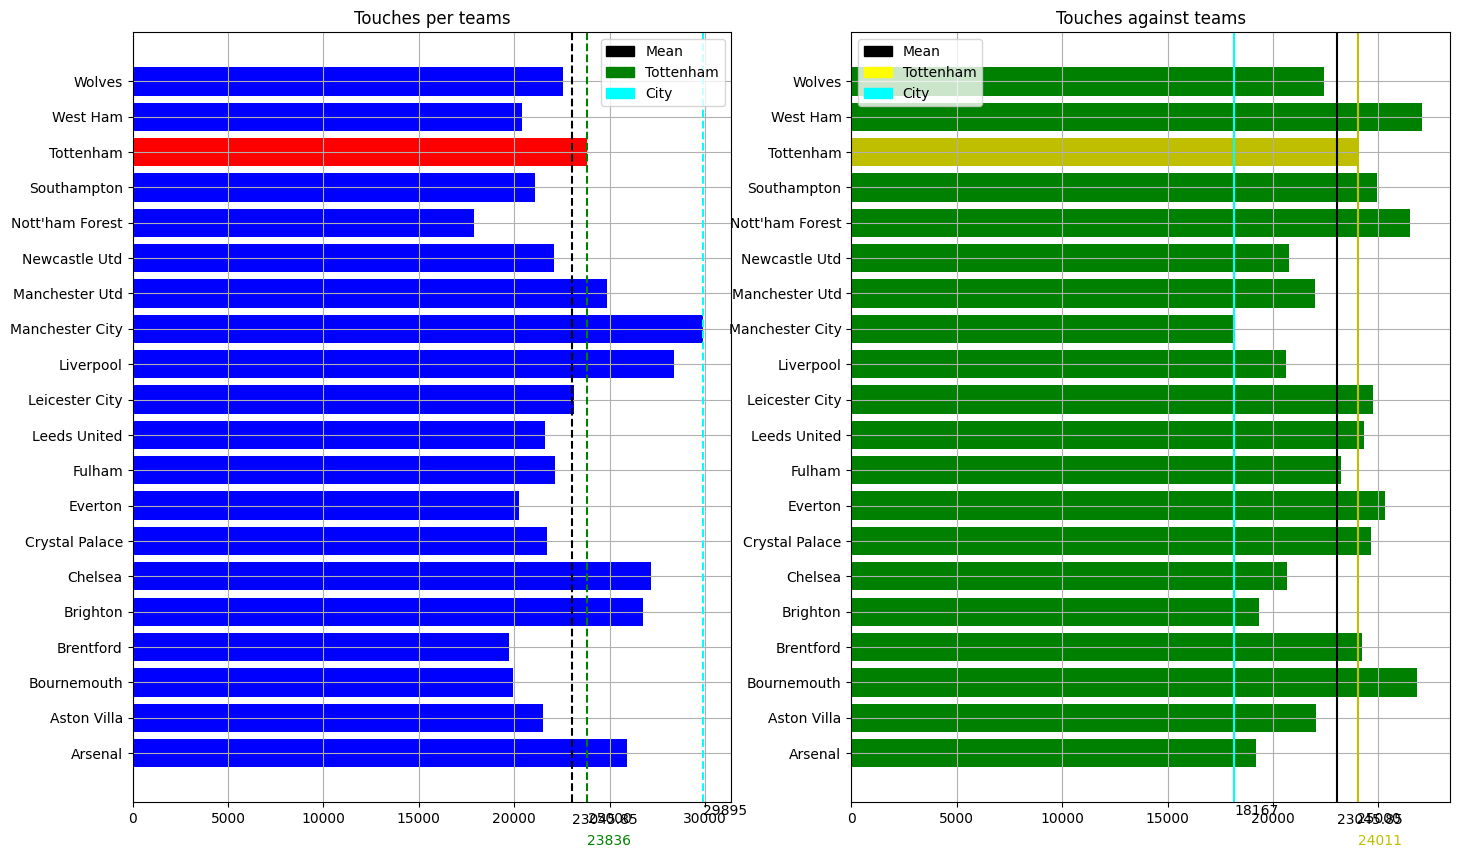

In [5]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico.keys()),list(dico.values()),color=colors)
ax[1].barh(list(dic.keys()),list(dic.values()),color=color)
ax[0].axvline(stat.mean(list(dico.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico.values())),-2, f'{stat.mean(list(dico.values()))}',color='black')
ax[0].axvline(dico["Tottenham"],color='green',linestyle='--')
ax[0].text(dico["Tottenham"],-2.6, f'{dico["Tottenham"]}',color='green')
ax[0].axvline(dico["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico["Manchester City"],-1.75, f'{dico["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic.values())),-2, f'{stat.mean(list(dic.values()))}',color='black')
ax[1].axvline(dic["Tottenham"],color='y',linestyle='-')
ax[1].text(dic["Tottenham"],-2.6, f'{dic["Tottenham"]}',color='y')
ax[1].axvline(dic["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic["Manchester City"],-1.75, f'{dic["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Touches per teams')
ax[1].set_title('Touches against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.2 : Touches in Defensive Penalty Area***

In [6]:
dico1 = df.set_index('Squad')['Def Pen'].to_dict()
dic1 = df1.set_index('Squad')['Def Pen'].to_dict()

In [7]:
d2 = dico1.copy()
d3 = dico1.copy()
for (key,value) in d2.items():
  if value > np.percentile(list(d2.values()),90):
    d3[key]=2
  if value < np.percentile(list(d2.values()),90) and value > np.percentile(list(d2.values()),80):
    d3[key]=4
  if value < np.percentile(list(d2.values()),80) and value > np.percentile(list(d2.values()),70):
    d3[key]=6
  if value < np.percentile(list(d2.values()),70) and value > np.percentile(list(d2.values()),60):
    d3[key]=8
  if value < np.percentile(list(d2.values()),60) and value > np.percentile(list(d2.values()),50):
    d3[key]=10
  if value < np.percentile(list(d2.values()),50) and value > np.percentile(list(d2.values()),40):
    d3[key]=12
  if value < np.percentile(list(d2.values()),40) and value > np.percentile(list(d2.values()),30):
    d3[key]=14
  if value < np.percentile(list(d2.values()),30) and value > np.percentile(list(d2.values()),20):
    d3[key]=16
  if value < np.percentile(list(d2.values()),20) and value > np.percentile(list(d2.values()),10):
    d3[key]=18
  if value < np.percentile(list(d2.values()),10):
    d3[key]=20

pprint.pprint(d3)
print(f"Mean :{stat.mean(list(d3.values()))}\n")

dd2 = dic1.copy()
dd3 = dic1.copy()
for (key,value) in dd2.items():
  if value > np.percentile(list(dd2.values()),90):
    dd3[key]=20
  if value < np.percentile(list(dd2.values()),90) and value > np.percentile(list(dd2.values()),80):
    dd3[key]=18
  if value < np.percentile(list(dd2.values()),80) and value > np.percentile(list(dd2.values()),70):
    dd3[key]=16
  if value < np.percentile(list(dd2.values()),70) and value > np.percentile(list(dd2.values()),60):
    dd3[key]=14
  if value < np.percentile(list(dd2.values()),60) and value > np.percentile(list(dd2.values()),50):
    dd3[key]=12
  if value < np.percentile(list(dd2.values()),50) and value > np.percentile(list(dd2.values()),40):
    dd3[key]=10
  if value < np.percentile(list(dd2.values()),40) and value > np.percentile(list(dd2.values()),30):
    dd3[key]=8
  if value < np.percentile(list(dd2.values()),30) and value > np.percentile(list(dd2.values()),20):
    dd3[key]=6
  if value < np.percentile(list(dd2.values()),20) and value > np.percentile(list(dd2.values()),10):
    dd3[key]=4
  if value < np.percentile(list(dd2.values()),10):
    dd3[key]=2

pprint.pprint(dd3)
print(f"Mean :{stat.mean(list(dd3.values()))}\n")


{'Arsenal': 20,
 'Aston Villa': 4,
 'Bournemouth': 2,
 'Brentford': 10,
 'Brighton': 14,
 'Chelsea': 12,
 'Crystal Palace': 10,
 'Everton': 14,
 'Fulham': 12,
 'Leeds United': 18,
 'Leicester City': 6,
 'Liverpool': 16,
 'Manchester City': 18,
 'Manchester Utd': 8,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 6,
 'Southampton': 8,
 'Tottenham': 4,
 'West Ham': 16,
 'Wolves': 2}
Mean :11

{'Arsenal': 18,
 'Aston Villa': 4,
 'Bournemouth': 2,
 'Brentford': 8,
 'Brighton': 18,
 'Chelsea': 14,
 'Crystal Palace': 10,
 'Everton': 10,
 'Fulham': 12,
 'Leeds United': 12,
 'Leicester City': 4,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 8,
 'West Ham': 14,
 'Wolves': 6}
Mean :11



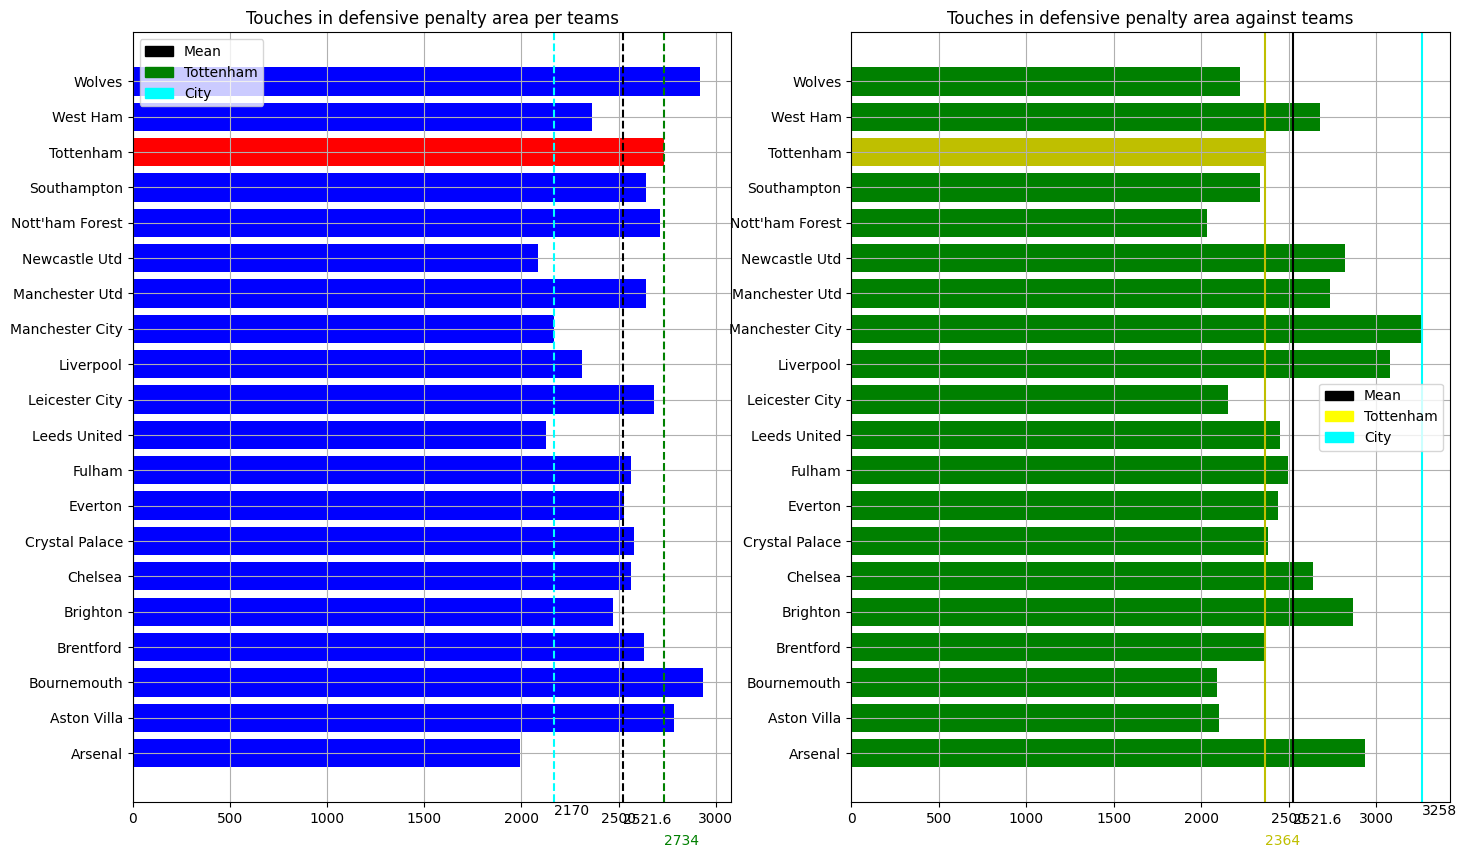

In [8]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico1.keys()),list(dico1.values()),color=colors)
ax[1].barh(list(dic1.keys()),list(dic1.values()),color=color)
ax[0].axvline(stat.mean(list(dico1.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico1.values())),-2, f'{stat.mean(list(dico1.values()))}',color='black')
ax[0].axvline(dico1["Tottenham"],color='green',linestyle='--')
ax[0].text(dico1["Tottenham"],-2.6, f'{dico1["Tottenham"]}',color='green')
ax[0].axvline(dico1["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico1["Manchester City"],-1.75, f'{dico1["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic1.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic1.values())),-2, f'{stat.mean(list(dic1.values()))}',color='black')
ax[1].axvline(dic1["Tottenham"],color='y',linestyle='-')
ax[1].text(dic1["Tottenham"],-2.6, f'{dic1["Tottenham"]}',color='y')
ax[1].axvline(dic1["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic1["Manchester City"],-1.75, f'{dic1["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Touches in defensive penalty area per teams')
ax[1].set_title('Touches in defensive penalty area against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.3 : Touches in Attacking Penalty Area***

In [9]:
dico2 = df.set_index('Squad')['Att Pen'].to_dict()
dic2 = df1.set_index('Squad')['Att Pen'].to_dict()

In [10]:
d4 = dico2.copy()
d5 = dico2.copy()
for (key,value) in d4.items():
  if value > np.percentile(list(d4.values()),90):
    d5[key]=20
  if value <= np.percentile(list(d4.values()),90) and value > np.percentile(list(d4.values()),80):
    d5[key]=18
  if value <= np.percentile(list(d4.values()),80) and value > np.percentile(list(d4.values()),70):
    d5[key]=16
  if value <= np.percentile(list(d4.values()),70) and value > np.percentile(list(d4.values()),60):
    d5[key]=14
  if value <= np.percentile(list(d4.values()),60) and value > np.percentile(list(d4.values()),50):
    d5[key]=12
  if value <= np.percentile(list(d4.values()),50) and value > np.percentile(list(d4.values()),40):
    d5[key]=10
  if value <= np.percentile(list(d4.values()),40) and value > np.percentile(list(d4.values()),30):
    d5[key]=8
  if value <= np.percentile(list(d4.values()),30) and value > np.percentile(list(d4.values()),20):
    d5[key]=6
  if value <= np.percentile(list(d4.values()),20) and value > np.percentile(list(d4.values()),10):
    d5[key]=4
  if value <= np.percentile(list(d4.values()),10):
    d5[key]=2

pprint.pprint(d5)
print(f"Mean :{stat.mean(list(d5.values()))}\n")

dd4 = dic2.copy()
dd5 = dic2.copy()
for (key,value) in dd4.items():
  if value > np.percentile(list(dd4.values()),90):
    dd5[key]=2
  if value <= np.percentile(list(dd4.values()),90) and value > np.percentile(list(dd4.values()),80):
    dd5[key]=4
  if value <= np.percentile(list(dd4.values()),80) and value > np.percentile(list(dd4.values()),70):
    dd5[key]=6
  if value <= np.percentile(list(dd4.values()),70) and value > np.percentile(list(dd4.values()),60):
    dd5[key]=8
  if value <= np.percentile(list(dd4.values()),60) and value > np.percentile(list(dd4.values()),50):
    dd5[key]=10
  if value <= np.percentile(list(dd4.values()),50) and value > np.percentile(list(dd4.values()),40):
    dd5[key]=12
  if value <= np.percentile(list(dd4.values()),40) and value > np.percentile(list(dd4.values()),30):
    dd5[key]=14
  if value <= np.percentile(list(dd4.values()),30) and value > np.percentile(list(dd4.values()),20):
    dd5[key]=16
  if value <= np.percentile(list(dd4.values()),20) and value > np.percentile(list(dd4.values()),10):
    dd5[key]=18
  if value <= np.percentile(list(dd4.values()),10):
    dd5[key]=20

pprint.pprint(dd5)
print(f"Mean :{stat.mean(list(dd5.values()))}\n")

{'Arsenal': 20,
 'Aston Villa': 8,
 'Bournemouth': 4,
 'Brentford': 12,
 'Brighton': 16,
 'Chelsea': 14,
 'Crystal Palace': 10,
 'Everton': 6,
 'Fulham': 10,
 'Leeds United': 12,
 'Leicester City': 4,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 18,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 14,
 'West Ham': 8,
 'Wolves': 2}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 2,
 'Brentford': 12,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 6,
 'Fulham': 12,
 'Leeds United': 14,
 'Leicester City': 10,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 8,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 4,
 'Tottenham': 10,
 'West Ham': 8,
 'Wolves': 4}
Mean :11.1



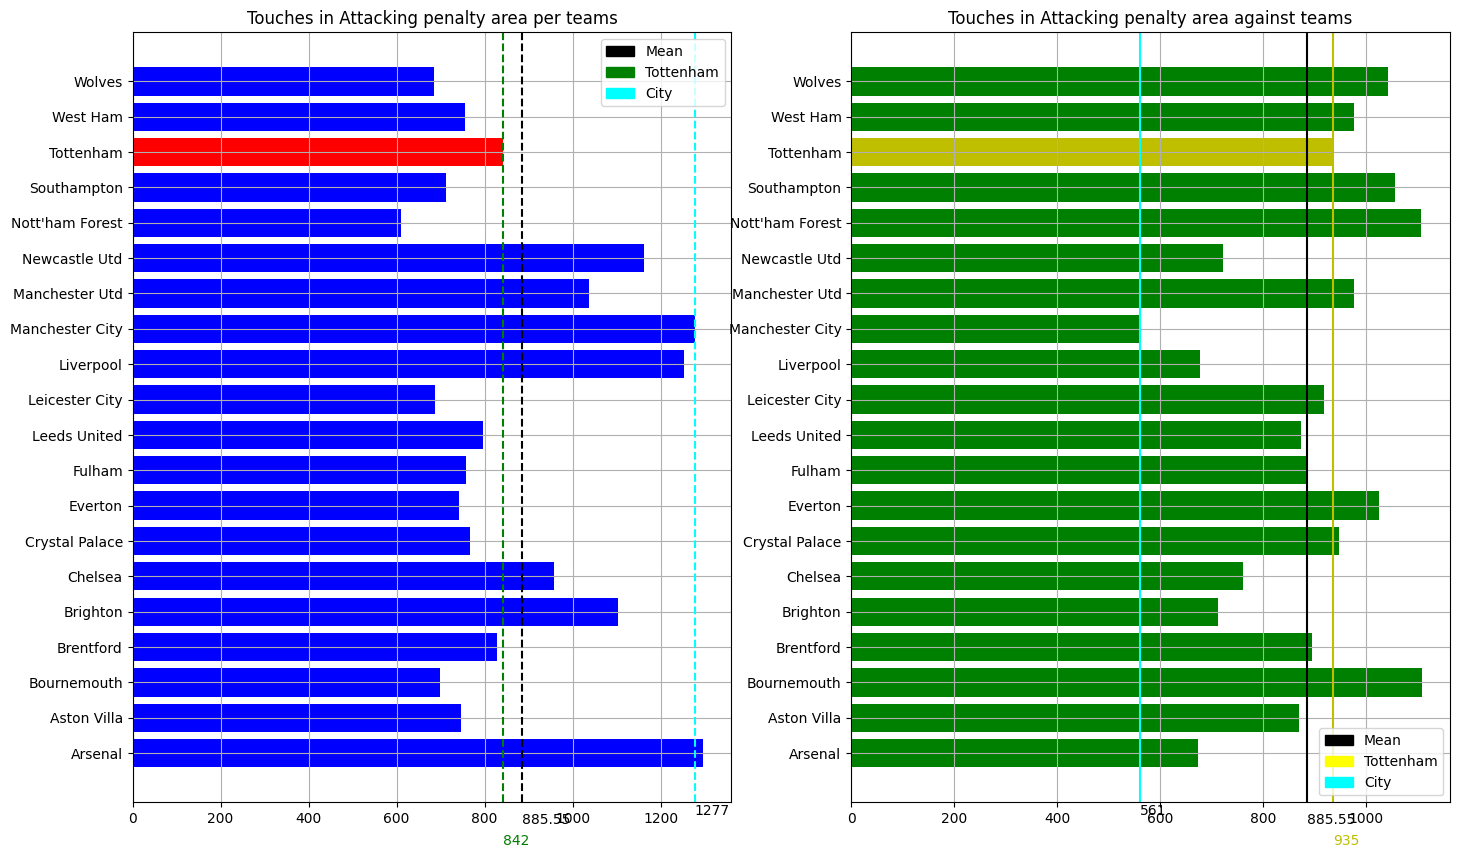

In [11]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico2.keys()),list(dico2.values()),color=colors)
ax[1].barh(list(dic2.keys()),list(dic2.values()),color=color)
ax[0].axvline(stat.mean(list(dico2.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico2.values())),-2, f'{stat.mean(list(dico2.values()))}',color='black')
ax[0].axvline(dico2["Tottenham"],color='green',linestyle='--')
ax[0].text(dico2["Tottenham"],-2.6, f'{dico2["Tottenham"]}',color='green')
ax[0].axvline(dico2["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico2["Manchester City"],-1.75, f'{dico2["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic2.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic2.values())),-2, f'{stat.mean(list(dic2.values()))}',color='black')
ax[1].axvline(dic2["Tottenham"],color='y',linestyle='-')
ax[1].text(dic2["Tottenham"],-2.6, f'{dic2["Tottenham"]}',color='y')
ax[1].axvline(dic2["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic2["Manchester City"],-1.75, f'{dic2["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Touches in Attacking penalty area per teams')
ax[1].set_title('Touches in Attacking penalty area against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.4/7.5/7.6 : Touches in Def3rd/Mid3rd/Att3rd***

In [12]:
dico3 = df.set_index('Squad')['Def 3rd'].to_dict()
dic3 = df1.set_index('Squad')['Def 3rd'].to_dict()
dico4 = df.set_index('Squad')['Mid 3rd'].to_dict()
dic4 = df1.set_index('Squad')['Mid 3rd'].to_dict()
dico5 = df.set_index('Squad')['Att 3rd'].to_dict()
dic5 = df1.set_index('Squad')['Att 3rd'].to_dict()

In [13]:
d6 = dico3.copy()
d7 = dico3.copy()
for (key,value) in d6.items():
  if value > np.percentile(list(d6.values()),90):
    d7[key]=2
  if value < np.percentile(list(d6.values()),90) and value > np.percentile(list(d6.values()),80):
    d7[key]=4
  if value < np.percentile(list(d6.values()),80) and value > np.percentile(list(d6.values()),70):
    d7[key]=6
  if value < np.percentile(list(d6.values()),70) and value > np.percentile(list(d6.values()),60):
    d7[key]=8
  if value < np.percentile(list(d6.values()),60) and value > np.percentile(list(d6.values()),50):
    d7[key]=10
  if value < np.percentile(list(d6.values()),50) and value > np.percentile(list(d6.values()),40):
    d7[key]=12
  if value < np.percentile(list(d6.values()),40) and value > np.percentile(list(d6.values()),30):
    d7[key]=14
  if value < np.percentile(list(d6.values()),30) and value > np.percentile(list(d6.values()),20):
    d7[key]=16
  if value < np.percentile(list(d6.values()),20) and value > np.percentile(list(d6.values()),10):
    d7[key]=18
  if value < np.percentile(list(d6.values()),10):
    d7[key]=20

pprint.pprint(d7)
print(f"Mean :{stat.mean(list(d7.values()))}\n")

dd6 = dic3.copy()
dd7 = dic3.copy()
for (key,value) in dd6.items():
  if value > np.percentile(list(dd6.values()),90):
    dd7[key]=20
  if value < np.percentile(list(dd6.values()),90) and value > np.percentile(list(dd6.values()),80):
    dd7[key]=18
  if value < np.percentile(list(dd6.values()),80) and value > np.percentile(list(dd6.values()),70):
    dd7[key]=16
  if value < np.percentile(list(dd6.values()),70) and value > np.percentile(list(dd6.values()),60):
    dd7[key]=14
  if value < np.percentile(list(dd6.values()),60) and value > np.percentile(list(dd6.values()),50):
    dd7[key]=12
  if value < np.percentile(list(dd6.values()),50) and value > np.percentile(list(dd6.values()),40):
    dd7[key]=10
  if value < np.percentile(list(dd6.values()),40) and value > np.percentile(list(dd6.values()),30):
    dd7[key]=8
  if value < np.percentile(list(dd6.values()),30) and value > np.percentile(list(dd6.values()),20):
    dd7[key]=6
  if value < np.percentile(list(dd6.values()),20) and value > np.percentile(list(dd6.values()),10):
    dd7[key]=4
  if value < np.percentile(list(dd6.values()),10):
    dd7[key]=2

pprint.pprint(dd7)
print(f"Mean :{stat.mean(list(dd7.values()))}\n")

{'Arsenal': 20,
 'Aston Villa': 8,
 'Bournemouth': 8,
 'Brentford': 16,
 'Brighton': 10,
 'Chelsea': 4,
 'Crystal Palace': 10,
 'Everton': 16,
 'Fulham': 12,
 'Leeds United': 18,
 'Leicester City': 4,
 'Liverpool': 6,
 'Manchester City': 14,
 'Manchester Utd': 6,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 14,
 'Southampton': 12,
 'Tottenham': 2,
 'West Ham': 18,
 'Wolves': 2}
Mean :11

{'Arsenal': 12,
 'Aston Villa': 4,
 'Bournemouth': 6,
 'Brentford': 2,
 'Brighton': 16,
 'Chelsea': 8,
 'Crystal Palace': 12,
 'Everton': 16,
 'Fulham': 14,
 'Leeds United': 18,
 'Leicester City': 8,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 10,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 6,
 'Southampton': 14,
 'Tottenham': 2,
 'West Ham': 20,
 'Wolves': 4}
Mean :11



In [14]:
d8 = dico4.copy()
d9 = dico4.copy()
for (key,value) in d8.items():
  if value > np.percentile(list(d8.values()),90):
    d9[key]=20
  if value < np.percentile(list(d8.values()),90) and value > np.percentile(list(d8.values()),80):
    d9[key]=18
  if value < np.percentile(list(d8.values()),80) and value > np.percentile(list(d8.values()),70):
    d9[key]=16
  if value < np.percentile(list(d8.values()),70) and value > np.percentile(list(d8.values()),60):
    d9[key]=14
  if value < np.percentile(list(d8.values()),60) and value > np.percentile(list(d8.values()),50):
    d9[key]=12
  if value < np.percentile(list(d8.values()),50) and value > np.percentile(list(d8.values()),40):
    d9[key]=10
  if value < np.percentile(list(d8.values()),40) and value > np.percentile(list(d8.values()),30):
    d9[key]=8
  if value < np.percentile(list(d8.values()),30) and value > np.percentile(list(d8.values()),20):
    d9[key]=6
  if value < np.percentile(list(d8.values()),20) and value > np.percentile(list(d8.values()),10):
    d9[key]=4
  if value < np.percentile(list(d8.values()),10):
    d9[key]=2

pprint.pprint(d9)
print(f"Mean :{stat.mean(list(d9.values()))}\n")

dd8 = dic4.copy()
dd9 = dic4.copy()
for (key,value) in dd8.items():
  if value > np.percentile(list(dd8.values()),90):
    dd9[key]=2
  if value < np.percentile(list(dd8.values()),90) and value > np.percentile(list(dd8.values()),80):
    dd9[key]=4
  if value < np.percentile(list(dd8.values()),80) and value > np.percentile(list(dd8.values()),70):
    dd9[key]=6
  if value < np.percentile(list(dd8.values()),70) and value > np.percentile(list(dd8.values()),60):
    dd9[key]=8
  if value < np.percentile(list(dd8.values()),60) and value > np.percentile(list(dd8.values()),50):
    dd9[key]=10
  if value < np.percentile(list(dd8.values()),50) and value > np.percentile(list(dd8.values()),40):
    dd9[key]=12
  if value < np.percentile(list(dd8.values()),40) and value > np.percentile(list(dd8.values()),30):
    dd9[key]=14
  if value < np.percentile(list(dd8.values()),30) and value > np.percentile(list(dd8.values()),20):
    dd9[key]=16
  if value < np.percentile(list(dd8.values()),20) and value > np.percentile(list(dd8.values()),10):
    dd9[key]=18
  if value < np.percentile(list(dd8.values()),10):
    dd9[key]=20

pprint.pprint(dd9)
print(f"Mean :{stat.mean(list(dd9.values()))}\n")

{'Arsenal': 16,
 'Aston Villa': 8,
 'Bournemouth': 4,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 18,
 'Crystal Palace': 10,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 12,
 'Leicester City': 14,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 8,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 14,
 'West Ham': 6,
 'Wolves': 10}
Mean :11

{'Arsenal': 18,
 'Aston Villa': 12,
 'Bournemouth': 4,
 'Brentford': 10,
 'Brighton': 20,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 6,
 'Fulham': 12,
 'Leeds United': 10,
 'Leicester City': 4,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 8,
 'West Ham': 2,
 'Wolves': 14}
Mean :11



In [15]:
d10 = dico5.copy()
d11 = dico5.copy()
for (key,value) in d10.items():
  if value > np.percentile(list(d10.values()),90):
    d11[key]=20
  if value < np.percentile(list(d10.values()),90) and value > np.percentile(list(d10.values()),80):
    d11[key]=18
  if value < np.percentile(list(d10.values()),80) and value > np.percentile(list(d10.values()),70):
    d11[key]=16
  if value < np.percentile(list(d10.values()),70) and value > np.percentile(list(d10.values()),60):
    d11[key]=14
  if value < np.percentile(list(d10.values()),60) and value > np.percentile(list(d10.values()),50):
    d11[key]=12
  if value < np.percentile(list(d10.values()),50) and value > np.percentile(list(d10.values()),40):
    d11[key]=10
  if value < np.percentile(list(d10.values()),40) and value > np.percentile(list(d10.values()),30):
    d11[key]=8
  if value < np.percentile(list(d10.values()),30) and value > np.percentile(list(d10.values()),20):
    d11[key]=6
  if value < np.percentile(list(d10.values()),20) and value > np.percentile(list(d10.values()),10):
    d11[key]=4
  if value < np.percentile(list(d10.values()),10):
    d11[key]=2

pprint.pprint(d11)
print(f"Mean :{stat.mean(list(d11.values()))}\n")

dd10 = dic5.copy()
dd11 = dic5.copy()
for (key,value) in dd10.items():
  if value > np.percentile(list(dd10.values()),90):
    dd11[key]=2
  if value < np.percentile(list(dd10.values()),90) and value > np.percentile(list(dd10.values()),80):
    dd11[key]=4
  if value < np.percentile(list(dd10.values()),80) and value > np.percentile(list(dd10.values()),70):
    dd11[key]=6
  if value < np.percentile(list(dd10.values()),70) and value > np.percentile(list(dd10.values()),60):
    dd11[key]=8
  if value < np.percentile(list(dd10.values()),60) and value > np.percentile(list(dd10.values()),50):
    dd11[key]=10
  if value < np.percentile(list(dd10.values()),50) and value > np.percentile(list(dd10.values()),40):
    dd11[key]=12
  if value < np.percentile(list(dd10.values()),40) and value > np.percentile(list(dd10.values()),30):
    dd11[key]=14
  if value < np.percentile(list(dd10.values()),30) and value > np.percentile(list(dd10.values()),20):
    dd11[key]=16
  if value < np.percentile(list(dd10.values()),20) and value > np.percentile(list(dd10.values()),10):
    dd11[key]=18
  if value < np.percentile(list(dd10.values()),10):
    dd11[key]=20

pprint.pprint(dd11)
print(f"Mean :{stat.mean(list(dd11.values()))}\n")

{'Arsenal': 20,
 'Aston Villa': 4,
 'Bournemouth': 2,
 'Brentford': 6,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 10,
 'Everton': 6,
 'Fulham': 12,
 'Leeds United': 14,
 'Leicester City': 4,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 14,
 "Nott'ham Forest": 2,
 'Southampton': 8,
 'Tottenham': 12,
 'West Ham': 10,
 'Wolves': 8}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 2,
 'Brentford': 4,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 10,
 'Everton': 6,
 'Fulham': 14,
 'Leeds United': 12,
 'Leicester City': 8,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 12,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 8,
 'Tottenham': 6,
 'West Ham': 4,
 'Wolves': 10}
Mean :11



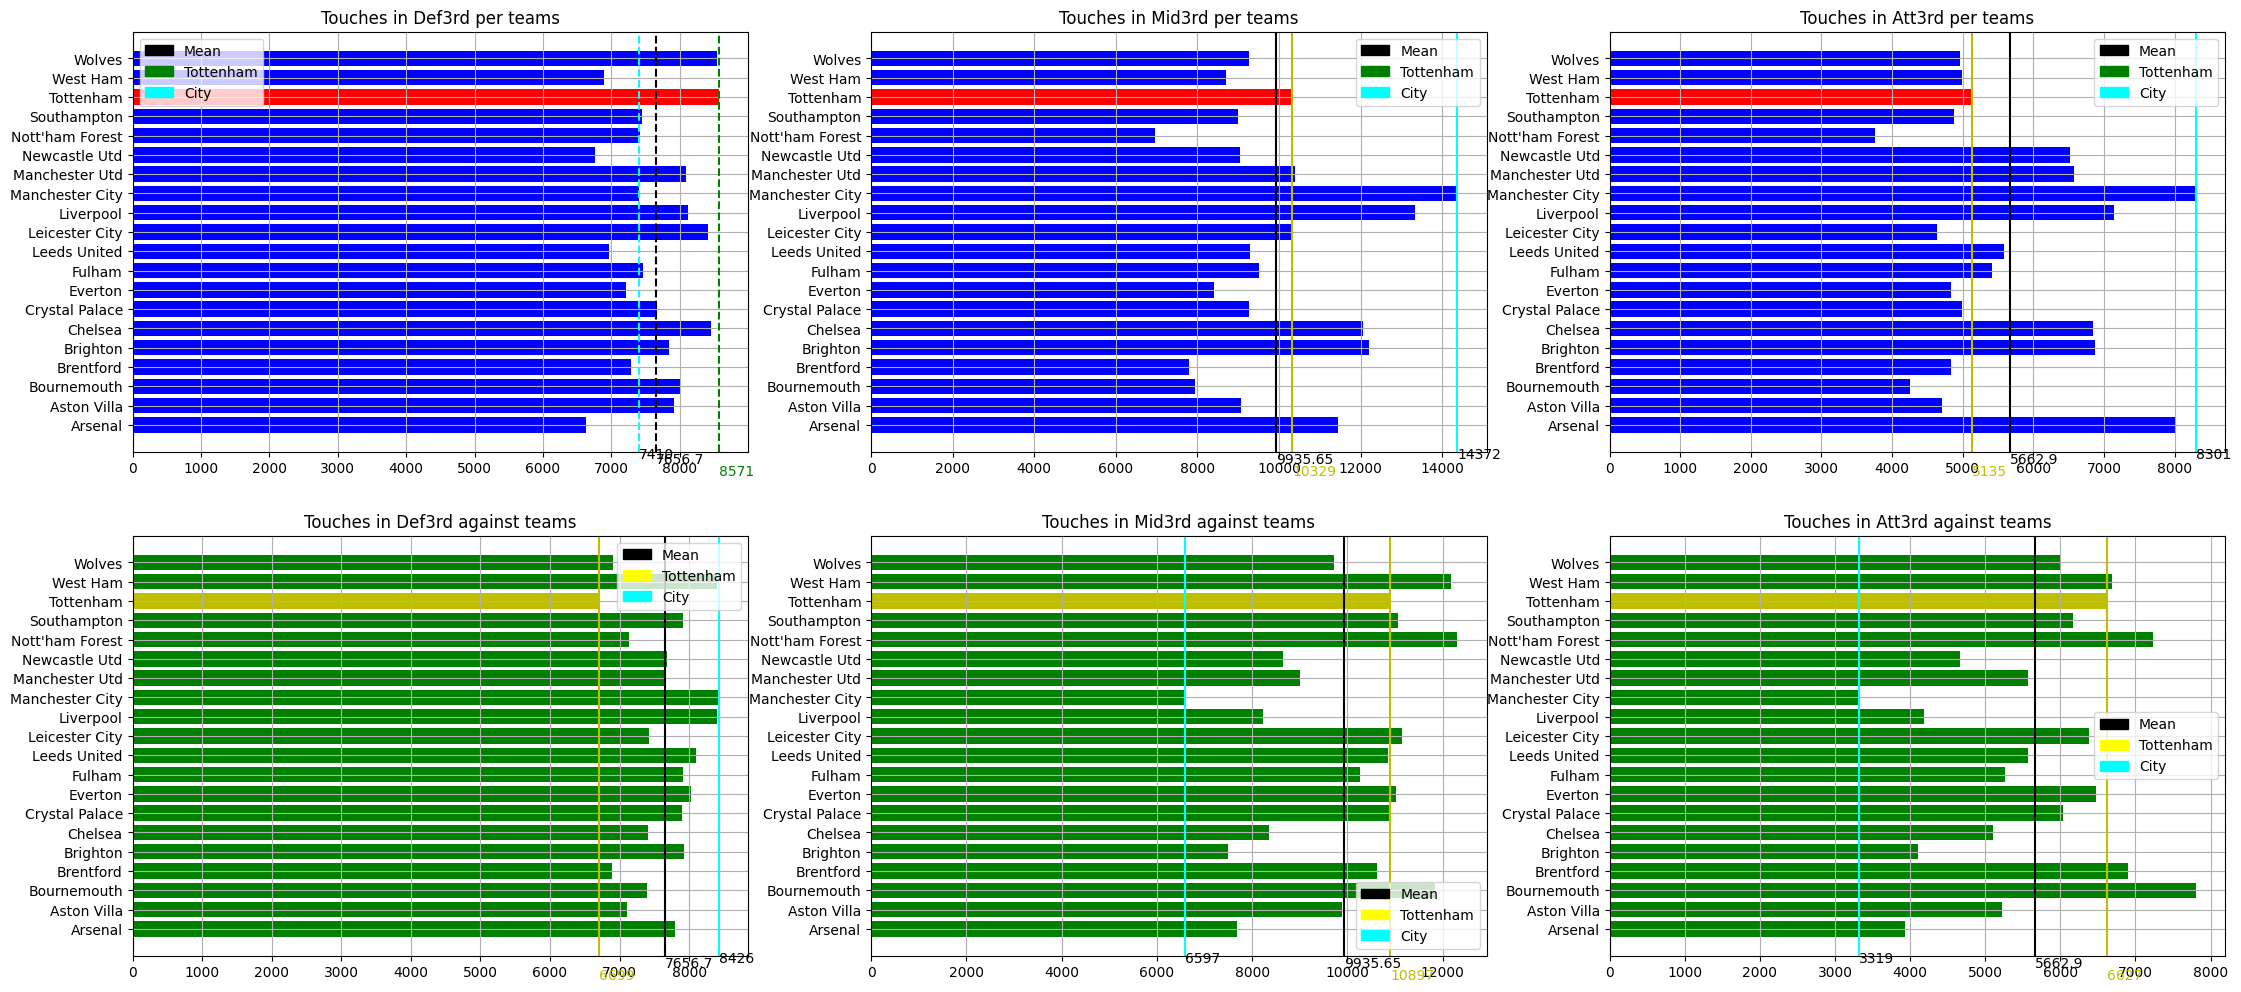

In [16]:
fig, ax = plt.subplots(2,3,figsize=(27,12))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0,0].barh(list(dico3.keys()),list(dico3.values()),color=colors)
ax[1,0].barh(list(dic3.keys()),list(dic3.values()),color=color)
ax[0,1].barh(list(dico4.keys()),list(dico4.values()),color=colors)
ax[1,1].barh(list(dic4.keys()),list(dic4.values()),color=color)
ax[0,2].barh(list(dico5.keys()),list(dico5.values()),color=colors)
ax[1,2].barh(list(dic5.keys()),list(dic5.values()),color=color)

ax[0,0].axvline(stat.mean(list(dico3.values())),color='black',linestyle='--')
ax[0,0].text(stat.mean(list(dico3.values())),-2, f'{stat.mean(list(dico3.values()))}',color='black')
ax[0,0].axvline(dico3["Tottenham"],color='green',linestyle='--')
ax[0,0].text(dico3["Tottenham"],-2.6, f'{dico3["Tottenham"]}',color='green')
ax[0,0].axvline(dico3["Manchester City"],color='cyan',linestyle='--')
ax[0,0].text(dico3["Manchester City"],-1.75, f'{dico3["Manchester City"]}')

ax[1,0].axvline(stat.mean(list(dic3.values())),color='black',linestyle='-')
ax[1,0].text(stat.mean(list(dic3.values())),-2, f'{stat.mean(list(dic3.values()))}',color='black')
ax[1,0].axvline(dic3["Tottenham"],color='y',linestyle='-')
ax[1,0].text(dic3["Tottenham"],-2.6, f'{dic3["Tottenham"]}',color='y')
ax[1,0].axvline(dic3["Manchester City"],color='cyan',linestyle='-')
ax[1,0].text(dic3["Manchester City"],-1.75, f'{dic3["Manchester City"]}')

ax[0,1].axvline(stat.mean(list(dico4.values())),color='black',linestyle='-')
ax[0,1].text(stat.mean(list(dico4.values())),-2, f'{stat.mean(list(dico4.values()))}',color='black')
ax[0,1].axvline(dico4["Tottenham"],color='y',linestyle='-')
ax[0,1].text(dico4["Tottenham"],-2.6, f'{dico4["Tottenham"]}',color='y')
ax[0,1].axvline(dico4["Manchester City"],color='cyan',linestyle='-')
ax[0,1].text(dico4["Manchester City"],-1.75, f'{dico4["Manchester City"]}')

ax[1,1].axvline(stat.mean(list(dic4.values())),color='black',linestyle='-')
ax[1,1].text(stat.mean(list(dic4.values())),-2, f'{stat.mean(list(dic4.values()))}',color='black')
ax[1,1].axvline(dic4["Tottenham"],color='y',linestyle='-')
ax[1,1].text(dic4["Tottenham"],-2.6, f'{dic4["Tottenham"]}',color='y')
ax[1,1].axvline(dic4["Manchester City"],color='cyan',linestyle='-')
ax[1,1].text(dic4["Manchester City"],-1.75, f'{dic4["Manchester City"]}')

ax[0,2].axvline(stat.mean(list(dico5.values())),color='black',linestyle='-')
ax[0,2].text(stat.mean(list(dico5.values())),-2, f'{stat.mean(list(dico5.values()))}',color='black')
ax[0,2].axvline(dico5["Tottenham"],color='y',linestyle='-')
ax[0,2].text(dico5["Tottenham"],-2.6, f'{dico5["Tottenham"]}',color='y')
ax[0,2].axvline(dico5["Manchester City"],color='cyan',linestyle='-')
ax[0,2].text(dico5["Manchester City"],-1.75, f'{dico5["Manchester City"]}')

ax[1,2].axvline(stat.mean(list(dic5.values())),color='black',linestyle='-')
ax[1,2].text(stat.mean(list(dic5.values())),-2, f'{stat.mean(list(dic5.values()))}',color='black')
ax[1,2].axvline(dic5["Tottenham"],color='y',linestyle='-')
ax[1,2].text(dic5["Tottenham"],-2.6, f'{dic5["Tottenham"]}',color='y')
ax[1,2].axvline(dic5["Manchester City"],color='cyan',linestyle='-')
ax[1,2].text(dic5["Manchester City"],-1.75, f'{dic5["Manchester City"]}')

p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0,0].legend(handles=[p1,p2,p3])
ax[0,1].legend(handles=[p1,p2,p3])
ax[0,2].legend(handles=[p1,p2,p3])
ax[1,0].legend(handles=[p1,p4,p3])
ax[1,1].legend(handles=[p1,p4,p3])
ax[1,2].legend(handles=[p1,p4,p3])

ax[0,0].set_title('Touches in Def3rd per teams')
ax[1,0].set_title('Touches in Def3rd against teams')

ax[0,1].set_title('Touches in Mid3rd per teams')
ax[1,1].set_title('Touches in Mid3rd against teams')

ax[0,2].set_title('Touches in Att3rd per teams')
ax[1,2].set_title('Touches in Att3rd against teams')
ax[0,0].grid(True)
ax[0,1].grid(True)
ax[0,2].grid(True)
ax[1,0].grid(True)
ax[1,1].grid(True)
ax[1,2].grid(True)

***subaxis7.7 : Take on Attempted***

In [17]:
dico6 = df.set_index('Squad')['Att'].to_dict()
dic6 = df1.set_index('Squad')['Att'].to_dict()

In [18]:
d12 = dico6.copy()
d13 = dico6.copy()
for (key,value) in d12.items():
  if value > np.percentile(list(d12.values()),90):
    d13[key]=20
  if value <= np.percentile(list(d12.values()),90) and value > np.percentile(list(d12.values()),80):
    d13[key]=18
  if value <= np.percentile(list(d12.values()),80) and value > np.percentile(list(d12.values()),70):
    d13[key]=16
  if value <= np.percentile(list(d12.values()),70) and value > np.percentile(list(d12.values()),60):
    d13[key]=14
  if value <= np.percentile(list(d12.values()),60) and value > np.percentile(list(d12.values()),50):
    d13[key]=12
  if value <= np.percentile(list(d12.values()),50) and value > np.percentile(list(d12.values()),40):
    d13[key]=10
  if value <= np.percentile(list(d12.values()),40) and value > np.percentile(list(d12.values()),30):
    d13[key]=8
  if value <= np.percentile(list(d12.values()),30) and value > np.percentile(list(d12.values()),20):
    d13[key]=6
  if value <= np.percentile(list(d12.values()),20) and value > np.percentile(list(d12.values()),10):
    d13[key]=4
  if value <= np.percentile(list(d12.values()),10):
    d13[key]=2

pprint.pprint(d13)
print(f"Mean :{stat.mean(list(d13.values()))}\n")

dd12 = dic6.copy()
dd13 = dic6.copy()
for (key,value) in dd12.items():
  if value > np.percentile(list(dd12.values()),90):
    dd13[key]=2
  if value <= np.percentile(list(dd12.values()),90) and value > np.percentile(list(dd12.values()),80):
    dd13[key]=4
  if value <= np.percentile(list(dd12.values()),80) and value > np.percentile(list(dd12.values()),70):
    dd13[key]=6
  if value <= np.percentile(list(dd12.values()),70) and value > np.percentile(list(dd12.values()),60):
    dd13[key]=8
  if value <= np.percentile(list(dd12.values()),60) and value > np.percentile(list(dd12.values()),50):
    dd13[key]=10
  if value <= np.percentile(list(dd12.values()),50) and value > np.percentile(list(dd12.values()),40):
    dd13[key]=12
  if value <= np.percentile(list(dd12.values()),40) and value > np.percentile(list(dd12.values()),30):
    dd13[key]=14
  if value <= np.percentile(list(dd12.values()),30) and value > np.percentile(list(dd12.values()),20):
    dd13[key]=16
  if value <= np.percentile(list(dd12.values()),20) and value > np.percentile(list(dd12.values()),10):
    dd13[key]=18
  if value <= np.percentile(list(dd12.values()),10):
    dd13[key]=20

pprint.pprint(dd13)
print(f"Mean :{stat.mean(list(dd13.values()))}\n")

{'Arsenal': 16,
 'Aston Villa': 8,
 'Bournemouth': 14,
 'Brentford': 4,
 'Brighton': 12,
 'Chelsea': 20,
 'Crystal Palace': 20,
 'Everton': 8,
 'Fulham': 2,
 'Leeds United': 10,
 'Leicester City': 6,
 'Liverpool': 10,
 'Manchester City': 12,
 'Manchester Utd': 14,
 'Newcastle Utd': 18,
 "Nott'ham Forest": 2,
 'Southampton': 16,
 'Tottenham': 6,
 'West Ham': 4,
 'Wolves': 18}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 6,
 'Bournemouth': 10,
 'Brentford': 12,
 'Brighton': 18,
 'Chelsea': 4,
 'Crystal Palace': 18,
 'Everton': 12,
 'Fulham': 14,
 'Leeds United': 2,
 'Leicester City': 2,
 'Liverpool': 4,
 'Manchester City': 20,
 'Manchester Utd': 8,
 'Newcastle Utd': 6,
 "Nott'ham Forest": 10,
 'Southampton': 14,
 'Tottenham': 16,
 'West Ham': 16,
 'Wolves': 8}
Mean :11



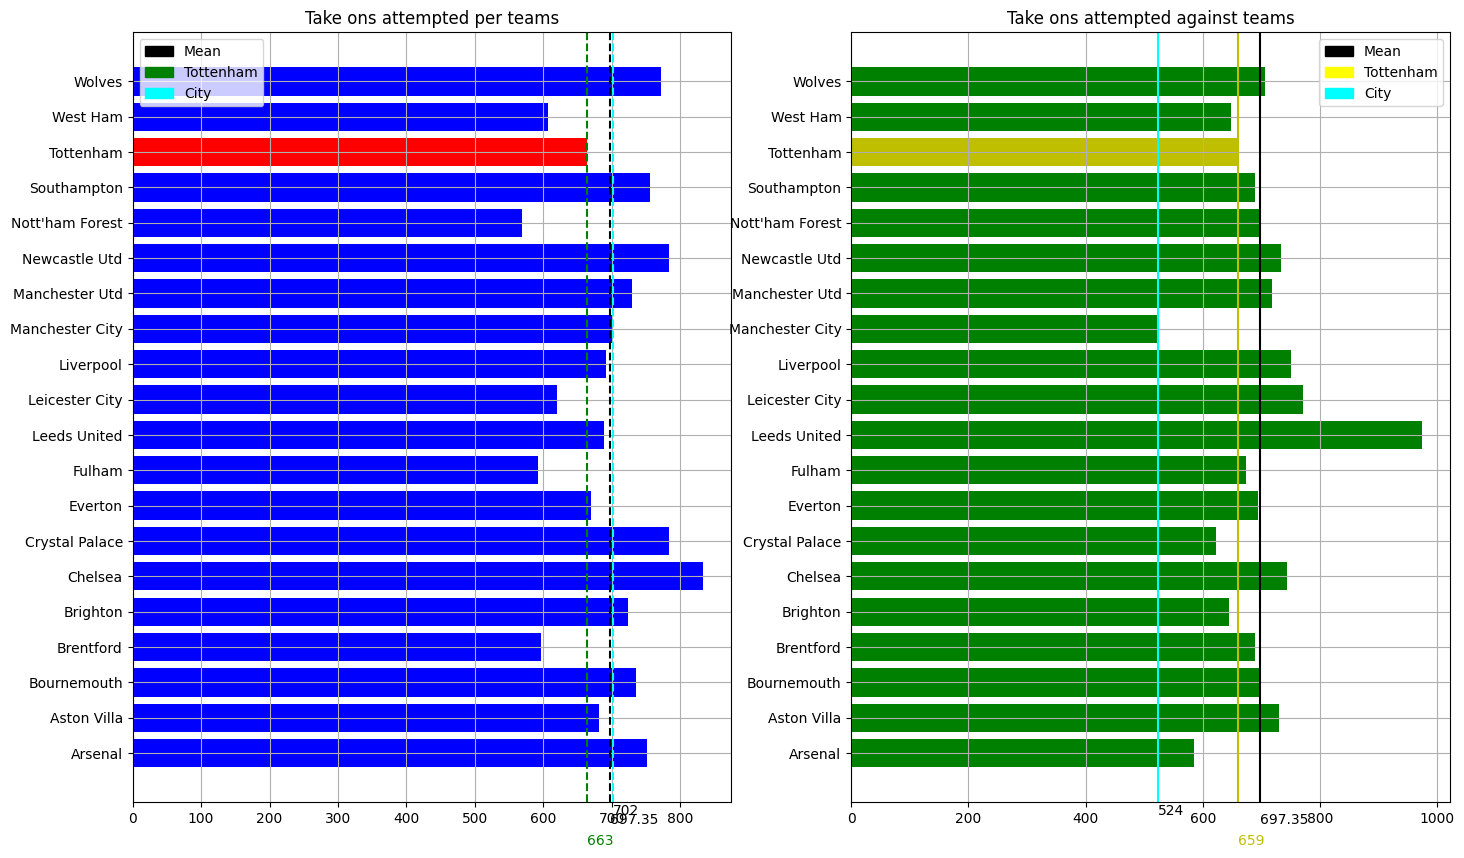

In [19]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico6.keys()),list(dico6.values()),color=colors)
ax[1].barh(list(dic6.keys()),list(dic6.values()),color=color)
ax[0].axvline(stat.mean(list(dico6.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico6.values())),-2, f'{stat.mean(list(dico6.values()))}',color='black')
ax[0].axvline(dico6["Tottenham"],color='green',linestyle='--')
ax[0].text(dico6["Tottenham"],-2.6, f'{dico6["Tottenham"]}',color='green')
ax[0].axvline(dico6["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico6["Manchester City"],-1.75, f'{dico6["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic6.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic6.values())),-2, f'{stat.mean(list(dic6.values()))}',color='black')
ax[1].axvline(dic6["Tottenham"],color='y',linestyle='-')
ax[1].text(dic6["Tottenham"],-2.6, f'{dic6["Tottenham"]}',color='y')
ax[1].axvline(dic6["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic6["Manchester City"],-1.75, f'{dic6["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Take ons attempted per teams')
ax[1].set_title('Take ons attempted against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.8 : %Take On Successfull***

In [20]:
dico7 = df.set_index('Squad')['Succ%'].to_dict()
dic7 = df1.set_index('Squad')['Succ%'].to_dict()

In [21]:
d14 = dico7.copy()
d15 = dico7.copy()
for (key,value) in d14.items():
  if value > np.percentile(list(d14.values()),90):
    d15[key]=20
  if value <= np.percentile(list(d14.values()),90) and value > np.percentile(list(d14.values()),80):
    d15[key]=18
  if value <= np.percentile(list(d14.values()),80) and value > np.percentile(list(d14.values()),70):
    d15[key]=16
  if value <= np.percentile(list(d14.values()),70) and value > np.percentile(list(d14.values()),60):
    d15[key]=14
  if value <= np.percentile(list(d14.values()),60) and value > np.percentile(list(d14.values()),50):
    d15[key]=12
  if value <= np.percentile(list(d14.values()),50) and value > np.percentile(list(d14.values()),40):
    d15[key]=10
  if value <= np.percentile(list(d14.values()),40) and value > np.percentile(list(d14.values()),30):
    d15[key]=8
  if value <= np.percentile(list(d14.values()),30) and value > np.percentile(list(d14.values()),20):
    d15[key]=6
  if value <= np.percentile(list(d14.values()),20) and value > np.percentile(list(d14.values()),10):
    d15[key]=4
  if value <= np.percentile(list(d14.values()),10):
    d15[key]=2

pprint.pprint(d15)
print(f"Mean :{stat.mean(list(d15.values()))}\n")

dd14 = dic7.copy()
dd15 = dic7.copy()
for (key,value) in dd14.items():
  if value > np.percentile(list(dd14.values()),90):
    dd15[key]=2
  if value <= np.percentile(list(dd14.values()),90) and value > np.percentile(list(dd14.values()),80):
    dd15[key]=4
  if value <= np.percentile(list(dd14.values()),80) and value > np.percentile(list(dd14.values()),70):
    dd15[key]=6
  if value <= np.percentile(list(dd14.values()),70) and value > np.percentile(list(dd14.values()),60):
    dd15[key]=8
  if value <= np.percentile(list(dd14.values()),60) and value > np.percentile(list(dd14.values()),50):
    dd15[key]=10
  if value <= np.percentile(list(dd14.values()),50) and value > np.percentile(list(dd14.values()),40):
    dd15[key]=12
  if value <= np.percentile(list(dd14.values()),40) and value > np.percentile(list(dd14.values()),30):
    dd15[key]=14
  if value <= np.percentile(list(dd14.values()),30) and value > np.percentile(list(dd14.values()),20):
    dd15[key]=16
  if value <= np.percentile(list(dd14.values()),20) and value > np.percentile(list(dd14.values()),10):
    dd15[key]=18
  if value <= np.percentile(list(dd14.values()),10):
    dd15[key]=20

pprint.pprint(dd15)
print(f"Mean :{stat.mean(list(dd15.values()))}\n")

{'Arsenal': 14,
 'Aston Villa': 4,
 'Bournemouth': 6,
 'Brentford': 6,
 'Brighton': 18,
 'Chelsea': 10,
 'Crystal Palace': 16,
 'Everton': 12,
 'Fulham': 10,
 'Leeds United': 2,
 'Leicester City': 16,
 'Liverpool': 14,
 'Manchester City': 20,
 'Manchester Utd': 4,
 'Newcastle Utd': 8,
 "Nott'ham Forest": 8,
 'Southampton': 18,
 'Tottenham': 12,
 'West Ham': 2,
 'Wolves': 20}
Mean :11

{'Arsenal': 14,
 'Aston Villa': 10,
 'Bournemouth': 2,
 'Brentford': 2,
 'Brighton': 10,
 'Chelsea': 16,
 'Crystal Palace': 20,
 'Everton': 16,
 'Fulham': 18,
 'Leeds United': 6,
 'Leicester City': 4,
 'Liverpool': 4,
 'Manchester City': 6,
 'Manchester Utd': 18,
 'Newcastle Utd': 8,
 "Nott'ham Forest": 20,
 'Southampton': 12,
 'Tottenham': 12,
 'West Ham': 14,
 'Wolves': 8}
Mean :11



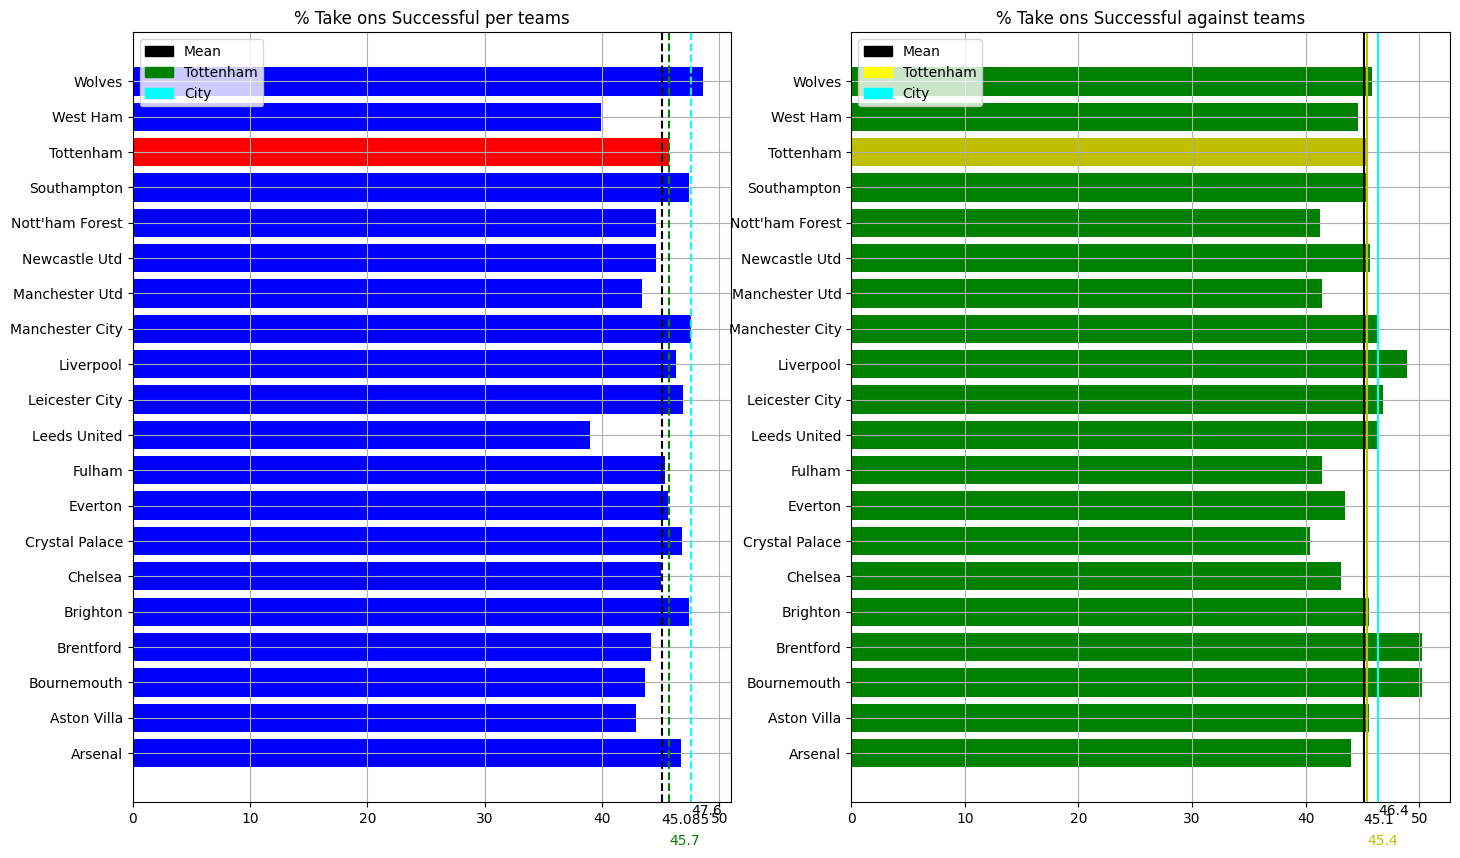

In [22]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico7.keys()),list(dico7.values()),color=colors)
ax[1].barh(list(dic7.keys()),list(dic7.values()),color=color)
ax[0].axvline(stat.mean(list(dico7.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico7.values())),-2, f'{stat.mean(list(dico7.values()))}',color='black')
ax[0].axvline(dico7["Tottenham"],color='green',linestyle='--')
ax[0].text(dico7["Tottenham"],-2.6, f'{dico7["Tottenham"]}',color='green')
ax[0].axvline(dico7["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico7["Manchester City"],-1.75, f'{dico7["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic7.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic7.values())),-2, f'{stat.mean(list(dic7.values()))}',color='black')
ax[1].axvline(dic7["Tottenham"],color='y',linestyle='-')
ax[1].text(dic7["Tottenham"],-2.6, f'{dic7["Tottenham"]}',color='y')
ax[1].axvline(dic7["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic7["Manchester City"],-1.75, f'{dic7["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('% Take ons Successful per teams')
ax[1].set_title('% Take ons Successful against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.9 : Tacle by a defender during take on attempt***

In [23]:
dico8 = df.set_index('Squad')['Tkld%'].to_dict()
dic8 = df1.set_index('Squad')['Tkld%'].to_dict()

In [24]:
d16 = dico8.copy()
d17 = dico8.copy()
for (key,value) in d16.items():
  if value > np.percentile(list(d16.values()),90):
    d17[key]=20
  if value <= np.percentile(list(d16.values()),90) and value > np.percentile(list(d16.values()),80):
    d17[key]=18
  if value <= np.percentile(list(d16.values()),80) and value > np.percentile(list(d16.values()),70):
    d17[key]=16
  if value <= np.percentile(list(d16.values()),70) and value > np.percentile(list(d16.values()),60):
    d17[key]=14
  if value <= np.percentile(list(d16.values()),60) and value > np.percentile(list(d16.values()),50):
    d17[key]=12
  if value <= np.percentile(list(d16.values()),50) and value > np.percentile(list(d16.values()),40):
    d17[key]=10
  if value <= np.percentile(list(d16.values()),40) and value > np.percentile(list(d16.values()),30):
    d17[key]=8
  if value <= np.percentile(list(d16.values()),30) and value > np.percentile(list(d16.values()),20):
    d17[key]=6
  if value <= np.percentile(list(d16.values()),20) and value > np.percentile(list(d16.values()),10):
    d17[key]=4
  if value <= np.percentile(list(d16.values()),10):
    d17[key]=2

pprint.pprint(d17)
print(f"Mean :{stat.mean(list(d17.values()))}\n")

dd16 = dic7.copy()
dd17 = dic7.copy()
for (key,value) in dd16.items():
  if value > np.percentile(list(dd16.values()),90):
    dd17[key]=2
  if value <= np.percentile(list(dd16.values()),90) and value > np.percentile(list(dd16.values()),80):
    dd17[key]=4
  if value <= np.percentile(list(dd16.values()),80) and value > np.percentile(list(dd16.values()),70):
    dd17[key]=6
  if value <= np.percentile(list(dd16.values()),70) and value > np.percentile(list(dd16.values()),60):
    dd17[key]=8
  if value <= np.percentile(list(dd16.values()),60) and value > np.percentile(list(dd16.values()),50):
    dd17[key]=10
  if value <= np.percentile(list(dd16.values()),50) and value > np.percentile(list(dd16.values()),40):
    dd17[key]=12
  if value <= np.percentile(list(dd16.values()),40) and value > np.percentile(list(dd16.values()),30):
    dd17[key]=14
  if value <= np.percentile(list(dd16.values()),30) and value > np.percentile(list(dd16.values()),20):
    dd17[key]=16
  if value <= np.percentile(list(dd16.values()),20) and value > np.percentile(list(dd16.values()),10):
    dd17[key]=18
  if value <= np.percentile(list(dd16.values()),10):
    dd17[key]=20

pprint.pprint(dd17)
print(f"Mean :{stat.mean(list(dd17.values()))}\n")

{'Arsenal': 4,
 'Aston Villa': 10,
 'Bournemouth': 20,
 'Brentford': 12,
 'Brighton': 2,
 'Chelsea': 14,
 'Crystal Palace': 6,
 'Everton': 18,
 'Fulham': 8,
 'Leeds United': 20,
 'Leicester City': 6,
 'Liverpool': 8,
 'Manchester City': 2,
 'Manchester Utd': 18,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 12,
 'Southampton': 14,
 'Tottenham': 16,
 'West Ham': 16,
 'Wolves': 4}
Mean :11

{'Arsenal': 14,
 'Aston Villa': 10,
 'Bournemouth': 2,
 'Brentford': 2,
 'Brighton': 10,
 'Chelsea': 16,
 'Crystal Palace': 20,
 'Everton': 16,
 'Fulham': 18,
 'Leeds United': 6,
 'Leicester City': 4,
 'Liverpool': 4,
 'Manchester City': 6,
 'Manchester Utd': 18,
 'Newcastle Utd': 8,
 "Nott'ham Forest": 20,
 'Southampton': 12,
 'Tottenham': 12,
 'West Ham': 14,
 'Wolves': 8}
Mean :11



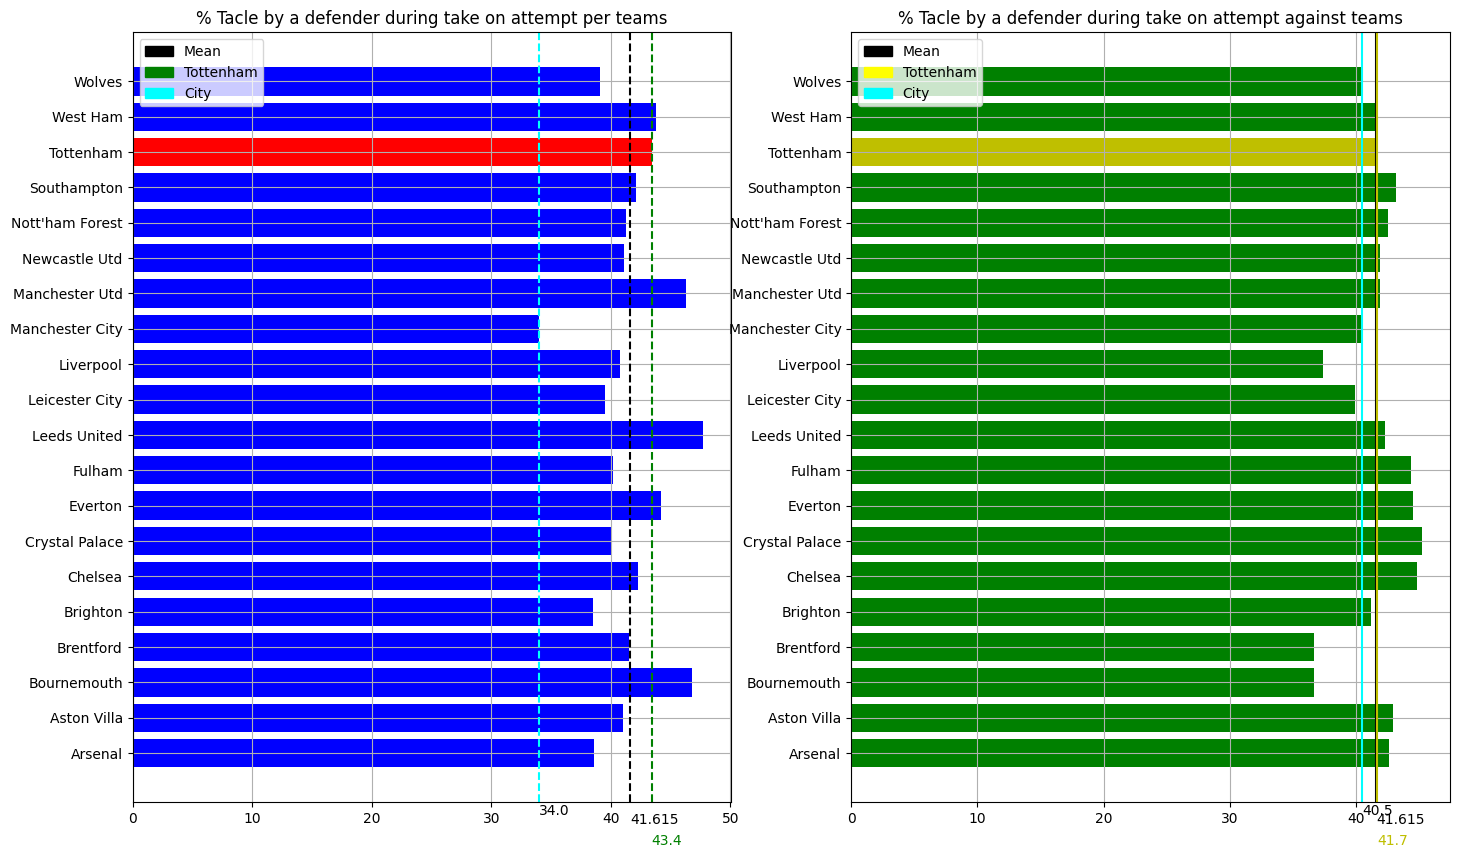

In [25]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico8.keys()),list(dico8.values()),color=colors)
ax[1].barh(list(dic8.keys()),list(dic8.values()),color=color)
ax[0].axvline(stat.mean(list(dico8.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico8.values())),-2, f'{stat.mean(list(dico8.values()))}',color='black')
ax[0].axvline(dico8["Tottenham"],color='green',linestyle='--')
ax[0].text(dico8["Tottenham"],-2.6, f'{dico8["Tottenham"]}',color='green')
ax[0].axvline(dico8["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico8["Manchester City"],-1.75, f'{dico8["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic8.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic8.values())),-2, f'{stat.mean(list(dic8.values()))}',color='black')
ax[1].axvline(dic8["Tottenham"],color='y',linestyle='-')
ax[1].text(dic8["Tottenham"],-2.6, f'{dic8["Tottenham"]}',color='y')
ax[1].axvline(dic8["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic8["Manchester City"],-1.75, f'{dic8["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('% Tacle by a defender during take on attempt per teams')
ax[1].set_title('% Tacle by a defender during take on attempt against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.10 : CPA***

In [26]:
dico9 = df.set_index('Squad')['CPA'].to_dict()
dic9 = df1.set_index('Squad')['CPA'].to_dict()

In [27]:
d18 = dico9.copy()
d19 = dico9.copy()
for (key,value) in d18.items():
  if value > np.percentile(list(d18.values()),90):
    d19[key]=20
  if value <= np.percentile(list(d18.values()),90) and value > np.percentile(list(d18.values()),80):
    d19[key]=18
  if value <= np.percentile(list(d18.values()),80) and value > np.percentile(list(d18.values()),70):
    d19[key]=16
  if value <= np.percentile(list(d18.values()),70) and value > np.percentile(list(d18.values()),60):
    d19[key]=14
  if value <= np.percentile(list(d18.values()),60) and value > np.percentile(list(d18.values()),50):
    d19[key]=12
  if value <= np.percentile(list(d18.values()),50) and value > np.percentile(list(d18.values()),40):
    d19[key]=10
  if value <= np.percentile(list(d18.values()),40) and value > np.percentile(list(d18.values()),30):
    d19[key]=8
  if value <= np.percentile(list(d18.values()),30) and value > np.percentile(list(d18.values()),20):
    d19[key]=6
  if value <= np.percentile(list(d18.values()),20) and value > np.percentile(list(d18.values()),10):
    d19[key]=4
  if value <= np.percentile(list(d18.values()),10):
    d19[key]=2

pprint.pprint(d19)
print(f"Mean :{stat.mean(list(d19.values()))}\n")

dd18 = dic9.copy()
dd19 = dic9.copy()
for (key,value) in dd18.items():
  if value > np.percentile(list(dd18.values()),90):
    dd19[key]=2
  if value <= np.percentile(list(dd18.values()),90) and value > np.percentile(list(dd18.values()),80):
    dd19[key]=4
  if value <= np.percentile(list(dd18.values()),80) and value > np.percentile(list(dd18.values()),70):
    dd19[key]=6
  if value <= np.percentile(list(dd18.values()),70) and value > np.percentile(list(dd18.values()),60):
    dd19[key]=8
  if value <= np.percentile(list(dd18.values()),60) and value > np.percentile(list(dd18.values()),50):
    dd19[key]=10
  if value <= np.percentile(list(dd18.values()),50) and value > np.percentile(list(dd18.values()),40):
    dd19[key]=12
  if value <= np.percentile(list(dd18.values()),40) and value > np.percentile(list(dd18.values()),30):
    dd19[key]=14
  if value <= np.percentile(list(dd18.values()),30) and value > np.percentile(list(dd18.values()),20):
    dd19[key]=16
  if value <= np.percentile(list(dd18.values()),20) and value > np.percentile(list(dd18.values()),10):
    dd19[key]=18
  if value <= np.percentile(list(dd18.values()),10):
    dd19[key]=20

pprint.pprint(dd19)
print(f"Mean :{stat.mean(list(dd19.values()))}\n")

{'Arsenal': 20,
 'Aston Villa': 10,
 'Bournemouth': 8,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 14,
 'Crystal Palace': 14,
 'Everton': 6,
 'Fulham': 4,
 'Leeds United': 8,
 'Leicester City': 12,
 'Liverpool': 16,
 'Manchester City': 20,
 'Manchester Utd': 18,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 4,
 'Tottenham': 12,
 'West Ham': 10,
 'Wolves': 6}
Mean :11

{'Arsenal': 18,
 'Aston Villa': 10,
 'Bournemouth': 8,
 'Brentford': 18,
 'Brighton': 12,
 'Chelsea': 14,
 'Crystal Palace': 20,
 'Everton': 6,
 'Fulham': 16,
 'Leeds United': 10,
 'Leicester City': 12,
 'Liverpool': 16,
 'Manchester City': 20,
 'Manchester Utd': 8,
 'Newcastle Utd': 14,
 "Nott'ham Forest": 4,
 'Southampton': 2,
 'Tottenham': 6,
 'West Ham': 2,
 'Wolves': 4}
Mean :11



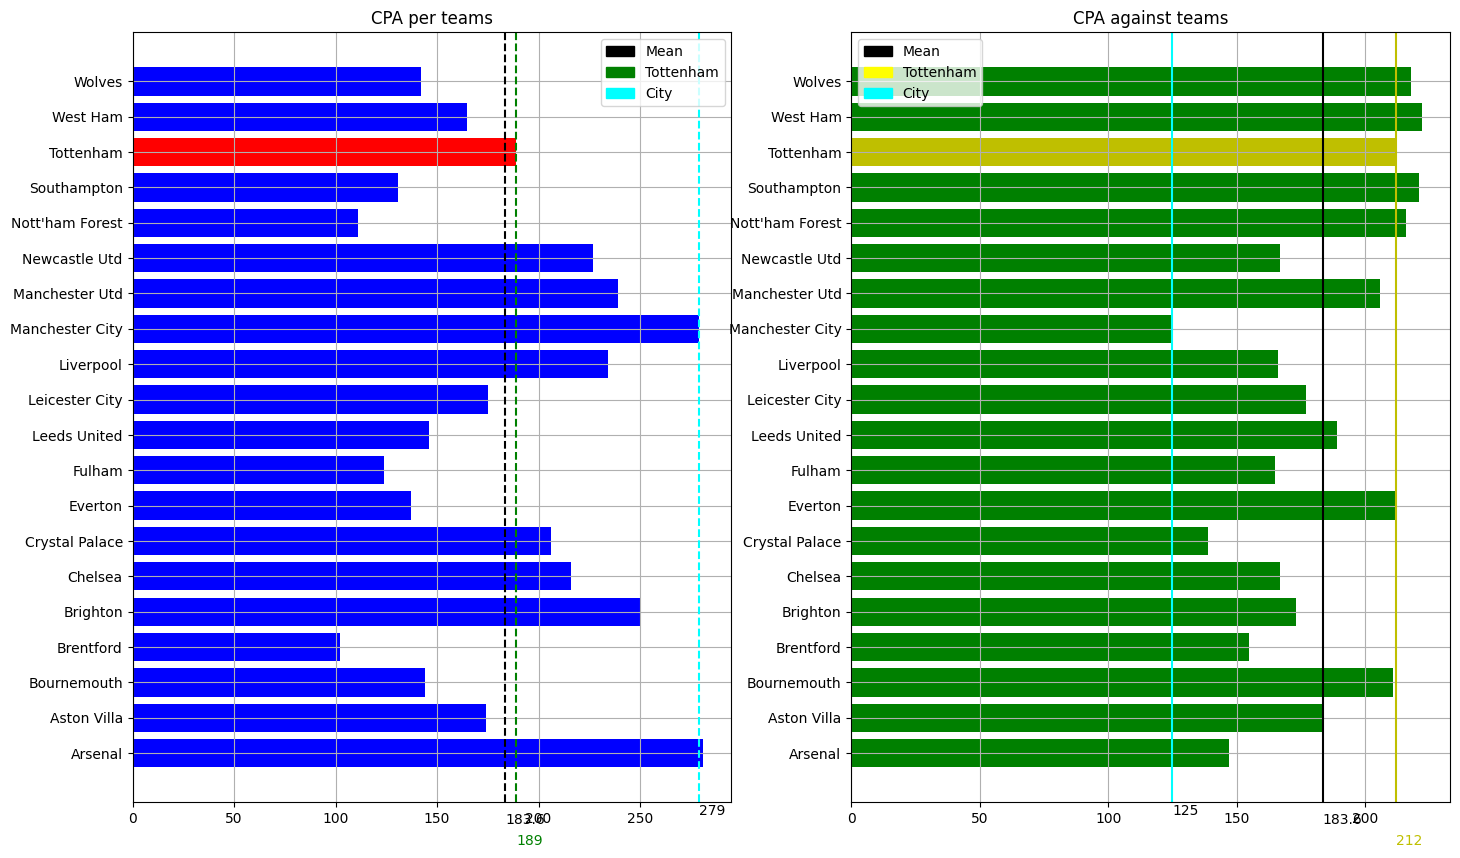

In [28]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico9.keys()),list(dico9.values()),color=colors)
ax[1].barh(list(dic9.keys()),list(dic9.values()),color=color)
ax[0].axvline(stat.mean(list(dico9.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico9.values())),-2, f'{stat.mean(list(dico9.values()))}',color='black')
ax[0].axvline(dico9["Tottenham"],color='green',linestyle='--')
ax[0].text(dico9["Tottenham"],-2.6, f'{dico9["Tottenham"]}',color='green')
ax[0].axvline(dico9["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico9["Manchester City"],-1.75, f'{dico9["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic9.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic9.values())),-2, f'{stat.mean(list(dic9.values()))}',color='black')
ax[1].axvline(dic9["Tottenham"],color='y',linestyle='-')
ax[1].text(dic9["Tottenham"],-2.6, f'{dic9["Tottenham"]}',color='y')
ax[1].axvline(dic9["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic9["Manchester City"],-1.75, f'{dic9["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('CPA per teams')
ax[1].set_title('CPA against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.11 : Player Dispossesed***

In [29]:
dico10 = df.set_index('Squad')['Dis'].to_dict()
dic10 = df1.set_index('Squad')['Dis'].to_dict()

In [30]:
d20 = dico10.copy()
d21 = dico10.copy()
for (key,value) in d20.items():
  if value > np.percentile(list(d20.values()),90):
    d21[key]=20
  if value <= np.percentile(list(d20.values()),90) and value > np.percentile(list(d20.values()),80):
    d21[key]=18
  if value <= np.percentile(list(d20.values()),80) and value > np.percentile(list(d20.values()),70):
    d21[key]=16
  if value <= np.percentile(list(d20.values()),70) and value > np.percentile(list(d20.values()),60):
    d21[key]=14
  if value <= np.percentile(list(d20.values()),60) and value > np.percentile(list(d20.values()),50):
    d21[key]=12
  if value <= np.percentile(list(d20.values()),50) and value > np.percentile(list(d20.values()),40):
    d21[key]=10
  if value <= np.percentile(list(d20.values()),40) and value > np.percentile(list(d20.values()),30):
    d21[key]=8
  if value <= np.percentile(list(d20.values()),30) and value > np.percentile(list(d20.values()),20):
    d21[key]=6
  if value <= np.percentile(list(d20.values()),20) and value > np.percentile(list(d20.values()),10):
    d21[key]=4
  if value <= np.percentile(list(d20.values()),10):
    d21[key]=2

pprint.pprint(d21)
print(f"Mean :{stat.mean(list(d21.values()))}\n")

dd20 = dic10.copy()
dd21 = dic10.copy()
for (key,value) in dd20.items():
  if value > np.percentile(list(dd20.values()),90):
    dd21[key]=2
  if value <= np.percentile(list(dd20.values()),90) and value > np.percentile(list(dd20.values()),80):
    dd21[key]=4
  if value <= np.percentile(list(dd20.values()),80) and value > np.percentile(list(dd20.values()),70):
    dd21[key]=6
  if value <= np.percentile(list(dd20.values()),70) and value > np.percentile(list(dd20.values()),60):
    dd21[key]=8
  if value <= np.percentile(list(dd20.values()),60) and value > np.percentile(list(dd20.values()),50):
    dd21[key]=10
  if value <= np.percentile(list(dd20.values()),50) and value > np.percentile(list(dd20.values()),40):
    dd21[key]=12
  if value <= np.percentile(list(dd20.values()),40) and value > np.percentile(list(dd20.values()),30):
    dd21[key]=14
  if value <= np.percentile(list(dd20.values()),30) and value > np.percentile(list(dd20.values()),20):
    dd21[key]=16
  if value <= np.percentile(list(dd20.values()),20) and value > np.percentile(list(dd20.values()),10):
    dd21[key]=18
  if value <= np.percentile(list(dd20.values()),10):
    dd21[key]=20

pprint.pprint(dd21)
print(f"Mean :{stat.mean(list(dd21.values()))}\n")

{'Arsenal': 14,
 'Aston Villa': 14,
 'Bournemouth': 12,
 'Brentford': 8,
 'Brighton': 6,
 'Chelsea': 16,
 'Crystal Palace': 20,
 'Everton': 4,
 'Fulham': 16,
 'Leeds United': 20,
 'Leicester City': 6,
 'Liverpool': 18,
 'Manchester City': 4,
 'Manchester Utd': 2,
 'Newcastle Utd': 12,
 "Nott'ham Forest": 2,
 'Southampton': 18,
 'Tottenham': 10,
 'West Ham': 10,
 'Wolves': 8}
Mean :11

{'Arsenal': 18,
 'Aston Villa': 16,
 'Bournemouth': 10,
 'Brentford': 14,
 'Brighton': 12,
 'Chelsea': 4,
 'Crystal Palace': 4,
 'Everton': 6,
 'Fulham': 16,
 'Leeds United': 2,
 'Leicester City': 6,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 10,
 'Newcastle Utd': 20,
 "Nott'ham Forest": 8,
 'Southampton': 2,
 'Tottenham': 12,
 'West Ham': 14,
 'Wolves': 8}
Mean :11



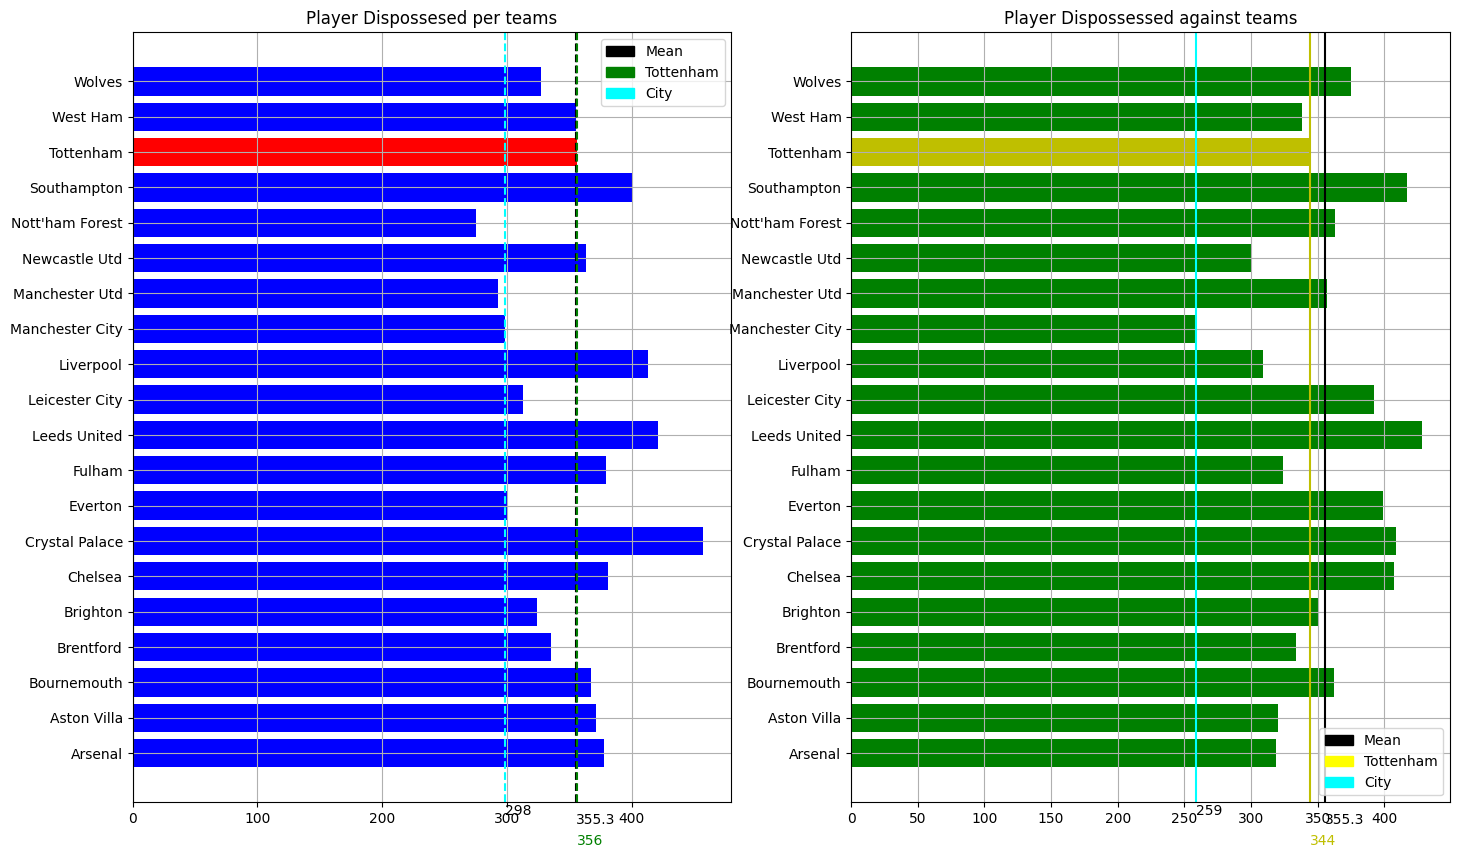

In [31]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico10.keys()),list(dico10.values()),color=colors)
ax[1].barh(list(dic10.keys()),list(dic10.values()),color=color)
ax[0].axvline(stat.mean(list(dico10.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico10.values())),-2, f'{stat.mean(list(dico10.values()))}',color='black')
ax[0].axvline(dico10["Tottenham"],color='green',linestyle='--')
ax[0].text(dico10["Tottenham"],-2.6, f'{dico10["Tottenham"]}',color='green')
ax[0].axvline(dico10["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico10["Manchester City"],-1.75, f'{dico10["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic10.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic10.values())),-2, f'{stat.mean(list(dic10.values()))}',color='black')
ax[1].axvline(dic10["Tottenham"],color='y',linestyle='-')
ax[1].text(dic10["Tottenham"],-2.6, f'{dic10["Tottenham"]}',color='y')
ax[1].axvline(dic10["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic10["Manchester City"],-1.75, f'{dic10["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Player Dispossesed per teams')
ax[1].set_title('Player Dispossessed against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.12 : MissControls***

In [32]:
dico11 = df.set_index('Squad')['Mis'].to_dict()
dic11 = df1.set_index('Squad')['Mis'].to_dict()

In [33]:
d22 = dico11.copy()
d23 = dico11.copy()
for (key,value) in d22.items():
  if value > np.percentile(list(d22.values()),90):
    d23[key]=20
  if value <= np.percentile(list(d22.values()),90) and value > np.percentile(list(d22.values()),80):
    d23[key]=18
  if value <= np.percentile(list(d22.values()),80) and value > np.percentile(list(d22.values()),70):
    d23[key]=16
  if value <= np.percentile(list(d22.values()),70) and value > np.percentile(list(d22.values()),60):
    d23[key]=14
  if value <= np.percentile(list(d22.values()),60) and value > np.percentile(list(d22.values()),50):
    d23[key]=12
  if value <= np.percentile(list(d22.values()),50) and value > np.percentile(list(d22.values()),40):
    d23[key]=10
  if value <= np.percentile(list(d22.values()),40) and value > np.percentile(list(d22.values()),30):
    d23[key]=8
  if value <= np.percentile(list(d22.values()),30) and value > np.percentile(list(d22.values()),20):
    d23[key]=6
  if value <= np.percentile(list(d22.values()),20) and value > np.percentile(list(d22.values()),10):
    d23[key]=4
  if value <= np.percentile(list(d22.values()),10):
    d23[key]=2

pprint.pprint(d23)
print(f"Mean :{stat.mean(list(d23.values()))}\n")

dd22 = dic11.copy()
dd23 = dic11.copy()
for (key,value) in dd22.items():
  if value > np.percentile(list(dd22.values()),90):
    dd23[key]=2
  if value <= np.percentile(list(dd22.values()),90) and value > np.percentile(list(dd22.values()),80):
    dd23[key]=4
  if value <= np.percentile(list(dd22.values()),80) and value > np.percentile(list(dd22.values()),70):
    dd23[key]=6
  if value <= np.percentile(list(dd22.values()),70) and value > np.percentile(list(dd22.values()),60):
    dd23[key]=8
  if value <= np.percentile(list(dd22.values()),60) and value > np.percentile(list(dd22.values()),50):
    dd23[key]=10
  if value <= np.percentile(list(dd22.values()),50) and value > np.percentile(list(dd22.values()),40):
    dd23[key]=12
  if value <= np.percentile(list(dd22.values()),40) and value > np.percentile(list(dd22.values()),30):
    dd23[key]=14
  if value <= np.percentile(list(dd22.values()),30) and value > np.percentile(list(dd22.values()),20):
    dd23[key]=16
  if value <= np.percentile(list(dd22.values()),20) and value > np.percentile(list(dd22.values()),10):
    dd23[key]=18
  if value <= np.percentile(list(dd22.values()),10):
    dd23[key]=20

pprint.pprint(dd23)
print(f"Mean :{stat.mean(list(dd23.values()))}\n")

{'Arsenal': 8,
 'Aston Villa': 12,
 'Bournemouth': 18,
 'Brentford': 6,
 'Brighton': 12,
 'Chelsea': 14,
 'Crystal Palace': 20,
 'Everton': 20,
 'Fulham': 8,
 'Leeds United': 18,
 'Leicester City': 10,
 'Liverpool': 16,
 'Manchester City': 2,
 'Manchester Utd': 4,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 10,
 'Southampton': 14,
 'Tottenham': 6,
 'West Ham': 2,
 'Wolves': 4}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 18,
 'Bournemouth': 10,
 'Brentford': 12,
 'Brighton': 18,
 'Chelsea': 12,
 'Crystal Palace': 4,
 'Everton': 6,
 'Fulham': 14,
 'Leeds United': 2,
 'Leicester City': 16,
 'Liverpool': 4,
 'Manchester City': 20,
 'Manchester Utd': 6,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 10,
 'Southampton': 2,
 'Tottenham': 14,
 'West Ham': 8,
 'Wolves': 8}
Mean :11



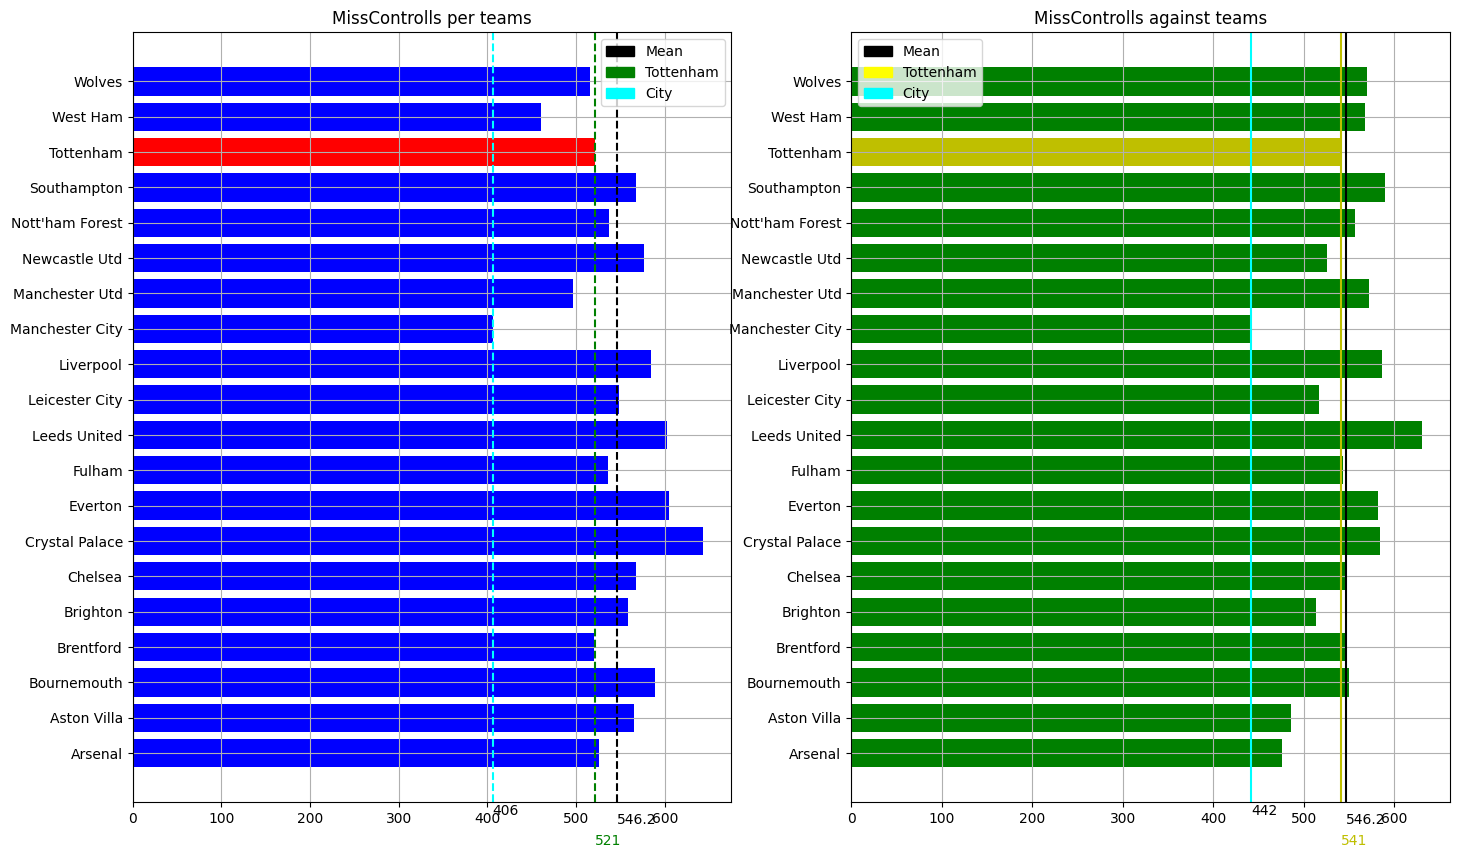

In [34]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico11.keys()),list(dico11.values()),color=colors)
ax[1].barh(list(dic11.keys()),list(dic11.values()),color=color)
ax[0].axvline(stat.mean(list(dico11.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico11.values())),-2, f'{stat.mean(list(dico11.values()))}',color='black')
ax[0].axvline(dico11["Tottenham"],color='green',linestyle='--')
ax[0].text(dico11["Tottenham"],-2.6, f'{dico11["Tottenham"]}',color='green')
ax[0].axvline(dico11["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico11["Manchester City"],-1.75, f'{dico11["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic11.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic11.values())),-2, f'{stat.mean(list(dic11.values()))}',color='black')
ax[1].axvline(dic11["Tottenham"],color='y',linestyle='-')
ax[1].text(dic11["Tottenham"],-2.6, f'{dic11["Tottenham"]}',color='y')
ax[1].axvline(dic11["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic11["Manchester City"],-1.75, f'{dic11["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('MissControlls per teams')
ax[1].set_title('MissControlls against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.13 : Total Distance the ball was controlled***

In [35]:
dico12 = df.set_index('Squad')['TotDist'].to_dict()
dic12 = df1.set_index('Squad')['TotDist'].to_dict()

In [36]:
d24 = dico12.copy()
d25 = dico12.copy()
for (key,value) in d24.items():
  if value > np.percentile(list(d24.values()),90):
    d25[key]=20
  if value <= np.percentile(list(d24.values()),90) and value > np.percentile(list(d24.values()),80):
    d25[key]=18
  if value <= np.percentile(list(d24.values()),80) and value > np.percentile(list(d24.values()),70):
    d25[key]=16
  if value <= np.percentile(list(d24.values()),70) and value > np.percentile(list(d24.values()),60):
    d25[key]=14
  if value <= np.percentile(list(d24.values()),60) and value > np.percentile(list(d24.values()),50):
    d25[key]=12
  if value <= np.percentile(list(d24.values()),50) and value > np.percentile(list(d24.values()),40):
    d25[key]=10
  if value <= np.percentile(list(d24.values()),40) and value > np.percentile(list(d24.values()),30):
    d25[key]=8
  if value <= np.percentile(list(d24.values()),30) and value > np.percentile(list(d24.values()),20):
    d25[key]=6
  if value <= np.percentile(list(d24.values()),20) and value > np.percentile(list(d24.values()),10):
    d25[key]=4
  if value <= np.percentile(list(d24.values()),10):
    d25[key]=2

pprint.pprint(d25)
print(f"Mean :{stat.mean(list(d25.values()))}\n")

dd24 = dic12.copy()
dd25 = dic12.copy()
for (key,value) in dd24.items():
  if value > np.percentile(list(dd24.values()),90):
    dd25[key]=2
  if value <= np.percentile(list(dd24.values()),90) and value > np.percentile(list(dd24.values()),80):
    dd25[key]=4
  if value <= np.percentile(list(dd24.values()),80) and value > np.percentile(list(dd24.values()),70):
    dd25[key]=6
  if value <= np.percentile(list(dd24.values()),70) and value > np.percentile(list(dd24.values()),60):
    dd25[key]=8
  if value <= np.percentile(list(dd24.values()),60) and value > np.percentile(list(dd24.values()),50):
    dd25[key]=10
  if value <= np.percentile(list(dd24.values()),50) and value > np.percentile(list(dd24.values()),40):
    dd25[key]=12
  if value <= np.percentile(list(dd24.values()),40) and value > np.percentile(list(dd24.values()),30):
    dd25[key]=14
  if value <= np.percentile(list(dd24.values()),30) and value > np.percentile(list(dd24.values()),20):
    dd25[key]=16
  if value <= np.percentile(list(dd24.values()),20) and value > np.percentile(list(dd24.values()),10):
    dd25[key]=18
  if value <= np.percentile(list(dd24.values()),10):
    dd25[key]=20

pprint.pprint(dd25)
print(f"Mean :{stat.mean(list(dd25.values()))}\n")

{'Arsenal': 20,
 'Aston Villa': 12,
 'Bournemouth': 4,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 18,
 'Crystal Palace': 8,
 'Everton': 6,
 'Fulham': 14,
 'Leeds United': 4,
 'Leicester City': 10,
 'Liverpool': 16,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 2,
 'Southampton': 8,
 'Tottenham': 16,
 'West Ham': 6,
 'Wolves': 12}
Mean :11

{'Arsenal': 18,
 'Aston Villa': 14,
 'Bournemouth': 4,
 'Brentford': 8,
 'Brighton': 20,
 'Chelsea': 16,
 'Crystal Palace': 6,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 12,
 'Leicester City': 6,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 2,
 'Southampton': 8,
 'Tottenham': 10,
 'West Ham': 2,
 'Wolves': 10}
Mean :11



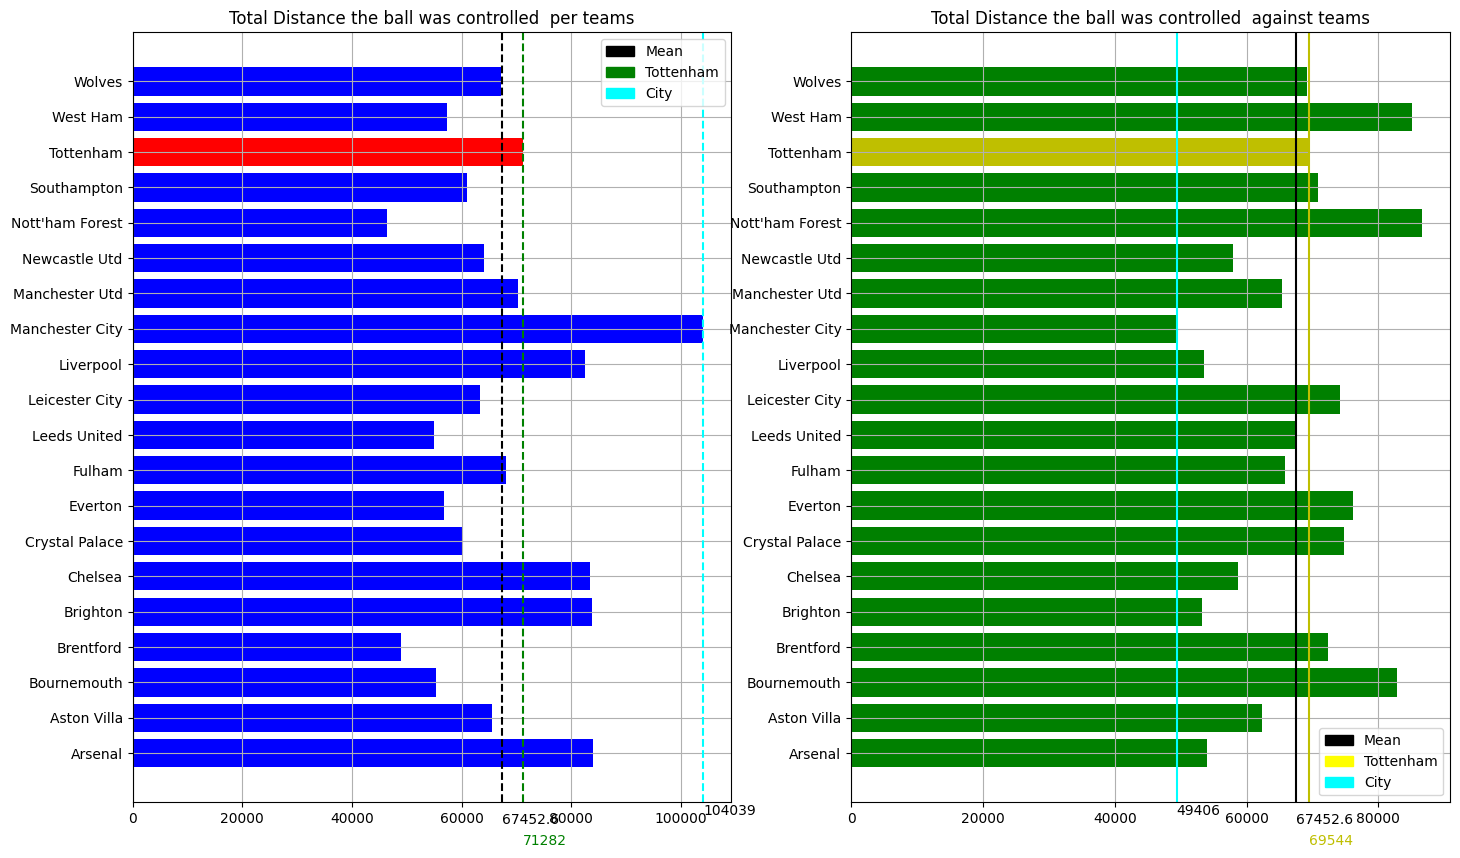

In [37]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico12.keys()),list(dico12.values()),color=colors)
ax[1].barh(list(dic12.keys()),list(dic12.values()),color=color)
ax[0].axvline(stat.mean(list(dico12.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico12.values())),-2, f'{stat.mean(list(dico12.values()))}',color='black')
ax[0].axvline(dico12["Tottenham"],color='green',linestyle='--')
ax[0].text(dico12["Tottenham"],-2.6, f'{dico12["Tottenham"]}',color='green')
ax[0].axvline(dico12["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico12["Manchester City"],-1.75, f'{dico12["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic12.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic12.values())),-2, f'{stat.mean(list(dic12.values()))}',color='black')
ax[1].axvline(dic12["Tottenham"],color='y',linestyle='-')
ax[1].text(dic12["Tottenham"],-2.6, f'{dic12["Tottenham"]}',color='y')
ax[1].axvline(dic12["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic12["Manchester City"],-1.75, f'{dic12["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Total Distance the ball was controlled  per teams')
ax[1].set_title('Total Distance the ball was controlled  against teams')
ax[0].grid(True)
ax[1].grid(True)

***subaxis7.14 : Number of pass received***

In [38]:
dico13 = df.set_index('Squad')['Rec'].to_dict()
dic13 = df1.set_index('Squad')['Rec'].to_dict()

In [39]:
d26 = dico13.copy()
d27 = dico13.copy()
for (key,value) in d26.items():
  if value > np.percentile(list(d26.values()),90):
    d27[key]=20
  if value <= np.percentile(list(d26.values()),90) and value > np.percentile(list(d26.values()),80):
    d27[key]=18
  if value <= np.percentile(list(d26.values()),80) and value > np.percentile(list(d26.values()),70):
    d27[key]=16
  if value <= np.percentile(list(d26.values()),70) and value > np.percentile(list(d26.values()),60):
    d27[key]=14
  if value <= np.percentile(list(d26.values()),60) and value > np.percentile(list(d26.values()),50):
    d27[key]=12
  if value <= np.percentile(list(d26.values()),50) and value > np.percentile(list(d26.values()),40):
    d27[key]=10
  if value <= np.percentile(list(d26.values()),40) and value > np.percentile(list(d26.values()),30):
    d27[key]=8
  if value <= np.percentile(list(d26.values()),30) and value > np.percentile(list(d26.values()),20):
    d27[key]=6
  if value <= np.percentile(list(d26.values()),20) and value > np.percentile(list(d26.values()),10):
    d27[key]=4
  if value <= np.percentile(list(d26.values()),10):
    d27[key]=2

pprint.pprint(d27)
print(f"Mean :{stat.mean(list(d27.values()))}\n")

dd26 = dic13.copy()
dd27 = dic13.copy()
for (key,value) in dd26.items():
  if value > np.percentile(list(dd26.values()),90):
    dd27[key]=2
  if value <= np.percentile(list(dd26.values()),90) and value > np.percentile(list(dd26.values()),80):
    dd27[key]=4
  if value <= np.percentile(list(dd26.values()),80) and value > np.percentile(list(dd26.values()),70):
    dd27[key]=6
  if value <= np.percentile(list(dd26.values()),70) and value > np.percentile(list(dd26.values()),60):
    dd27[key]=8
  if value <= np.percentile(list(dd26.values()),60) and value > np.percentile(list(dd26.values()),50):
    dd27[key]=10
  if value <= np.percentile(list(dd26.values()),50) and value > np.percentile(list(dd26.values()),40):
    dd27[key]=12
  if value <= np.percentile(list(dd26.values()),40) and value > np.percentile(list(dd26.values()),30):
    dd27[key]=14
  if value <= np.percentile(list(dd26.values()),30) and value > np.percentile(list(dd26.values()),20):
    dd27[key]=16
  if value <= np.percentile(list(dd26.values()),20) and value > np.percentile(list(dd26.values()),10):
    dd27[key]=18
  if value <= np.percentile(list(dd26.values()),10):
    dd27[key]=20

pprint.pprint(dd27)
print(f"Mean :{stat.mean(list(dd27.values()))}\n")

{'Arsenal': 16,
 'Aston Villa': 10,
 'Bournemouth': 4,
 'Brentford': 2,
 'Brighton': 18,
 'Chelsea': 18,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 8,
 'Leicester City': 14,
 'Liverpool': 20,
 'Manchester City': 20,
 'Manchester Utd': 16,
 'Newcastle Utd': 10,
 "Nott'ham Forest": 2,
 'Southampton': 6,
 'Tottenham': 14,
 'West Ham': 6,
 'Wolves': 12}
Mean :11

{'Arsenal': 20,
 'Aston Villa': 14,
 'Bournemouth': 2,
 'Brentford': 10,
 'Brighton': 18,
 'Chelsea': 16,
 'Crystal Palace': 8,
 'Everton': 4,
 'Fulham': 12,
 'Leeds United': 10,
 'Leicester City': 6,
 'Liverpool': 18,
 'Manchester City': 20,
 'Manchester Utd': 14,
 'Newcastle Utd': 16,
 "Nott'ham Forest": 4,
 'Southampton': 6,
 'Tottenham': 8,
 'West Ham': 2,
 'Wolves': 12}
Mean :11



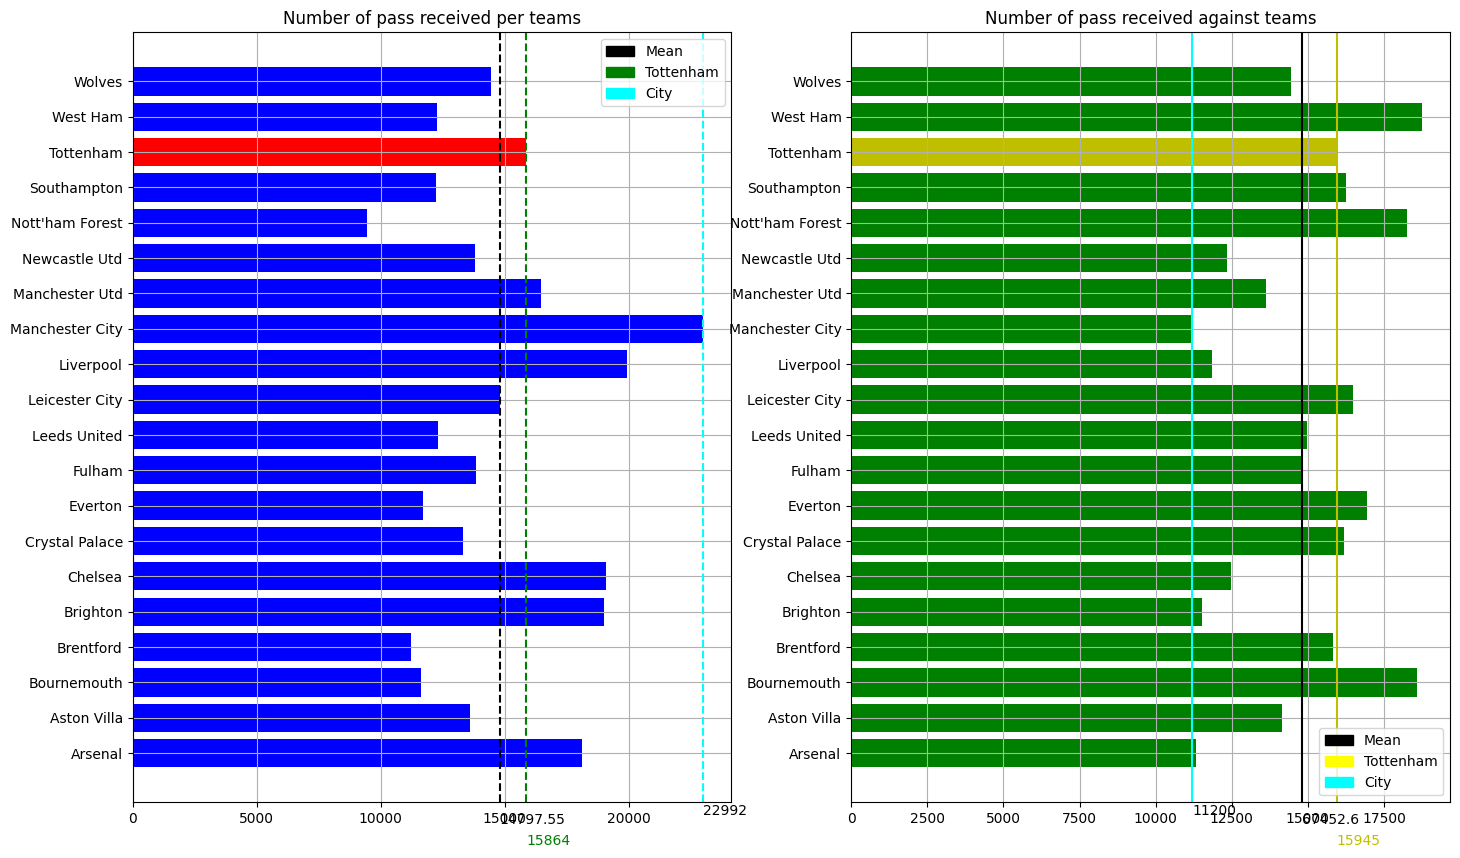

In [40]:
fig, ax = plt.subplots(1,2,figsize=(17,10))
colors = []
color = []
for value in list(dico.keys()):
  if value == "Tottenham":
    colors.append('r')
    color.append('y')
  else:
    colors.append('b')
    color.append('g')
ax[0].barh(list(dico13.keys()),list(dico13.values()),color=colors)
ax[1].barh(list(dic13.keys()),list(dic13.values()),color=color)
ax[0].axvline(stat.mean(list(dico13.values())),color='black',linestyle='--')
ax[0].text(stat.mean(list(dico13.values())),-2, f'{stat.mean(list(dico13.values()))}',color='black')
ax[0].axvline(dico13["Tottenham"],color='green',linestyle='--')
ax[0].text(dico13["Tottenham"],-2.6, f'{dico13["Tottenham"]}',color='green')
ax[0].axvline(dico13["Manchester City"],color='cyan',linestyle='--')
ax[0].text(dico13["Manchester City"],-1.75, f'{dico13["Manchester City"]}')
ax[1].axvline(stat.mean(list(dic13.values())),color='black',linestyle='-')
ax[1].text(stat.mean(list(dic13.values())),-2, f'{stat.mean(list(dic12.values()))}',color='black')
ax[1].axvline(dic13["Tottenham"],color='y',linestyle='-')
ax[1].text(dic13["Tottenham"],-2.6, f'{dic13["Tottenham"]}',color='y')
ax[1].axvline(dic13["Manchester City"],color='cyan',linestyle='-')
ax[1].text(dic13["Manchester City"],-1.75, f'{dic13["Manchester City"]}')
p1 = mpatches.Patch(color='black', label='Mean')
p2 = mpatches.Patch(color='green', label='Tottenham')
p4 = mpatches.Patch(color='yellow', label='Tottenham')
p3 = mpatches.Patch(color='cyan',label='City')
ax[0].legend(handles=[p1,p2,p3])
ax[1].legend(handles=[p1,p4,p3])
ax[0].set_title('Number of pass received per teams')
ax[1].set_title('Number of pass received against teams')
ax[0].grid(True)
ax[1].grid(True)

In [41]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    dictionnaire_moyenne[clé] = moyenne_valeur
  return dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [d1,dd1,d3,dd3,d5,dd5,d7,dd7,d9,dd9,d11,dd11,d13,dd13,d15,dd15,d17,dd17,d19,dd19,d21,dd21,d23,dd23,d25,dd25,d27,dd27]

dictionnaire_moyenne = calculer_moyenne(dictionnaires)

dictionnaire_moyenne = dict(sorted(dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(dictionnaire_moyenne)

Arsenal: 16.928571428571427
Manchester City: 16.571428571428573
Brighton: 15.142857142857142
Liverpool: 14.714285714285714
Chelsea: 13.928571428571429
Newcastle Utd: 13.714285714285714
Fulham: 12.142857142857142
Manchester Utd: 12.071428571428571
Crystal Palace: 11.714285714285714
Leeds United: 10.571428571428571
Tottenham: 10.214285714285714
Aston Villa: 10.0
Everton: 8.785714285714286
Southampton: 8.785714285714286
West Ham: 8.642857142857142
Wolves: 8.428571428571429
Leicester City: 7.928571428571429
Brentford: 7.642857142857143
Bournemouth: 6.285714285714286
Nott'ham Forest: 5.857142857142857


# ***2-Players Rating and Selection***

In [42]:
data = pd.read_excel('/content/all_players_possesion_stas.xlsx')
dicttt = data.set_index('Player')['Squad'].to_dict()
g = data.set_index('Player')['90s'].to_dict()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [43]:
def replace_nan_values_with_l_keys(l):
  """Returns a new dictionary containing the original list, with NaN values replaced by 0, and using the keys of l as the keys of the dictionary."""
  dictionary = {}
  for key, value in l.items():
    if math.isnan(value):
      dictionary[key] = 0
    else:
      dictionary[key] = value
  return dictionary

***subaxis7.1 : Touches***

In [44]:
poss = data.set_index('Player')['Touches'].to_dict()
possb = replace_nan_values_with_l_keys(poss)
d = possb.copy()

In [45]:
di = {
        (np.percentile(list(d.values()),0),np.percentile(list(d.values()),5)): 1,
        (np.percentile(list(d.values()),5),np.percentile(list(d.values()),10)): 2,
        (np.percentile(list(d.values()),10),np.percentile(list(d.values()),15)): 3,
        (np.percentile(list(d.values()),15),np.percentile(list(d.values()),20)):4,
        (np.percentile(list(d.values()),20),np.percentile(list(d.values()),25)): 5,
        (np.percentile(list(d.values()),25),np.percentile(list(d.values()),30)): 6,
        (np.percentile(list(d.values()),30),np.percentile(list(d.values()),35)): 7,
        (np.percentile(list(d.values()),35),np.percentile(list(d.values()),40)):8,
        (np.percentile(list(d.values()),40),np.percentile(list(d.values()),45)): 9,
        (np.percentile(list(d.values()),45),np.percentile(list(d.values()),50)): 10,
        (np.percentile(list(d.values()),50),np.percentile(list(d.values()),55)): 11,
        (np.percentile(list(d.values()),55),np.percentile(list(d.values()),60)):12,
        (np.percentile(list(d.values()),60),np.percentile(list(d.values()),65)): 13,
        (np.percentile(list(d.values()),65),np.percentile(list(d.values()),75)): 14,
        (np.percentile(list(d.values()),75),np.percentile(list(d.values()),80)):15,
        (np.percentile(list(d.values()),80),np.percentile(list(d.values()),85)): 16,
        (np.percentile(list(d.values()),85),np.percentile(list(d.values()),90)): 17,
        (np.percentile(list(d.values()),90),np.percentile(list(d.values()),96)): 18,
        (np.percentile(list(d.values()),96),np.percentile(list(d.values()),98)):19,
        (np.percentile(list(d.values()),98),np.percentile(list(d.values()),100)):20,
    }

def aux(d,key1,value):
    d[key1] = next((score for age_range, score in di.copy().items() if age_range[0] <= value <= age_range[1]))

In [46]:
ll= possb.copy()

for (key,value) in ll.copy().items():
  aux(ll,key,value)

pprint.pprint(ll)
print(f"Mean :{stat.mean(list(ll.values()))}\n")

{'Aaron Cresswell': 17,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 14,
 'Aaron Ramsey': 15,
 'Aaron Wan-Bissaka': 14,
 'Aaron Zehnter': 1,
 'Aarón Martín': 14,
 'Abdallah Sima': 10,
 'Abdelhamid Sabiri': 10,
 'Abdessamad Ezzalzouli': 12,
 'Abdou Diallo': 9,
 'Abdou Harroui': 8,
 'Abdoul Kader Bamba': 3,
 'Abdoulaye Bamba': 12,
 'Abdoulaye Doucouré': 11,
 'Abdu Conté': 13,
 'Abdul Mumin': 9,
 'Abdón Prats': 5,
 'Abner': 8,
 'Achraf Dari': 12,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 9,
 'Adam Buksa': 3,
 'Adam Forshaw': 7,
 'Adam Hložek': 9,
 'Adam Lallana': 8,
 'Adam Marušić': 18,
 'Adam Masina': 9,
 'Adam Ounas': 11,
 'Adam Smith': 17,
 'Adam Webster': 18,
 'Adama Soumaoro': 15,
 'Adama Traoré': 11,
 'Ademola Lookman': 13,
 'Adil Aouchiche': 6,
 'Adil Rami': 13,
 'Adnan Januzaj': 3,
 'Ado Onaiwu': 9,
 'Adolfo Gaich': 7,
 'Adri Embarba': 2,
 'Adrian Grbić': 2,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 16,
 'Adrien Thomasson': 11,
 'Adrien Truffert': 17,
 'Adrià Pedrosa'

In [47]:
tt0 = ll.copy()
ttt = dicttt.copy()
for (key,value) in tt0.copy().items():
  if value < np.percentile(list(tt0.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt0[key]
pprint.pprint(tt0)

{'Andre-Frank Zambo Anguissa': 20,
 'Andrew Robertson': 20,
 'Anthony Rouault': 20,
 'Arthur Theate': 20,
 'Benjamin André': 20,
 'Benjamin Pavard': 20,
 'Branco van den Boomen': 20,
 'Bruno Fernandes': 20,
 'Castello Lukeba': 20,
 'Daniel Parejo': 20,
 'Danilo': 20,
 'Dante': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Edmond Tapsoba': 20,
 'Enzo Le Fée': 20,
 'Facundo Medina': 20,
 'Fran Garcia': 20,
 'Frenkie de Jong': 20,
 'Giovanni Di Lorenzo': 20,
 'James Ward-Prowse': 20,
 'Javi Galán': 20,
 'Jean-Clair Todibo': 20,
 'Jordan Veretout': 20,
 'Joshua Kimmich': 20,
 'Kevin Danso': 20,
 'Kieran Trippier': 20,
 'Kim Min-jae': 20,
 'Lewis Dunk': 20,
 'Lionel Messi': 20,
 'Luke Shaw': 20,
 'Marc Guéhi': 20,
 'Marco Verratti': 20,
 'Marquinhos': 20,
 'Matteo Pessina': 20,
 'Max Kilman': 20,
 'Moisés Caicedo': 20,
 'Nico Elvedi': 20,
 'Pascal Groß': 20,
 'Pau Torres': 20,
 'Pierre Højbjerg': 20,
 'Rúben Neves': 20,
 'Sergej Milinković-Savić': 20,
 'Sergio Ramos': 20,
 'Stanislav Lo

***subaxis7.2 : Touches in Defensive Penalty area***

In [48]:
poss1 = data.set_index('Player')['Def Pen'].to_dict()
poss1b = replace_nan_values_with_l_keys(poss1)
d1 = poss1b.copy()

In [49]:
di1 = {
        (np.percentile(list(d1.values()),0),np.percentile(list(d1.values()),5)): 1,
        (np.percentile(list(d1.values()),5),np.percentile(list(d1.values()),10)): 2,
        (np.percentile(list(d1.values()),10),np.percentile(list(d1.values()),15)): 3,
        (np.percentile(list(d1.values()),15),np.percentile(list(d1.values()),20)):4,
        (np.percentile(list(d1.values()),20),np.percentile(list(d1.values()),25)): 5,
        (np.percentile(list(d1.values()),25),np.percentile(list(d1.values()),30)): 6,
        (np.percentile(list(d1.values()),30),np.percentile(list(d1.values()),35)): 7,
        (np.percentile(list(d1.values()),35),np.percentile(list(d1.values()),40)):8,
        (np.percentile(list(d1.values()),40),np.percentile(list(d1.values()),45)): 9,
        (np.percentile(list(d1.values()),45),np.percentile(list(d1.values()),50)): 10,
        (np.percentile(list(d1.values()),50),np.percentile(list(d1.values()),55)): 11,
        (np.percentile(list(d1.values()),55),np.percentile(list(d1.values()),60)):12,
        (np.percentile(list(d1.values()),60),np.percentile(list(d1.values()),65)): 13,
        (np.percentile(list(d1.values()),65),np.percentile(list(d1.values()),75)): 14,
        (np.percentile(list(d1.values()),75),np.percentile(list(d1.values()),80)):15,
        (np.percentile(list(d1.values()),80),np.percentile(list(d1.values()),85)): 16,
        (np.percentile(list(d1.values()),85),np.percentile(list(d1.values()),90)): 17,
        (np.percentile(list(d1.values()),90),np.percentile(list(d1.values()),96)): 18,
        (np.percentile(list(d1.values()),96),np.percentile(list(d1.values()),98)):19,
        (np.percentile(list(d1.values()),98),np.percentile(list(d1.values()),100)):20,
    }

def aux1(d,key1,value):
    d[key1] = next((score for age_range, score in di1.copy().items() if age_range[0] <= value <= age_range[1]))

In [50]:
ll1= poss1b.copy()

for (key,value) in ll1.copy().items():
  aux1(ll1,key,value)

pprint.pprint(ll1)
print(f"Mean :{stat.mean(list(ll1.values()))}\n")

{'Aaron Cresswell': 16,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 19,
 'Aaron Ramsey': 13,
 'Aaron Wan-Bissaka': 15,
 'Aaron Zehnter': 1,
 'Aarón Martín': 14,
 'Abdallah Sima': 10,
 'Abdelhamid Sabiri': 9,
 'Abdessamad Ezzalzouli': 4,
 'Abdou Diallo': 14,
 'Abdou Harroui': 9,
 'Abdoul Kader Bamba': 1,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 9,
 'Abdu Conté': 14,
 'Abdul Mumin': 14,
 'Abdón Prats': 4,
 'Abner': 11,
 'Achraf Dari': 17,
 'Achraf Hakimi': 14,
 'Adam Armstrong': 7,
 'Adam Buksa': 1,
 'Adam Forshaw': 6,
 'Adam Hložek': 7,
 'Adam Lallana': 5,
 'Adam Marušić': 16,
 'Adam Masina': 14,
 'Adam Ounas': 5,
 'Adam Smith': 16,
 'Adam Webster': 17,
 'Adama Soumaoro': 17,
 'Adama Traoré': 9,
 'Ademola Lookman': 3,
 'Adil Aouchiche': 6,
 'Adil Rami': 17,
 'Adnan Januzaj': 1,
 'Ado Onaiwu': 6,
 'Adolfo Gaich': 7,
 'Adri Embarba': 3,
 'Adrian Grbić': 1,
 'Adrien Hunou': 7,
 'Adrien Rabiot': 14,
 'Adrien Tameze': 16,
 'Adrien Thomasson': 11,
 'Adrien Truffert': 14,
 'Adrià Pedrosa': 6

In [51]:
tt1 = ll1.copy()
ttt = dicttt.copy()
for (key,value) in tt1.copy().items():
  if value < np.percentile(list(tt1.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt1[key]
pprint.pprint(tt1)

{'Alban Lafont': 20,
 'Alexander Nübel': 20,
 'Alisson': 20,
 'Andrea Consigli': 20,
 'Anthony Lopes': 20,
 'Bartłomiej Dr? gowski': 20,
 'Bernd Leno': 20,
 'Brice Samba': 20,
 'David Raya': 20,
 'David Soria': 20,
 'David de Gea': 20,
 'Ederson': 20,
 'Emiliano Martínez': 20,
 'Gauthier Gallon': 20,
 'Gavin Bazunu': 20,
 'Gianluigi Donnarumma': 20,
 'Giorgi Mamardashvili': 20,
 'Guglielmo Vicario': 20,
 'Illan Meslier': 20,
 'Ivan Provedel': 20,
 'Jeremías Ledesma': 20,
 'Jiří Pavlenka': 20,
 'Jordan Pickford': 20,
 'Jordi Masip': 20,
 'José Sá': 20,
 'Kasper Schmeichel': 20,
 'Koen Casteels': 20,
 'Lorenzo Montipò': 20,
 'Lukáš Hrádecký': 20,
 'Manuel Riemann': 20,
 'Marc-André ter Stegen': 20,
 'Marco Bizot': 20,
 'Marco Carnesecchi': 20,
 'Marco Silvestri': 20,
 'Mark Flekken': 20,
 'Marvin Schwäbe': 20,
 'Matz Sels': 20,
 'Maxime Dupé': 20,
 'Michele Di Gregorio': 20,
 'Mory Diaw': 20,
 'Oliver Baumann': 20,
 'Oliver Christensen': 20,
 'Paulo Gazzaniga': 20,
 'Pietro Terracciano':

***subaxis7.3 : Touches in Attacking penalty Area***

In [52]:
poss2 = data.set_index('Player')['Att Pen'].to_dict()
poss2b = replace_nan_values_with_l_keys(poss2)
d2 = poss2b.copy()

In [53]:
di2 = {
        (np.percentile(list(d2.values()),0),np.percentile(list(d2.values()),5)): 1,
        (np.percentile(list(d2.values()),5),np.percentile(list(d2.values()),10)): 2,
        (np.percentile(list(d2.values()),10),np.percentile(list(d2.values()),15)): 3,
        (np.percentile(list(d2.values()),15),np.percentile(list(d2.values()),20)):4,
        (np.percentile(list(d2.values()),20),np.percentile(list(d2.values()),25)): 5,
        (np.percentile(list(d2.values()),25),np.percentile(list(d2.values()),30)): 6,
        (np.percentile(list(d2.values()),30),np.percentile(list(d2.values()),35)): 7,
        (np.percentile(list(d2.values()),35),np.percentile(list(d2.values()),40)):8,
        (np.percentile(list(d2.values()),40),np.percentile(list(d2.values()),45)): 9,
        (np.percentile(list(d2.values()),45),np.percentile(list(d2.values()),50)): 10,
        (np.percentile(list(d2.values()),50),np.percentile(list(d2.values()),55)): 11,
        (np.percentile(list(d2.values()),55),np.percentile(list(d2.values()),60)):12,
        (np.percentile(list(d2.values()),60),np.percentile(list(d2.values()),65)): 13,
        (np.percentile(list(d2.values()),65),np.percentile(list(d2.values()),75)): 14,
        (np.percentile(list(d2.values()),75),np.percentile(list(d2.values()),80)):15,
        (np.percentile(list(d2.values()),80),np.percentile(list(d2.values()),85)): 16,
        (np.percentile(list(d2.values()),85),np.percentile(list(d2.values()),90)): 17,
        (np.percentile(list(d2.values()),90),np.percentile(list(d2.values()),96)): 18,
        (np.percentile(list(d2.values()),96),np.percentile(list(d2.values()),98)):19,
        (np.percentile(list(d2.values()),98),np.percentile(list(d2.values()),100)):20,
    }

def aux2(d,key1,value):
    d[key1] = next((score for age_range, score in di2.copy().items() if age_range[0] <= value <= age_range[1]))

In [54]:
ll2= poss2b.copy()

for (key,value) in ll2.copy().items():
  aux2(ll2,key,value)

pprint.pprint(ll2)
print(f"Mean :{stat.mean(list(ll2.values()))}\n")

{'Aaron Cresswell': 10,
 'Aaron Hickey': 12,
 'Aaron Ramsdale': 3,
 'Aaron Ramsey': 16,
 'Aaron Wan-Bissaka': 15,
 'Aaron Zehnter': 3,
 'Aarón Martín': 10,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 14,
 'Abdessamad Ezzalzouli': 17,
 'Abdou Diallo': 8,
 'Abdou Harroui': 10,
 'Abdoul Kader Bamba': 5,
 'Abdoulaye Bamba': 5,
 'Abdoulaye Doucouré': 15,
 'Abdu Conté': 12,
 'Abdul Mumin': 8,
 'Abdón Prats': 11,
 'Abner': 9,
 'Achraf Dari': 8,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 16,
 'Adam Buksa': 7,
 'Adam Forshaw': 4,
 'Adam Hložek': 15,
 'Adam Lallana': 14,
 'Adam Marušić': 11,
 'Adam Masina': 7,
 'Adam Ounas': 14,
 'Adam Smith': 11,
 'Adam Webster': 14,
 'Adama Soumaoro': 7,
 'Adama Traoré': 17,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 8,
 'Adil Rami': 8,
 'Adnan Januzaj': 4,
 'Ado Onaiwu': 14,
 'Adolfo Gaich': 13,
 'Adri Embarba': 4,
 'Adrian Grbić': 3,
 'Adrien Hunou': 17,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 12,
 'Adrien Thomasson': 16,
 'Adrien Truffert': 14,
 'Adrià Pedros

In [55]:
tt2 = ll2.copy()
ttt = dicttt.copy()
for (key,value) in tt2.copy().items():
  if value < np.percentile(list(tt2.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt2[key]
pprint.pprint(tt2)

{'Aleksandar Mitrović': 20,
 'Alexandre Lacazette': 20,
 'Alexis Sánchez': 20,
 'Amine Gouiri': 20,
 'Antoine Griezmann': 20,
 'Bruno Fernandes': 20,
 'Ciro Immobile': 20,
 'Dominic Solanke': 20,
 'Erling Haaland': 20,
 'Folarin Balogun': 20,
 'Habib Diallo': 20,
 'Harry Kane': 20,
 'Iago Aspas': 20,
 'Ivan Toney': 20,
 'Iñaki Williams': 20,
 'Jamal Musiala': 20,
 'Jarrod Bowen': 20,
 'Jonathan David': 20,
 'Joselu': 20,
 'Kaoru Mitoma': 20,
 'Karim Benzema': 20,
 'Karim Onisiwo': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kylian Mbappé': 20,
 'Lautaro Martínez': 20,
 'Lionel Messi': 20,
 'Loïs Openda': 20,
 "M'Bala Nzola": 20,
 'Marcus Rashford': 20,
 'Marcus Thuram': 20,
 'Marvin Ducksch': 20,
 'Mohamed Salah': 20,
 'Nico Williams': 20,
 'Olivier Giroud': 20,
 'Ollie Watkins': 20,
 'Rafael Leão': 20,
 'Randal Kolo Muani': 20,
 'Robert Lewandowski': 20,
 'Rodrygo': 20,
 'Samuel': 20,
 'Samuel Chukwueze': 20,
 'Serge Gnabry': 20,
 'Victor Osimhen': 20,
 'Vinicius Júnior': 20,
 'Wilfried Zaha'

***subaxis7.4 : Touches in Defensive 3rd***

In [56]:
poss3 = data.set_index('Player')['Def 3rd'].to_dict()
poss3b = replace_nan_values_with_l_keys(poss3)
d3 = poss3b.copy()

In [57]:
di3 = {
        (np.percentile(list(d3.values()),0),np.percentile(list(d3.values()),5)): 1,
        (np.percentile(list(d3.values()),5),np.percentile(list(d3.values()),10)): 2,
        (np.percentile(list(d3.values()),10),np.percentile(list(d3.values()),15)): 3,
        (np.percentile(list(d3.values()),15),np.percentile(list(d3.values()),20)):4,
        (np.percentile(list(d3.values()),20),np.percentile(list(d3.values()),25)): 5,
        (np.percentile(list(d3.values()),25),np.percentile(list(d3.values()),30)): 6,
        (np.percentile(list(d3.values()),30),np.percentile(list(d3.values()),35)): 7,
        (np.percentile(list(d3.values()),35),np.percentile(list(d3.values()),40)):8,
        (np.percentile(list(d3.values()),40),np.percentile(list(d3.values()),45)): 9,
        (np.percentile(list(d3.values()),45),np.percentile(list(d3.values()),50)): 10,
        (np.percentile(list(d3.values()),50),np.percentile(list(d3.values()),55)): 11,
        (np.percentile(list(d3.values()),55),np.percentile(list(d3.values()),60)):12,
        (np.percentile(list(d3.values()),60),np.percentile(list(d3.values()),65)): 13,
        (np.percentile(list(d3.values()),65),np.percentile(list(d3.values()),75)): 14,
        (np.percentile(list(d3.values()),75),np.percentile(list(d3.values()),80)):15,
        (np.percentile(list(d3.values()),80),np.percentile(list(d3.values()),85)): 16,
        (np.percentile(list(d3.values()),85),np.percentile(list(d3.values()),90)): 17,
        (np.percentile(list(d3.values()),90),np.percentile(list(d3.values()),96)): 18,
        (np.percentile(list(d3.values()),96),np.percentile(list(d3.values()),98)):19,
        (np.percentile(list(d3.values()),98),np.percentile(list(d3.values()),100)):20,
    }

def aux3(d,key1,value):
    d[key1] = next((score for age_range, score in di3.copy().items() if age_range[0] <= value <= age_range[1]))

In [58]:
ll3= poss3b.copy()

for (key,value) in ll3.copy().items():
  aux3(ll3,key,value)

pprint.pprint(ll3)
print(f"Mean :{stat.mean(list(ll3.values()))}\n")

{'Aaron Cresswell': 16,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 19,
 'Aaron Ramsey': 13,
 'Aaron Wan-Bissaka': 14,
 'Aaron Zehnter': 1,
 'Aarón Martín': 14,
 'Abdallah Sima': 7,
 'Abdelhamid Sabiri': 8,
 'Abdessamad Ezzalzouli': 8,
 'Abdou Diallo': 13,
 'Abdou Harroui': 8,
 'Abdoul Kader Bamba': 3,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 12,
 'Abdu Conté': 14,
 'Abdul Mumin': 14,
 'Abdón Prats': 3,
 'Abner': 11,
 'Achraf Dari': 16,
 'Achraf Hakimi': 15,
 'Adam Armstrong': 8,
 'Adam Buksa': 1,
 'Adam Forshaw': 8,
 'Adam Hložek': 7,
 'Adam Lallana': 7,
 'Adam Marušić': 18,
 'Adam Masina': 14,
 'Adam Ounas': 7,
 'Adam Smith': 17,
 'Adam Webster': 18,
 'Adama Soumaoro': 17,
 'Adama Traoré': 10,
 'Ademola Lookman': 7,
 'Adil Aouchiche': 5,
 'Adil Rami': 16,
 'Adnan Januzaj': 2,
 'Ado Onaiwu': 6,
 'Adolfo Gaich': 4,
 'Adri Embarba': 2,
 'Adrian Grbić': 1,
 'Adrien Hunou': 11,
 'Adrien Rabiot': 14,
 'Adrien Tameze': 15,
 'Adrien Thomasson': 11,
 'Adrien Truffert': 15,
 'Adrià Pedrosa':

In [59]:
tt3 = ll3.copy()
ttt = dicttt.copy()
for (key,value) in tt3.copy().items():
  if value < np.percentile(list(tt3.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt3[key]
pprint.pprint(tt3)

{'Alban Lafont': 20,
 'Alisson': 20,
 'Andrea Consigli': 20,
 'Anthony Rouault': 20,
 'Bartłomiej Dr? gowski': 20,
 'Bernd Leno': 20,
 'Brice Samba': 20,
 'Dante': 20,
 'David Raya': 20,
 'David Soria': 20,
 'David de Gea': 20,
 'Ederson': 20,
 'Emiliano Martínez': 20,
 'Eric Dier': 20,
 'Ezri Konsa': 20,
 'Frederik Rønnow': 20,
 'Gavin Bazunu': 20,
 'Guglielmo Vicario': 20,
 'Ivan Provedel': 20,
 'Jean-Clair Todibo': 20,
 'Jhon Lucumí': 20,
 'Jiří Pavlenka': 20,
 'Joachim Andersen': 20,
 'Jordan Pickford': 20,
 'José Sá': 20,
 'Kasper Schmeichel': 20,
 'Kim Min-jae': 20,
 'Koen Casteels': 20,
 'Lewis Dunk': 20,
 'Lorenzo Montipò': 20,
 'Manuel Riemann': 20,
 'Marc Guéhi': 20,
 'Marc-André ter Stegen': 20,
 'Marco Silvestri': 20,
 'Mark Flekken': 20,
 'Marvin Schwäbe': 20,
 'Max Kilman': 20,
 'Maxime Dupé': 20,
 'Michele Di Gregorio': 20,
 'Montassar Talbi': 20,
 'Mory Diaw': 20,
 'Nico Elvedi': 20,
 'Oliver Baumann': 20,
 'Oliver Christensen': 20,
 'Predrag Rajković': 20,
 'Rafał Giki

***subaxis7.5 : Touches in Mid3rd***

In [60]:
poss4 = data.set_index('Player')['Mid 3rd'].to_dict()
poss4b = replace_nan_values_with_l_keys(poss4)
d4 = poss4b.copy()

In [61]:
di4 = {
        (np.percentile(list(d4.values()),0),np.percentile(list(d4.values()),5)): 1,
        (np.percentile(list(d4.values()),5),np.percentile(list(d4.values()),10)): 2,
        (np.percentile(list(d4.values()),10),np.percentile(list(d4.values()),15)): 3,
        (np.percentile(list(d4.values()),15),np.percentile(list(d4.values()),20)):4,
        (np.percentile(list(d4.values()),20),np.percentile(list(d4.values()),25)): 5,
        (np.percentile(list(d4.values()),25),np.percentile(list(d4.values()),30)): 6,
        (np.percentile(list(d4.values()),30),np.percentile(list(d4.values()),35)): 7,
        (np.percentile(list(d4.values()),35),np.percentile(list(d4.values()),40)):8,
        (np.percentile(list(d4.values()),40),np.percentile(list(d4.values()),45)): 9,
        (np.percentile(list(d4.values()),45),np.percentile(list(d4.values()),50)): 10,
        (np.percentile(list(d4.values()),50),np.percentile(list(d4.values()),55)): 11,
        (np.percentile(list(d4.values()),55),np.percentile(list(d4.values()),60)):12,
        (np.percentile(list(d4.values()),60),np.percentile(list(d4.values()),65)): 13,
        (np.percentile(list(d4.values()),65),np.percentile(list(d4.values()),75)): 14,
        (np.percentile(list(d4.values()),75),np.percentile(list(d4.values()),80)):15,
        (np.percentile(list(d4.values()),80),np.percentile(list(d4.values()),85)): 16,
        (np.percentile(list(d4.values()),85),np.percentile(list(d4.values()),90)): 17,
        (np.percentile(list(d4.values()),90),np.percentile(list(d4.values()),96)): 18,
        (np.percentile(list(d4.values()),96),np.percentile(list(d4.values()),98)):19,
        (np.percentile(list(d4.values()),98),np.percentile(list(d4.values()),100)):20,
    }

def aux4(d,key1,value):
    d[key1] = next((score for age_range, score in di4.copy().items() if age_range[0] <= value <= age_range[1]))

In [62]:
ll4= poss4b.copy()

for (key,value) in ll4.copy().items():
  aux4(ll4,key,value)

pprint.pprint(ll4)
print(f"Mean :{stat.mean(list(ll4.values()))}\n")

{'Aaron Cresswell': 16,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 5,
 'Aaron Ramsey': 16,
 'Aaron Wan-Bissaka': 13,
 'Aaron Zehnter': 2,
 'Aarón Martín': 14,
 'Abdallah Sima': 11,
 'Abdelhamid Sabiri': 12,
 'Abdessamad Ezzalzouli': 11,
 'Abdou Diallo': 10,
 'Abdou Harroui': 10,
 'Abdoul Kader Bamba': 5,
 'Abdoulaye Bamba': 14,
 'Abdoulaye Doucouré': 12,
 'Abdu Conté': 13,
 'Abdul Mumin': 10,
 'Abdón Prats': 6,
 'Abner': 9,
 'Achraf Dari': 13,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 9,
 'Adam Buksa': 4,
 'Adam Forshaw': 9,
 'Adam Hložek': 10,
 'Adam Lallana': 9,
 'Adam Marušić': 18,
 'Adam Masina': 10,
 'Adam Ounas': 11,
 'Adam Smith': 16,
 'Adam Webster': 18,
 'Adama Soumaoro': 15,
 'Adama Traoré': 11,
 'Ademola Lookman': 12,
 'Adil Aouchiche': 7,
 'Adil Rami': 13,
 'Adnan Januzaj': 4,
 'Ado Onaiwu': 10,
 'Adolfo Gaich': 8,
 'Adri Embarba': 3,
 'Adrian Grbić': 2,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 17,
 'Adrien Thomasson': 12,
 'Adrien Truffert': 17,
 'Adrià Ped

In [63]:
tt4 = ll4.copy()
ttt = dicttt.copy()
for (key,value) in tt4.copy().items():
  if value < np.percentile(list(tt4.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt4[key]
pprint.pprint(tt4)

{'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Arthur Theate': 20,
 'Axel Disasi': 20,
 'Benjamin André': 20,
 'Benjamin Pavard': 20,
 'Branco van den Boomen': 20,
 'Castello Lukeba': 20,
 'Corentin Tolisso': 20,
 'Daniel Parejo': 20,
 'Danilo': 20,
 'Danilo Pereira': 20,
 'Dante': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Enzo Le Fée': 20,
 'Fabinho': 20,
 'Facundo Medina': 20,
 'Frenkie de Jong': 20,
 'Giovanni Di Lorenzo': 20,
 'James Ward-Prowse': 20,
 'Johan Gastien': 20,
 'Jonathan Gradit': 20,
 'Jordan Ferri': 20,
 'Jordan Veretout': 20,
 'Joshua Kimmich': 20,
 'Kevin Danso': 20,
 'Kim Min-jae': 20,
 'Koke': 20,
 'Lewis Dunk': 20,
 'Marco Verratti': 20,
 'Marquinhos': 20,
 'Martín Zubimendi': 20,
 'Matteo Pessina': 20,
 'Moisés Caicedo': 20,
 'Nabil Bentaleb': 20,
 'Pierre Højbjerg': 20,
 'Rúben Neves': 20,
 'Salis Abdul Samed': 20,
 'Sergej Milinković-Savić': 20,
 'Sergio Busquets': 20,
 'Sergio Ramos': 20,
 'Stanislav Lobotka': 20,
 'Stijn Spierings': 20,
 

***subaxis7.6 : Touches in Att3rd***

In [64]:
poss5 = data.set_index('Player')['Att 3rd'].to_dict()
poss5b = replace_nan_values_with_l_keys(poss5)
d5 = poss5b.copy()

In [65]:
di5 = {
        (np.percentile(list(d5.values()),0),np.percentile(list(d5.values()),5)): 1,
        (np.percentile(list(d5.values()),5),np.percentile(list(d5.values()),10)): 2,
        (np.percentile(list(d5.values()),10),np.percentile(list(d5.values()),15)): 3,
        (np.percentile(list(d5.values()),15),np.percentile(list(d5.values()),20)):4,
        (np.percentile(list(d5.values()),20),np.percentile(list(d5.values()),25)): 5,
        (np.percentile(list(d5.values()),25),np.percentile(list(d5.values()),30)): 6,
        (np.percentile(list(d5.values()),30),np.percentile(list(d5.values()),35)): 7,
        (np.percentile(list(d5.values()),35),np.percentile(list(d5.values()),40)):8,
        (np.percentile(list(d5.values()),40),np.percentile(list(d5.values()),45)): 9,
        (np.percentile(list(d5.values()),45),np.percentile(list(d5.values()),50)): 10,
        (np.percentile(list(d5.values()),50),np.percentile(list(d5.values()),55)): 11,
        (np.percentile(list(d5.values()),55),np.percentile(list(d5.values()),60)):12,
        (np.percentile(list(d5.values()),60),np.percentile(list(d5.values()),65)): 13,
        (np.percentile(list(d5.values()),65),np.percentile(list(d5.values()),75)): 14,
        (np.percentile(list(d5.values()),75),np.percentile(list(d5.values()),80)):15,
        (np.percentile(list(d5.values()),80),np.percentile(list(d5.values()),85)): 16,
        (np.percentile(list(d5.values()),85),np.percentile(list(d5.values()),90)): 17,
        (np.percentile(list(d5.values()),90),np.percentile(list(d5.values()),96)): 18,
        (np.percentile(list(d5.values()),96),np.percentile(list(d5.values()),98)):19,
        (np.percentile(list(d5.values()),98),np.percentile(list(d5.values()),100)):20,
    }

def aux5(d,key1,value):
    d[key1] = next((score for age_range, score in di5.copy().items() if age_range[0] <= value <= age_range[1]))

In [66]:
ll5= poss5b.copy()

for (key,value) in ll5.copy().items():
  aux5(ll5,key,value)

pprint.pprint(ll5)
print(f"Mean :{stat.mean(list(ll5.values()))}\n")

{'Aaron Cresswell': 17,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 1,
 'Aaron Ramsey': 16,
 'Aaron Wan-Bissaka': 15,
 'Aaron Zehnter': 1,
 'Aarón Martín': 16,
 'Abdallah Sima': 14,
 'Abdelhamid Sabiri': 14,
 'Abdessamad Ezzalzouli': 18,
 'Abdou Diallo': 6,
 'Abdou Harroui': 11,
 'Abdoul Kader Bamba': 6,
 'Abdoulaye Bamba': 9,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 14,
 'Abdul Mumin': 5,
 'Abdón Prats': 8,
 'Abner': 11,
 'Achraf Dari': 5,
 'Achraf Hakimi': 19,
 'Adam Armstrong': 14,
 'Adam Buksa': 5,
 'Adam Forshaw': 9,
 'Adam Hložek': 14,
 'Adam Lallana': 12,
 'Adam Marušić': 14,
 'Adam Masina': 7,
 'Adam Ounas': 17,
 'Adam Smith': 15,
 'Adam Webster': 11,
 'Adama Soumaoro': 6,
 'Adama Traoré': 16,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 9,
 'Adil Rami': 6,
 'Adnan Januzaj': 5,
 'Ado Onaiwu': 13,
 'Adolfo Gaich': 11,
 'Adri Embarba': 4,
 'Adrian Grbić': 4,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 14,
 'Adrien Thomasson': 14,
 'Adrien Truffert': 18,
 'Adrià Pedros

In [67]:
tt5 = ll5.copy()
ttt = dicttt.copy()
for (key,value) in tt5.copy().items():
  if value < np.percentile(list(tt5.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt5[key]
pprint.pprint(tt5)

{'Andre-Frank Zambo Anguissa': 20,
 'Antoine Griezmann': 20,
 'Benjamin Bourigeaud': 20,
 'Bruno Fernandes': 20,
 'Bryan Mbeumo': 20,
 'Cengiz Ünder': 20,
 'Cristiano Biraghi': 20,
 'Dominik Szoboszlai': 20,
 'Federico Valverde': 20,
 'Felipe Anderson': 20,
 'Florian Sotoca': 20,
 'Fran Garcia': 20,
 'Giovanni Di Lorenzo': 20,
 'Iago Aspas': 20,
 'Isaac Palazón Camacho': 20,
 'Jack Grealish': 20,
 'Jack Harrison': 20,
 'Javi Galán': 20,
 'Jonas Hofmann': 20,
 'Jonathan Bamba': 20,
 'Joshua Kimmich': 20,
 'Julian Brandt': 20,
 'Junya Ito': 20,
 'Karim Benzema': 20,
 'Kevin De Bruyne': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kieran Trippier': 20,
 'Kylian Mbappé': 20,
 'Lionel Messi': 20,
 'Michael Olise': 20,
 'Miguel Almirón': 20,
 'Mohamed Salah': 20,
 'Nico Williams': 20,
 'Nuno Tavares': 20,
 'Pascal Groß': 20,
 'Phil Foden': 20,
 'Piotr Zieliński': 20,
 'Przemysław Frankowski': 20,
 'Raphinha': 20,
 'Rayan Cherki': 20,
 'Riyad Mahrez': 20,
 'Rodrygo': 20,
 'Rémy Cabella': 20,
 'Samuel'

***subaxis7.7 : Take Ons Attempted***

In [68]:
poss6 = data.set_index('Player')['Att'].to_dict()
poss6b = replace_nan_values_with_l_keys(poss6)
d6 = poss6b.copy()

In [69]:
di6 = {
        (np.percentile(list(d6.values()),0),np.percentile(list(d6.values()),5)): 1,
        (np.percentile(list(d6.values()),5),np.percentile(list(d6.values()),10)): 2,
        (np.percentile(list(d6.values()),10),np.percentile(list(d6.values()),15)): 3,
        (np.percentile(list(d6.values()),15),np.percentile(list(d6.values()),20)):4,
        (np.percentile(list(d6.values()),20),np.percentile(list(d6.values()),25)): 5,
        (np.percentile(list(d6.values()),25),np.percentile(list(d6.values()),30)): 6,
        (np.percentile(list(d6.values()),30),np.percentile(list(d6.values()),35)): 7,
        (np.percentile(list(d6.values()),35),np.percentile(list(d6.values()),40)):8,
        (np.percentile(list(d6.values()),40),np.percentile(list(d6.values()),45)): 9,
        (np.percentile(list(d6.values()),45),np.percentile(list(d6.values()),50)): 10,
        (np.percentile(list(d6.values()),50),np.percentile(list(d6.values()),55)): 11,
        (np.percentile(list(d6.values()),55),np.percentile(list(d6.values()),60)):12,
        (np.percentile(list(d6.values()),60),np.percentile(list(d6.values()),65)): 13,
        (np.percentile(list(d6.values()),65),np.percentile(list(d6.values()),75)): 14,
        (np.percentile(list(d6.values()),75),np.percentile(list(d6.values()),80)):15,
        (np.percentile(list(d6.values()),80),np.percentile(list(d6.values()),85)): 16,
        (np.percentile(list(d6.values()),85),np.percentile(list(d6.values()),90)): 17,
        (np.percentile(list(d6.values()),90),np.percentile(list(d6.values()),96)): 18,
        (np.percentile(list(d6.values()),96),np.percentile(list(d6.values()),98)):19,
        (np.percentile(list(d6.values()),98),np.percentile(list(d6.values()),100)):20,
    }

def aux6(d,key1,value):
    d[key1] = next((score for age_range, score in di6.copy().items() if age_range[0] <= value <= age_range[1]))

In [70]:
ll6= poss6b.copy()

for (key,value) in ll6.copy().items():
  aux6(ll6,key,value)

pprint.pprint(ll6)
print(f"Mean :{stat.mean(list(ll6.values()))}\n")

{'Aaron Cresswell': 8,
 'Aaron Hickey': 16,
 'Aaron Ramsdale': 4,
 'Aaron Ramsey': 14,
 'Aaron Wan-Bissaka': 15,
 'Aaron Zehnter': 3,
 'Aarón Martín': 13,
 'Abdallah Sima': 16,
 'Abdelhamid Sabiri': 15,
 'Abdessamad Ezzalzouli': 20,
 'Abdou Diallo': 7,
 'Abdou Harroui': 11,
 'Abdoul Kader Bamba': 4,
 'Abdoulaye Bamba': 9,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 12,
 'Abdul Mumin': 9,
 'Abdón Prats': 9,
 'Abner': 10,
 'Achraf Dari': 4,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 16,
 'Adam Buksa': 3,
 'Adam Forshaw': 10,
 'Adam Hložek': 13,
 'Adam Lallana': 8,
 'Adam Marušić': 11,
 'Adam Masina': 6,
 'Adam Ounas': 18,
 'Adam Smith': 14,
 'Adam Webster': 9,
 'Adama Soumaoro': 6,
 'Adama Traoré': 19,
 'Ademola Lookman': 18,
 'Adil Aouchiche': 8,
 'Adil Rami': 10,
 'Adnan Januzaj': 9,
 'Ado Onaiwu': 11,
 'Adolfo Gaich': 12,
 'Adri Embarba': 7,
 'Adrian Grbić': 3,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 17,
 'Adrien Thomasson': 12,
 'Adrien Truffert': 16,
 'Adrià Pedrosa

In [71]:
tt6 = ll6.copy()
ttt = dicttt.copy()
for (key,value) in tt6.copy().items():
  if value < np.percentile(list(tt6.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt6[key]
pprint.pprint(tt6)

{'Alphonso Davies': 20,
 'Christoph Baumgartner': 20,
 'Destiny Udogie': 20,
 'Dodi Lukebakio': 20,
 'Eberechi Eze': 20,
 'Enzo Le Fée': 20,
 'Fabiano Parisi': 20,
 'Gonzalo Plata': 20,
 'Jack Harrison': 20,
 'Jamal Musiala': 20,
 'Jarrod Bowen': 20,
 'Javi Galán': 20,
 'Jeremie Frimpong': 20,
 'Jordan Ayew': 20,
 'Jude Bellingham': 20,
 'Junya Ito': 20,
 'Kaoru Mitoma': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kouadio Koné': 20,
 'Kylian Mbappé': 20,
 'Lee Kang-in': 20,
 'Leroy Sané': 20,
 'Lionel Messi': 20,
 'Lucas Boyé': 20,
 'Ludovic Blas': 20,
 'Luiz Henrique': 20,
 'Mama Samba Baldé': 20,
 'Marcus Rashford': 20,
 'Mattia Zaccagni': 20,
 'Michael Olise': 20,
 'Mitchell Weiser': 20,
 'Mohamed Salah': 20,
 'Nico Williams': 20,
 'Nuno Tavares': 20,
 'Rafael Leão': 20,
 'Randal Kolo Muani': 20,
 'Rayan Cherki': 20,
 'Ritsu Doan': 20,
 'Rodrigo Riquelme': 20,
 'Rodrygo': 20,
 'Samuel': 20,
 'Samuel Chukwueze': 20,
 'Saïd Benrahma': 20,
 'Sergi Darder': 20,
 'Takefusa Kubo': 20,
 'Téji Sava

***subaxis7.8 : % Take On Successful***

In [72]:
poss7 = data.set_index('Player')['Succ%'].to_dict()
poss7b = replace_nan_values_with_l_keys(poss7)
d7 = poss7b.copy()

In [73]:
di7 = {
        (np.percentile(list(d7.values()),0),np.percentile(list(d7.values()),5)): 1,
        (np.percentile(list(d7.values()),5),np.percentile(list(d7.values()),10)): 2,
        (np.percentile(list(d7.values()),10),np.percentile(list(d7.values()),15)): 3,
        (np.percentile(list(d7.values()),15),np.percentile(list(d7.values()),20)):4,
        (np.percentile(list(d7.values()),20),np.percentile(list(d7.values()),25)): 5,
        (np.percentile(list(d7.values()),25),np.percentile(list(d7.values()),30)): 6,
        (np.percentile(list(d7.values()),30),np.percentile(list(d7.values()),35)): 7,
        (np.percentile(list(d7.values()),35),np.percentile(list(d7.values()),40)):8,
        (np.percentile(list(d7.values()),40),np.percentile(list(d7.values()),45)): 9,
        (np.percentile(list(d7.values()),45),np.percentile(list(d7.values()),50)): 10,
        (np.percentile(list(d7.values()),50),np.percentile(list(d7.values()),55)): 11,
        (np.percentile(list(d7.values()),55),np.percentile(list(d7.values()),60)):12,
        (np.percentile(list(d7.values()),60),np.percentile(list(d7.values()),65)): 13,
        (np.percentile(list(d7.values()),65),np.percentile(list(d7.values()),75)): 14,
        (np.percentile(list(d7.values()),75),np.percentile(list(d7.values()),80)):15,
        (np.percentile(list(d7.values()),80),np.percentile(list(d7.values()),85)): 16,
        (np.percentile(list(d7.values()),85),np.percentile(list(d7.values()),90)): 17,
        (np.percentile(list(d7.values()),90),np.percentile(list(d7.values()),96)): 18,
        (np.percentile(list(d7.values()),96),np.percentile(list(d7.values()),98)):19,
        (np.percentile(list(d7.values()),98),np.percentile(list(d7.values()),100)):20,
    }

def aux7(d,key1,value):
    d[key1] = next((score for age_range, score in di7.copy().items() if age_range[0] <= value <= age_range[1]))

In [74]:
ll7= poss7b.copy()

for (key,value) in ll7.copy().items():
  aux7(ll7,key,value)

pprint.pprint(ll7)
print(f"Mean :{stat.mean(list(ll7.values()))}\n")

{'Aaron Cresswell': 6,
 'Aaron Hickey': 8,
 'Aaron Ramsdale': 18,
 'Aaron Ramsey': 15,
 'Aaron Wan-Bissaka': 13,
 'Aaron Zehnter': 4,
 'Aarón Martín': 12,
 'Abdallah Sima': 10,
 'Abdelhamid Sabiri': 8,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 16,
 'Abdou Harroui': 18,
 'Abdoul Kader Bamba': 4,
 'Abdoulaye Bamba': 11,
 'Abdoulaye Doucouré': 16,
 'Abdu Conté': 5,
 'Abdul Mumin': 15,
 'Abdón Prats': 6,
 'Abner': 6,
 'Achraf Dari': 18,
 'Achraf Hakimi': 9,
 'Adam Armstrong': 6,
 'Adam Buksa': 4,
 'Adam Forshaw': 18,
 'Adam Hložek': 10,
 'Adam Lallana': 13,
 'Adam Marušić': 17,
 'Adam Masina': 18,
 'Adam Ounas': 12,
 'Adam Smith': 5,
 'Adam Webster': 8,
 'Adama Soumaoro': 17,
 'Adama Traoré': 12,
 'Ademola Lookman': 10,
 'Adil Aouchiche': 6,
 'Adil Rami': 9,
 'Adnan Januzaj': 13,
 'Ado Onaiwu': 9,
 'Adolfo Gaich': 16,
 'Adri Embarba': 16,
 'Adrian Grbić': 4,
 'Adrien Hunou': 9,
 'Adrien Rabiot': 13,
 'Adrien Tameze': 13,
 'Adrien Thomasson': 17,
 'Adrien Truffert': 12,
 'Adrià Pedrosa

In [75]:
tt7 = ll7.copy()
ttt = dicttt.copy()
for (key,value) in tt7.copy().items():
  if value < np.percentile(list(tt7.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt7[key]
pprint.pprint(tt7)

{'Alessio Romagnoli': 18,
 'Alisson': 18,
 'Antonio Rüdiger': 18,
 'Ardian Ismajli': 18,
 'Axel Disasi': 18,
 'Axel Witsel': 18,
 'Ben Mee': 18,
 'Brendan Chardonnet': 18,
 'Brice Samba': 18,
 'Catena': 18,
 'Christopher Jullien': 18,
 'Clément Vidal': 18,
 'Copete': 18,
 'David Alaba': 18,
 'David García': 18,
 'David Raya': 18,
 'Domingos Duarte': 18,
 'Ellyes Skhiri': 18,
 'Ethan Ampadu': 18,
 'Fran Beltrán': 18,
 'Gianluigi Donnarumma': 18,
 'Gregor Kobel': 18,
 'Igor Zubeldia': 18,
 'Ivan Provedel': 18,
 'James Tarkowski': 18,
 'Jan Oblak': 18,
 'Janis Blaswich': 18,
 'Javi Sánchez': 18,
 'Jeremías Ledesma': 18,
 'Joe Worrall': 18,
 'Joel Ward': 18,
 'Johan Vásquez': 18,
 'Jonathan Tah': 18,
 'José Fonte': 18,
 'José Sá': 18,
 'Joško Gvardiol': 18,
 'Ko Itakura': 18,
 'Koffi Djidji': 18,
 'Lewis Dunk': 18,
 'Lisandro Martínez': 18,
 'Lucas Martínez Quarta': 18,
 'Luis Hernández': 18,
 'Luis Milla': 18,
 'Mark Flekken': 18,
 'Mateusz Wieteska': 18,
 'Max Kilman': 18,
 'Maxime Dupé'

***subaxis7.9 : % Tackle by a defender during take on attempt***

In [76]:
poss8 = data.set_index('Player')['Tkld%'].to_dict()
poss8b = replace_nan_values_with_l_keys(poss8)
d8 = poss8b.copy()

In [77]:
di8 = {
        (np.percentile(list(d8.values()),0),np.percentile(list(d8.values()),5)): 1,
        (np.percentile(list(d8.values()),5),np.percentile(list(d8.values()),10)): 2,
        (np.percentile(list(d8.values()),10),np.percentile(list(d8.values()),15)): 3,
        (np.percentile(list(d8.values()),15),np.percentile(list(d8.values()),20)):4,
        (np.percentile(list(d8.values()),20),np.percentile(list(d8.values()),25)): 5,
        (np.percentile(list(d8.values()),25),np.percentile(list(d8.values()),30)): 6,
        (np.percentile(list(d8.values()),30),np.percentile(list(d8.values()),35)): 7,
        (np.percentile(list(d8.values()),35),np.percentile(list(d8.values()),40)):8,
        (np.percentile(list(d8.values()),40),np.percentile(list(d8.values()),45)): 9,
        (np.percentile(list(d8.values()),45),np.percentile(list(d8.values()),50)): 10,
        (np.percentile(list(d8.values()),50),np.percentile(list(d8.values()),55)): 11,
        (np.percentile(list(d8.values()),55),np.percentile(list(d8.values()),60)):12,
        (np.percentile(list(d8.values()),60),np.percentile(list(d8.values()),65)): 13,
        (np.percentile(list(d8.values()),65),np.percentile(list(d8.values()),75)): 14,
        (np.percentile(list(d8.values()),75),np.percentile(list(d8.values()),80)):15,
        (np.percentile(list(d8.values()),80),np.percentile(list(d8.values()),85)): 16,
        (np.percentile(list(d8.values()),85),np.percentile(list(d8.values()),90)): 17,
        (np.percentile(list(d8.values()),90),np.percentile(list(d8.values()),96)): 18,
        (np.percentile(list(d8.values()),96),np.percentile(list(d8.values()),98)):19,
        (np.percentile(list(d8.values()),98),np.percentile(list(d8.values()),100)):20,
    }

def aux8(d,key1,value):
    d[key1] = next((score for age_range, score in di8.copy().items() if age_range[0] <= value <= age_range[1]))

In [78]:
ll8= poss8b.copy()

for (key,value) in ll8.copy().items():
  aux8(ll8,key,value)

pprint.pprint(ll8)
print(f"Mean :{stat.mean(list(ll8.values()))}\n")

{'Aaron Cresswell': 17,
 'Aaron Hickey': 11,
 'Aaron Ramsdale': 4,
 'Aaron Ramsey': 6,
 'Aaron Wan-Bissaka': 15,
 'Aaron Zehnter': 4,
 'Aarón Martín': 11,
 'Abdallah Sima': 14,
 'Abdelhamid Sabiri': 13,
 'Abdessamad Ezzalzouli': 10,
 'Abdou Diallo': 6,
 'Abdou Harroui': 7,
 'Abdoul Kader Bamba': 4,
 'Abdoulaye Bamba': 13,
 'Abdoulaye Doucouré': 9,
 'Abdu Conté': 18,
 'Abdul Mumin': 13,
 'Abdón Prats': 16,
 'Abner': 18,
 'Achraf Dari': 4,
 'Achraf Hakimi': 13,
 'Adam Armstrong': 17,
 'Adam Buksa': 4,
 'Adam Forshaw': 7,
 'Adam Hložek': 8,
 'Adam Lallana': 14,
 'Adam Marušić': 6,
 'Adam Masina': 4,
 'Adam Ounas': 10,
 'Adam Smith': 17,
 'Adam Webster': 14,
 'Adama Soumaoro': 4,
 'Adama Traoré': 8,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 12,
 'Adil Rami': 11,
 'Adnan Januzaj': 10,
 'Ado Onaiwu': 16,
 'Adolfo Gaich': 8,
 'Adri Embarba': 6,
 'Adrian Grbić': 4,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 8,
 'Adrien Tameze': 12,
 'Adrien Thomasson': 5,
 'Adrien Truffert': 12,
 'Adrià Pedrosa':

In [118]:
tt8 = ll8.copy()
ttt = dicttt.copy()
for (key,value) in tt8.copy().items():
  if value < np.percentile(list(tt8.values()),85) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt8[key]
pprint.pprint(tt8)

{'Aaron Cresswell': 17,
 'Adam Smith': 17,
 'Alban Lafont': 18,
 'Alexis Flips': 17,
 'Andrea Pinamonti': 17,
 'Andrei Girotto': 17,
 'Anthony Lopes': 19,
 'Arkadiusz Reca': 17,
 'Benno Schmitz': 18,
 'Brais Méndez': 18,
 'Bruno Amione': 17,
 'Conor Coady': 18,
 'Damián Suárez': 18,
 'Domagoj Bradarić': 17,
 'Emmanuel Gyasi': 18,
 'Erhan Mašović': 17,
 'Erling Haaland': 17,
 'Fares Chaïbi': 17,
 'Federico Dimarco': 18,
 'Franck Honorat': 18,
 'Gauthier Hein': 17,
 'Gleison Bremer': 17,
 'Guillermo Maripán': 18,
 'Harrison Reed': 17,
 'Harvey Barnes': 17,
 'Henning Matriciani': 17,
 'Jaka Bijol': 17,
 'Jiří Pavlenka': 19,
 'Joakim Mæhle': 17,
 'Johan Gastien': 17,
 'Karol Linetty': 17,
 'Kevin Akpoguma': 17,
 'Lloyd Kelly': 18,
 'Manolo Gabbiadini': 18,
 'Manu Sánchez': 17,
 'Mario Götze': 17,
 'Marquinhos': 19,
 'Matthijs de Ligt': 19,
 'Musa Barrow': 17,
 'Nemanja Maksimović': 18,
 'Nico Elvedi': 18,
 'Nicolò Casale': 18,
 'Odsonne Édouard': 18,
 'Rafael Tolói': 17,
 'Robin Koch': 18,

***subaxis7.10 : CPA***

In [80]:
poss9 = data.set_index('Player')['CPA'].to_dict()
poss9b = replace_nan_values_with_l_keys(poss9)
d9 = poss9b.copy()

In [81]:
di9 = {
        (np.percentile(list(d9.values()),0),np.percentile(list(d9.values()),5)): 1,
        (np.percentile(list(d9.values()),5),np.percentile(list(d9.values()),10)): 2,
        (np.percentile(list(d9.values()),10),np.percentile(list(d9.values()),15)): 3,
        (np.percentile(list(d9.values()),15),np.percentile(list(d9.values()),20)):4,
        (np.percentile(list(d9.values()),20),np.percentile(list(d9.values()),25)): 5,
        (np.percentile(list(d9.values()),25),np.percentile(list(d9.values()),30)): 6,
        (np.percentile(list(d9.values()),30),np.percentile(list(d9.values()),35)): 7,
        (np.percentile(list(d9.values()),35),np.percentile(list(d9.values()),40)):8,
        (np.percentile(list(d9.values()),40),np.percentile(list(d9.values()),45)): 9,
        (np.percentile(list(d9.values()),45),np.percentile(list(d9.values()),50)): 10,
        (np.percentile(list(d9.values()),50),np.percentile(list(d9.values()),55)): 11,
        (np.percentile(list(d9.values()),55),np.percentile(list(d9.values()),60)):12,
        (np.percentile(list(d9.values()),60),np.percentile(list(d9.values()),65)): 13,
        (np.percentile(list(d9.values()),65),np.percentile(list(d9.values()),75)): 14,
        (np.percentile(list(d9.values()),75),np.percentile(list(d9.values()),80)):15,
        (np.percentile(list(d9.values()),80),np.percentile(list(d9.values()),85)): 16,
        (np.percentile(list(d9.values()),85),np.percentile(list(d9.values()),90)): 17,
        (np.percentile(list(d9.values()),90),np.percentile(list(d9.values()),96)): 18,
        (np.percentile(list(d9.values()),96),np.percentile(list(d9.values()),98)):19,
        (np.percentile(list(d9.values()),98),np.percentile(list(d9.values()),100)):20,
    }

def aux9(d,key1,value):
    d[key1] = next((score for age_range, score in di9.copy().items() if age_range[0] <= value <= age_range[1]))

In [82]:
ll9= poss9b.copy()

for (key,value) in ll9.copy().items():
  aux9(ll9,key,value)

pprint.pprint(ll9)
print(f"Mean :{stat.mean(list(ll9.values()))}\n")

{'Aaron Cresswell': 8,
 'Aaron Hickey': 12,
 'Aaron Ramsdale': 7,
 'Aaron Ramsey': 15,
 'Aaron Wan-Bissaka': 13,
 'Aaron Zehnter': 7,
 'Aarón Martín': 12,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 14,
 'Abdessamad Ezzalzouli': 20,
 'Abdou Diallo': 8,
 'Abdou Harroui': 12,
 'Abdoul Kader Bamba': 8,
 'Abdoulaye Bamba': 7,
 'Abdoulaye Doucouré': 15,
 'Abdu Conté': 14,
 'Abdul Mumin': 7,
 'Abdón Prats': 12,
 'Abner': 13,
 'Achraf Dari': 7,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 16,
 'Adam Buksa': 8,
 'Adam Forshaw': 7,
 'Adam Hložek': 16,
 'Adam Lallana': 13,
 'Adam Marušić': 13,
 'Adam Masina': 8,
 'Adam Ounas': 16,
 'Adam Smith': 12,
 'Adam Webster': 7,
 'Adama Soumaoro': 7,
 'Adama Traoré': 18,
 'Ademola Lookman': 19,
 'Adil Aouchiche': 8,
 'Adil Rami': 7,
 'Adnan Januzaj': 7,
 'Ado Onaiwu': 14,
 'Adolfo Gaich': 13,
 'Adri Embarba': 7,
 'Adrian Grbić': 7,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 14,
 'Adrien Tameze': 13,
 'Adrien Thomasson': 11,
 'Adrien Truffert': 16,
 'Adrià Pedrosa

In [83]:
tt9 = ll9.copy()
ttt = dicttt.copy()
for (key,value) in tt9.copy().items():
  if value < np.percentile(list(tt9.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt9[key]
pprint.pprint(tt9)

{'Brennan Johnson': 20,
 'Carles Pérez': 20,
 'Dejan Kulusevski': 20,
 'Demarai Gray': 20,
 'Dodi Lukebakio': 20,
 'Folarin Balogun': 20,
 'Gianluca Caprari': 20,
 'Gonzalo Plata': 20,
 'Harvey Barnes': 20,
 'Iñaki Williams': 20,
 'Jack Grealish': 20,
 'Jarrod Bowen': 20,
 'Jeremie Frimpong': 20,
 'Jonathan Ikone': 20,
 'Junya Ito': 20,
 'Kaoru Mitoma': 20,
 'Khvicha Kvaratskhelia': 20,
 'Kylian Mbappé': 20,
 'Lionel Messi': 20,
 'Marcus Rashford': 20,
 'Marcus Thuram': 20,
 'Mattia Zaccagni': 20,
 'Mohamed Salah': 20,
 'Moses Simon': 20,
 'Moussa Diaby': 20,
 'Nico Williams': 20,
 'Rafael Leão': 20,
 'Randal Kolo Muani': 20,
 'Raphinha': 20,
 'Rayan Cherki': 20,
 'Riyad Mahrez': 20,
 'Rodrigo Riquelme': 20,
 'Rodrygo': 20,
 'Samuel': 20,
 'Samuel Chukwueze': 20,
 'Saïd Benrahma': 20,
 'Serge Gnabry': 20,
 'Sheraldo Becker': 20,
 'Solly March': 20,
 'Takefusa Kubo': 20,
 'Timo Werner': 20,
 'Vinicius Júnior': 20,
 'Wilfried Zaha': 20,
 'Yannick Carrasco': 20,
 'Zakaria Aboukhlal': 20,


***subaxis7.11 : Player Dispossesed***

In [84]:
poss10 = data.set_index('Player')['Dis'].to_dict()
poss10b = replace_nan_values_with_l_keys(poss10)
d10 = poss10b.copy()

In [85]:
di10 = {
        (np.percentile(list(d10.values()),0),np.percentile(list(d10.values()),5)): 1,
        (np.percentile(list(d10.values()),5),np.percentile(list(d10.values()),10)): 2,
        (np.percentile(list(d10.values()),10),np.percentile(list(d10.values()),15)): 3,
        (np.percentile(list(d10.values()),15),np.percentile(list(d10.values()),20)):4,
        (np.percentile(list(d10.values()),20),np.percentile(list(d10.values()),25)): 5,
        (np.percentile(list(d10.values()),25),np.percentile(list(d10.values()),30)): 6,
        (np.percentile(list(d10.values()),30),np.percentile(list(d10.values()),35)): 7,
        (np.percentile(list(d10.values()),35),np.percentile(list(d10.values()),40)):8,
        (np.percentile(list(d10.values()),40),np.percentile(list(d10.values()),45)): 9,
        (np.percentile(list(d10.values()),45),np.percentile(list(d10.values()),50)): 10,
        (np.percentile(list(d10.values()),50),np.percentile(list(d10.values()),55)): 11,
        (np.percentile(list(d10.values()),55),np.percentile(list(d10.values()),60)):12,
        (np.percentile(list(d10.values()),60),np.percentile(list(d10.values()),65)): 13,
        (np.percentile(list(d10.values()),65),np.percentile(list(d10.values()),75)): 14,
        (np.percentile(list(d10.values()),75),np.percentile(list(d10.values()),80)):15,
        (np.percentile(list(d10.values()),80),np.percentile(list(d10.values()),85)): 16,
        (np.percentile(list(d10.values()),85),np.percentile(list(d10.values()),90)): 17,
        (np.percentile(list(d10.values()),90),np.percentile(list(d10.values()),96)): 18,
        (np.percentile(list(d10.values()),96),np.percentile(list(d10.values()),98)):19,
        (np.percentile(list(d10.values()),98),np.percentile(list(d10.values()),100)):20,
    }

def aux10(d,key1,value):
    d[key1] = next((score for age_range, score in di10.copy().items() if age_range[0] <= value <= age_range[1]))

In [86]:
ll10= poss10b.copy()

for (key,value) in ll10.copy().items():
  aux10(ll10,key,value)

pprint.pprint(ll10)
print(f"Mean :{stat.mean(list(ll10.values()))}\n")

{'Aaron Cresswell': 10,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 3,
 'Aaron Ramsey': 18,
 'Aaron Wan-Bissaka': 12,
 'Aaron Zehnter': 3,
 'Aarón Martín': 14,
 'Abdallah Sima': 18,
 'Abdelhamid Sabiri': 17,
 'Abdessamad Ezzalzouli': 18,
 'Abdou Diallo': 10,
 'Abdou Harroui': 14,
 'Abdoul Kader Bamba': 8,
 'Abdoulaye Bamba': 8,
 'Abdoulaye Doucouré': 14,
 'Abdu Conté': 10,
 'Abdul Mumin': 9,
 'Abdón Prats': 14,
 'Abner': 8,
 'Achraf Dari': 7,
 'Achraf Hakimi': 16,
 'Adam Armstrong': 16,
 'Adam Buksa': 6,
 'Adam Forshaw': 11,
 'Adam Hložek': 16,
 'Adam Lallana': 13,
 'Adam Marušić': 14,
 'Adam Masina': 4,
 'Adam Ounas': 17,
 'Adam Smith': 8,
 'Adam Webster': 9,
 'Adama Soumaoro': 4,
 'Adama Traoré': 17,
 'Ademola Lookman': 19,
 'Adil Aouchiche': 11,
 'Adil Rami': 3,
 'Adnan Januzaj': 4,
 'Ado Onaiwu': 17,
 'Adolfo Gaich': 12,
 'Adri Embarba': 3,
 'Adrian Grbić': 3,
 'Adrien Hunou': 16,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 18,
 'Adrien Thomasson': 14,
 'Adrien Truffert': 14,
 'Adrià Pedro

In [87]:
tt10 = ll10.copy()
ttt = dicttt.copy()
for (key,value) in tt10.copy().items():
  if value < np.percentile(list(tt10.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt10[key]
pprint.pprint(tt10)

{'Aleksandar Mitrović': 20,
 'Alexis Sánchez': 20,
 'Andrea Pinamonti': 20,
 'Borja Mayoral': 20,
 'Boulaye Dia': 20,
 'Brenden Aaronson': 20,
 'Bruno Guimarães': 20,
 'Bryan Mbeumo': 20,
 'Dejan Kulusevski': 20,
 'Demarai Gray': 20,
 'Dominic Solanke': 20,
 'Eberechi Eze': 20,
 'Emi Buendía': 20,
 'Enzo Le Fée': 20,
 'Folarin Balogun': 20,
 'Harry Kane': 20,
 'Isaac Palazón Camacho': 20,
 'Jack Harrison': 20,
 'Jamal Musiala': 20,
 'Jarrod Bowen': 20,
 'Jonathan Bamba': 20,
 'Jonathan David': 20,
 'Jordan Ayew': 20,
 'Jude Bellingham': 20,
 'Kevin Agudelo': 20,
 'Leon Bailey': 20,
 'Leroy Sané': 20,
 'Lionel Messi': 20,
 'Lucas Boyé': 20,
 'Ludovic Blas': 20,
 'Luiz Henrique': 20,
 "M'Bala Nzola": 20,
 'Mama Samba Baldé': 20,
 'Mohamed Salah': 20,
 'Muhammed Cham': 20,
 'Nuno Tavares': 20,
 'Oihan Sancet': 20,
 'Randal Kolo Muani': 20,
 'Rasmus Højlund': 20,
 'Ritsu Doan': 20,
 'Samuel': 20,
 'Sergej Milinković-Savić': 20,
 'Son Heung-min': 20,
 'Vinicius Júnior': 20,
 'Wataru Endo': 

***subaxis7.12 : MissControls***

In [88]:
poss11 = data.set_index('Player')['Mis'].to_dict()
poss11b = replace_nan_values_with_l_keys(poss11)
d11 = poss11b.copy()

In [89]:
di11 = {
        (np.percentile(list(d11.values()),0),np.percentile(list(d11.values()),5)): 20,
        (np.percentile(list(d11.values()),5),np.percentile(list(d11.values()),10)): 19,
        (np.percentile(list(d11.values()),10),np.percentile(list(d11.values()),15)): 18,
        (np.percentile(list(d11.values()),15),np.percentile(list(d11.values()),20)):17,
        (np.percentile(list(d11.values()),20),np.percentile(list(d11.values()),25)): 16,
        (np.percentile(list(d11.values()),25),np.percentile(list(d11.values()),30)): 15,
        (np.percentile(list(d11.values()),30),np.percentile(list(d11.values()),35)): 14,
        (np.percentile(list(d11.values()),35),np.percentile(list(d11.values()),40)):13,
        (np.percentile(list(d11.values()),40),np.percentile(list(d11.values()),45)): 12,
        (np.percentile(list(d11.values()),45),np.percentile(list(d11.values()),50)): 11,
        (np.percentile(list(d11.values()),50),np.percentile(list(d11.values()),55)): 10,
        (np.percentile(list(d11.values()),55),np.percentile(list(d11.values()),60)):9,
        (np.percentile(list(d11.values()),60),np.percentile(list(d11.values()),65)): 8,
        (np.percentile(list(d11.values()),65),np.percentile(list(d11.values()),75)): 7,
        (np.percentile(list(d11.values()),75),np.percentile(list(d11.values()),80)):6,
        (np.percentile(list(d11.values()),80),np.percentile(list(d11.values()),85)): 5,
        (np.percentile(list(d11.values()),85),np.percentile(list(d11.values()),90)): 4,
        (np.percentile(list(d11.values()),90),np.percentile(list(d11.values()),96)): 3,
        (np.percentile(list(d11.values()),96),np.percentile(list(d11.values()),98)):2,
        (np.percentile(list(d11.values()),98),np.percentile(list(d11.values()),100)):1,
    }

def aux11(d,key1,value):
    d[key1] = next((score for age_range, score in di11.copy().items() if age_range[0] <= value <= age_range[1]))

In [90]:
ll11= poss11b.copy()

for (key,value) in ll11.copy().items():
  aux11(ll11,key,value)

pprint.pprint(ll11)
print(f"Mean :{stat.mean(list(ll11.values()))}\n")

{'Aaron Cresswell': 14,
 'Aaron Hickey': 9,
 'Aaron Ramsdale': 19,
 'Aaron Ramsey': 7,
 'Aaron Wan-Bissaka': 10,
 'Aaron Zehnter': 19,
 'Aarón Martín': 10,
 'Abdallah Sima': 3,
 'Abdelhamid Sabiri': 5,
 'Abdessamad Ezzalzouli': 3,
 'Abdou Diallo': 16,
 'Abdou Harroui': 11,
 'Abdoul Kader Bamba': 18,
 'Abdoulaye Bamba': 12,
 'Abdoulaye Doucouré': 7,
 'Abdu Conté': 12,
 'Abdul Mumin': 15,
 'Abdón Prats': 13,
 'Abner': 12,
 'Achraf Dari': 15,
 'Achraf Hakimi': 6,
 'Adam Armstrong': 7,
 'Adam Buksa': 13,
 'Adam Forshaw': 14,
 'Adam Hložek': 4,
 'Adam Lallana': 10,
 'Adam Marušić': 10,
 'Adam Masina': 15,
 'Adam Ounas': 7,
 'Adam Smith': 8,
 'Adam Webster': 11,
 'Adama Soumaoro': 14,
 'Adama Traoré': 3,
 'Ademola Lookman': 4,
 'Adil Aouchiche': 14,
 'Adil Rami': 13,
 'Adnan Januzaj': 18,
 'Ado Onaiwu': 7,
 'Adolfo Gaich': 7,
 'Adri Embarba': 17,
 'Adrian Grbić': 19,
 'Adrien Hunou': 3,
 'Adrien Rabiot': 3,
 'Adrien Tameze': 5,
 'Adrien Thomasson': 7,
 'Adrien Truffert': 7,
 'Adrià Pedrosa':

In [91]:
tt11 = ll11.copy()
ttt = dicttt.copy()
for (key,value) in tt11.copy().items():
  if value < np.percentile(list(tt11.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt11[key]
pprint.pprint(tt11)

{'Alex Meret': 19,
 'Alexander Schwolow': 19,
 'Bartłomiej Dr? gowski': 19,
 'Danny Ward': 19,
 'David Raya': 19,
 'David Soria': 19,
 'David de Gea': 19,
 'Ederson': 19,
 'Frederik Rønnow': 19,
 'Gabriel Strefezza': 19,
 'Gauthier Gallon': 19,
 'Gavin Bazunu': 19,
 'Gianluigi Donnarumma': 19,
 'Guglielmo Vicario': 19,
 'Jan Oblak': 19,
 'Janis Blaswich': 19,
 'Jordi Masip': 19,
 'Kevin Trapp': 19,
 'Koen Casteels': 19,
 'Marco Bizot': 19,
 'Marco Carnesecchi': 19,
 'Marco Silvestri': 19,
 'Mark Flekken': 19,
 'Mike Maignan': 19,
 'Mory Diaw': 19,
 'Oliver Baumann': 19,
 'Pau López': 19,
 'Paul Bernardoni': 19,
 'Pepe Reina': 19,
 'Robert Sánchez': 19,
 'Rui Silva': 19,
 'Stole Dimitrievski': 19}


***subaxis7.13 : Total Distance the ball was controlled***

In [92]:
poss12 = data.set_index('Player')['TotDist'].to_dict()
poss12b = replace_nan_values_with_l_keys(poss12)
d12 = poss12b.copy()

In [93]:
di12 = {
        (np.percentile(list(d12.values()),0),np.percentile(list(d12.values()),5)): 1,
        (np.percentile(list(d12.values()),5),np.percentile(list(d12.values()),10)): 2,
        (np.percentile(list(d12.values()),10),np.percentile(list(d12.values()),15)): 3,
        (np.percentile(list(d12.values()),15),np.percentile(list(d12.values()),20)):4,
        (np.percentile(list(d12.values()),20),np.percentile(list(d12.values()),25)): 5,
        (np.percentile(list(d12.values()),25),np.percentile(list(d12.values()),30)): 6,
        (np.percentile(list(d12.values()),30),np.percentile(list(d12.values()),35)): 7,
        (np.percentile(list(d12.values()),35),np.percentile(list(d12.values()),40)):8,
        (np.percentile(list(d12.values()),40),np.percentile(list(d12.values()),45)): 9,
        (np.percentile(list(d12.values()),45),np.percentile(list(d12.values()),50)): 10,
        (np.percentile(list(d12.values()),50),np.percentile(list(d12.values()),55)): 11,
        (np.percentile(list(d12.values()),55),np.percentile(list(d12.values()),60)):12,
        (np.percentile(list(d12.values()),60),np.percentile(list(d12.values()),65)): 13,
        (np.percentile(list(d12.values()),65),np.percentile(list(d12.values()),75)): 14,
        (np.percentile(list(d12.values()),75),np.percentile(list(d12.values()),80)):15,
        (np.percentile(list(d12.values()),80),np.percentile(list(d12.values()),85)): 16,
        (np.percentile(list(d12.values()),85),np.percentile(list(d12.values()),90)): 17,
        (np.percentile(list(d12.values()),90),np.percentile(list(d12.values()),96)): 18,
        (np.percentile(list(d12.values()),96),np.percentile(list(d12.values()),98)):19,
        (np.percentile(list(d12.values()),98),np.percentile(list(d12.values()),100)):20,
    }

def aux12(d,key1,value):
    d[key1] = next((score for age_range, score in di12.copy().items() if age_range[0] <= value <= age_range[1]))

In [94]:
ll12= poss12b.copy()

for (key,value) in ll12.copy().items():
  aux12(ll12,key,value)

pprint.pprint(ll12)
print(f"Mean :{stat.mean(list(ll12.values()))}\n")

{'Aaron Cresswell': 14,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 15,
 'Aaron Ramsey': 16,
 'Aaron Wan-Bissaka': 12,
 'Aaron Zehnter': 1,
 'Aarón Martín': 13,
 'Abdallah Sima': 13,
 'Abdelhamid Sabiri': 9,
 'Abdessamad Ezzalzouli': 16,
 'Abdou Diallo': 9,
 'Abdou Harroui': 9,
 'Abdoul Kader Bamba': 4,
 'Abdoulaye Bamba': 13,
 'Abdoulaye Doucouré': 10,
 'Abdu Conté': 14,
 'Abdul Mumin': 9,
 'Abdón Prats': 4,
 'Abner': 7,
 'Achraf Dari': 13,
 'Achraf Hakimi': 19,
 'Adam Armstrong': 12,
 'Adam Buksa': 3,
 'Adam Forshaw': 8,
 'Adam Hložek': 8,
 'Adam Lallana': 7,
 'Adam Marušić': 16,
 'Adam Masina': 9,
 'Adam Ounas': 15,
 'Adam Smith': 13,
 'Adam Webster': 18,
 'Adama Soumaoro': 14,
 'Adama Traoré': 15,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 7,
 'Adil Rami': 14,
 'Adnan Januzaj': 3,
 'Ado Onaiwu': 10,
 'Adolfo Gaich': 6,
 'Adri Embarba': 2,
 'Adrian Grbić': 2,
 'Adrien Hunou': 15,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 15,
 'Adrien Thomasson': 13,
 'Adrien Truffert': 18,
 'Adrià Pedrosa

In [95]:
tt12 = ll12.copy()
ttt = dicttt.copy()
for (key,value) in tt12.copy().items():
  if value < np.percentile(list(tt12.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt12[key]
pprint.pprint(tt12)

{'Anthony Rouault': 20,
 'Arthur Theate': 20,
 'Axel Disasi': 20,
 'Benjamin André': 20,
 'Branco van den Boomen': 20,
 'Castello Lukeba': 20,
 'Corentin Tolisso': 20,
 'Danilo Pereira': 20,
 'Dante': 20,
 'Dayot Upamecano': 20,
 'Declan Rice': 20,
 'Edmond Tapsoba': 20,
 'Enzo Le Fée': 20,
 'Facundo Medina': 20,
 'Fran Garcia': 20,
 'Frenkie de Jong': 20,
 'Jack Grealish': 20,
 'Javi Galán': 20,
 'Jean-Clair Todibo': 20,
 'Jonathan Bamba': 20,
 'Jonathan Gradit': 20,
 'Jordan Ferri': 20,
 'Jordan Veretout': 20,
 'Joshua Kimmich': 20,
 'José Fonte': 20,
 'Kevin Danso': 20,
 'Khéphren Thuram': 20,
 'Kim Min-jae': 20,
 'Kylian Mbappé': 20,
 'Lewis Dunk': 20,
 'Lionel Messi': 20,
 'Ludovic Blas': 20,
 'Manuel Akanji': 20,
 'Marco Verratti': 20,
 'Marquinhos': 20,
 'Maxence Caqueret': 20,
 'Montassar Talbi': 20,
 'Nabil Bentaleb': 20,
 'Pau Torres': 20,
 'Rasmus Nicolaisen': 20,
 'Rémy Cabella': 20,
 'Salis Abdul Samed': 20,
 'Seko Fofana': 20,
 'Sergi Darder': 20,
 'Sergio Ramos': 20,
 'S

***subaxis7.14 : Pass Received***

In [96]:
poss13 = data.set_index('Player')['Rec'].to_dict()
poss13b = replace_nan_values_with_l_keys(poss13)
d13 = poss13b.copy()

In [97]:
di13 = {
        (np.percentile(list(d13.values()),0),np.percentile(list(d13.values()),5)): 1,
        (np.percentile(list(d13.values()),5),np.percentile(list(d13.values()),10)): 2,
        (np.percentile(list(d13.values()),10),np.percentile(list(d13.values()),15)): 3,
        (np.percentile(list(d13.values()),15),np.percentile(list(d13.values()),20)):4,
        (np.percentile(list(d13.values()),20),np.percentile(list(d13.values()),25)): 5,
        (np.percentile(list(d13.values()),25),np.percentile(list(d13.values()),30)): 6,
        (np.percentile(list(d13.values()),30),np.percentile(list(d13.values()),35)): 7,
        (np.percentile(list(d13.values()),35),np.percentile(list(d13.values()),40)):8,
        (np.percentile(list(d13.values()),40),np.percentile(list(d13.values()),45)): 9,
        (np.percentile(list(d13.values()),45),np.percentile(list(d13.values()),50)): 10,
        (np.percentile(list(d13.values()),50),np.percentile(list(d13.values()),55)): 11,
        (np.percentile(list(d13.values()),55),np.percentile(list(d13.values()),60)):12,
        (np.percentile(list(d13.values()),60),np.percentile(list(d13.values()),65)): 13,
        (np.percentile(list(d13.values()),65),np.percentile(list(d13.values()),75)): 14,
        (np.percentile(list(d13.values()),75),np.percentile(list(d13.values()),80)):15,
        (np.percentile(list(d13.values()),80),np.percentile(list(d13.values()),85)): 16,
        (np.percentile(list(d13.values()),85),np.percentile(list(d13.values()),90)): 17,
        (np.percentile(list(d13.values()),90),np.percentile(list(d13.values()),96)): 18,
        (np.percentile(list(d13.values()),96),np.percentile(list(d13.values()),98)):19,
        (np.percentile(list(d13.values()),98),np.percentile(list(d13.values()),100)):20,
    }

def aux13(d,key1,value):
    d[key1] = next((score for age_range, score in di13.copy().items() if age_range[0] <= value <= age_range[1]))

In [98]:
ll13= poss13b.copy()

for (key,value) in ll13.copy().items():
  aux13(ll13,key,value)

pprint.pprint(ll13)
print(f"Mean :{stat.mean(list(ll13.values()))}\n")

{'Aaron Cresswell': 16,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 14,
 'Aaron Ramsey': 16,
 'Aaron Wan-Bissaka': 14,
 'Aaron Zehnter': 1,
 'Aarón Martín': 14,
 'Abdallah Sima': 11,
 'Abdelhamid Sabiri': 11,
 'Abdessamad Ezzalzouli': 14,
 'Abdou Diallo': 9,
 'Abdou Harroui': 9,
 'Abdoul Kader Bamba': 4,
 'Abdoulaye Bamba': 13,
 'Abdoulaye Doucouré': 11,
 'Abdu Conté': 13,
 'Abdul Mumin': 9,
 'Abdón Prats': 5,
 'Abner': 8,
 'Achraf Dari': 12,
 'Achraf Hakimi': 18,
 'Adam Armstrong': 9,
 'Adam Buksa': 3,
 'Adam Forshaw': 7,
 'Adam Hložek': 10,
 'Adam Lallana': 9,
 'Adam Marušić': 18,
 'Adam Masina': 9,
 'Adam Ounas': 13,
 'Adam Smith': 15,
 'Adam Webster': 18,
 'Adama Soumaoro': 15,
 'Adama Traoré': 13,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 6,
 'Adil Rami': 13,
 'Adnan Januzaj': 3,
 'Ado Onaiwu': 10,
 'Adolfo Gaich': 7,
 'Adri Embarba': 2,
 'Adrian Grbić': 2,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 17,
 'Adrien Tameze': 14,
 'Adrien Thomasson': 12,
 'Adrien Truffert': 17,
 'Adrià Pedros

In [99]:
tt13 = ll13.copy()
ttt = dicttt.copy()
for (key,value) in tt13.copy().items():
  if value < np.percentile(list(tt13.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt13[key]
pprint.pprint(tt13)

{'Amir Rrahmani': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Arthur Theate': 20,
 'Benjamin André': 20,
 'Benjamin Pavard': 20,
 'Branco van den Boomen': 20,
 'Bruno Fernandes': 20,
 'Castello Lukeba': 20,
 'Daniel Parejo': 20,
 'Danilo': 20,
 'Danilo Pereira': 20,
 'Dante': 20,
 'Dayot Upamecano': 20,
 'Edmond Tapsoba': 20,
 'Enzo Le Fée': 20,
 'Facundo Medina': 20,
 'Frenkie de Jong': 20,
 'Giovanni Di Lorenzo': 20,
 'Jean-Clair Todibo': 20,
 'Jonathan Gradit': 20,
 'Jordan Veretout': 20,
 'Joshua Kimmich': 20,
 'Joško Gvardiol': 20,
 'Kevin Danso': 20,
 'Kim Min-jae': 20,
 'Koke': 20,
 'Lewis Dunk': 20,
 'Lionel Messi': 20,
 'Manuel Akanji': 20,
 'Marc Guéhi': 20,
 'Marco Verratti': 20,
 'Marquinhos': 20,
 'Matteo Pessina': 20,
 'Matthijs de Ligt': 20,
 'Max Kilman': 20,
 'Moisés Caicedo': 20,
 'Nico Elvedi': 20,
 'Pascal Groß': 20,
 'Pau Torres': 20,
 'Pierre Højbjerg': 20,
 'Rúben Dias': 20,
 'Salis Abdul Samed': 20,
 'Seko Fofana': 20,
 'Sergej Milinković-Savić': 20,
 'Sergio Ramos

In [100]:
def moyenne(liste):
  return sum(liste) / len(liste)


def calculer_moyenne(dictionnaires):
  possesion_dictionnaire_moyenne = {}
  for clé in dictionnaires[0].keys():
    valeurs = [dictionnaire[clé] for dictionnaire in dictionnaires]
    moyenne_valeur = moyenne(valeurs)
    possesion_dictionnaire_moyenne[clé] = moyenne_valeur
  return possesion_dictionnaire_moyenne


def afficher_dictionnaire(dictionnaire):
  for clé, valeur in dictionnaire.items():
    print(f"{clé}: {valeur}")


dictionnaires = [ll,ll1,ll2,ll3,ll4,ll5,ll6,ll7,ll8,ll9,ll10,ll11,ll12,ll13]

possesion_dictionnaire_moyenne = calculer_moyenne(dictionnaires)

possesion_dictionnaire_moyenne = dict(sorted(possesion_dictionnaire_moyenne.items(), key=lambda item: item[1], reverse=True))

afficher_dictionnaire(possesion_dictionnaire_moyenne)

Bruno Fernandes: 16.285714285714285
Enzo Le Fée: 16.285714285714285
Andre-Frank Zambo Anguissa: 16.214285714285715
Javi Galán: 16.142857142857142
Seko Fofana: 16.0
Sergej Milinković-Savić: 16.0
Valentin Rongier: 16.0
Trent Alexander-Arnold: 15.928571428571429
Giovanni Di Lorenzo: 15.928571428571429
Jude Bellingham: 15.857142857142858
Alphonso Davies: 15.857142857142858
Antoine Griezmann: 15.857142857142858
Frenkie de Jong: 15.857142857142858
Lionel Messi: 15.857142857142858
Matteo Pessina: 15.857142857142858
Declan Rice: 15.857142857142858
Maxence Caqueret: 15.785714285714286
Nuno Tavares: 15.785714285714286
Marco Verratti: 15.785714285714286
Carlos: 15.714285714285714
Fran Garcia: 15.714285714285714
Pascal Groß: 15.714285714285714
Raphaël Guerreiro: 15.714285714285714
Pierre Højbjerg: 15.714285714285714
Alex Iwobi: 15.714285714285714
Teun Koopmeiners: 15.714285714285714
Khéphren Thuram: 15.714285714285714
Alejandro Balde: 15.642857142857142
Neto Borges: 15.642857142857142
Moisés Caice

***General Best Players for this Axis***

In [101]:
d14 = possesion_dictionnaire_moyenne.copy()
di14 = {
        (np.percentile(list(d14.values()),0),np.percentile(list(d14.values()),5)): 1,
        (np.percentile(list(d14.values()),5),np.percentile(list(d14.values()),10)): 2,
        (np.percentile(list(d14.values()),10),np.percentile(list(d14.values()),15)): 3,
        (np.percentile(list(d14.values()),15),np.percentile(list(d14.values()),20)):4,
        (np.percentile(list(d14.values()),20),np.percentile(list(d14.values()),25)): 5,
        (np.percentile(list(d14.values()),25),np.percentile(list(d14.values()),30)): 6,
        (np.percentile(list(d14.values()),30),np.percentile(list(d14.values()),35)): 7,
        (np.percentile(list(d14.values()),35),np.percentile(list(d14.values()),40)):8,
        (np.percentile(list(d14.values()),40),np.percentile(list(d14.values()),45)): 9,
        (np.percentile(list(d14.values()),45),np.percentile(list(d14.values()),50)): 10,
        (np.percentile(list(d14.values()),50),np.percentile(list(d14.values()),55)): 11,
        (np.percentile(list(d14.values()),55),np.percentile(list(d14.values()),60)):12,
        (np.percentile(list(d14.values()),60),np.percentile(list(d14.values()),65)): 13,
        (np.percentile(list(d14.values()),65),np.percentile(list(d14.values()),75)): 14,
        (np.percentile(list(d14.values()),75),np.percentile(list(d14.values()),80)):15,
        (np.percentile(list(d14.values()),80),np.percentile(list(d14.values()),85)): 16,
        (np.percentile(list(d14.values()),85),np.percentile(list(d14.values()),90)): 17,
        (np.percentile(list(d14.values()),90),np.percentile(list(d14.values()),96)): 18,
        (np.percentile(list(d14.values()),96),np.percentile(list(d14.values()),98)):19,
        (np.percentile(list(d14.values()),98),np.percentile(list(d14.values()),100)):20,
    }

def aux14(d,key1,value):
    d[key1] = next((score for age_range, score in di14.copy().items() if age_range[0] <= value <= age_range[1]))

In [102]:
poss14b = possesion_dictionnaire_moyenne.copy()
ll14= poss14b.copy()

for (key,value) in ll14.copy().items():
  aux14(ll14,key,value)

pprint.pprint(ll14)
print(f"Mean :{stat.mean(list(ll14.values()))}\n")

{'Aaron Cresswell': 15,
 'Aaron Hickey': 14,
 'Aaron Ramsdale': 10,
 'Aaron Ramsey': 17,
 'Aaron Wan-Bissaka': 16,
 'Aaron Zehnter': 1,
 'Aarón Martín': 14,
 'Abdallah Sima': 14,
 'Abdelhamid Sabiri': 11,
 'Abdessamad Ezzalzouli': 15,
 'Abdou Diallo': 9,
 'Abdou Harroui': 10,
 'Abdoul Kader Bamba': 3,
 'Abdoulaye Bamba': 11,
 'Abdoulaye Doucouré': 13,
 'Abdu Conté': 14,
 'Abdul Mumin': 10,
 'Abdón Prats': 6,
 'Abner': 9,
 'Achraf Dari': 10,
 'Achraf Hakimi': 20,
 'Adam Armstrong': 12,
 'Adam Buksa': 2,
 'Adam Forshaw': 7,
 'Adam Hložek': 10,
 'Adam Lallana': 9,
 'Adam Marušić': 17,
 'Adam Masina': 8,
 'Adam Ounas': 14,
 'Adam Smith': 15,
 'Adam Webster': 16,
 'Adama Soumaoro': 11,
 'Adama Traoré': 14,
 'Ademola Lookman': 14,
 'Adil Aouchiche': 6,
 'Adil Rami': 11,
 'Adnan Januzaj': 4,
 'Ado Onaiwu': 11,
 'Adolfo Gaich': 8,
 'Adri Embarba': 3,
 'Adrian Grbić': 1,
 'Adrien Hunou': 14,
 'Adrien Rabiot': 18,
 'Adrien Tameze': 17,
 'Adrien Thomasson': 12,
 'Adrien Truffert': 18,
 'Adrià Ped

In [103]:
tt14 = ll14.copy()
ttt = dicttt.copy()
for (key,value) in tt14.copy().items():
  if value < np.percentile(list(tt14.values()),99) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt14[key]
pprint.pprint(tt14)

{'Achraf Hakimi': 20,
 'Alejandro Balde': 20,
 'Alex Iwobi': 20,
 'Alexis Mac Allister': 20,
 'Alphonso Davies': 20,
 'Andre-Frank Zambo Anguissa': 20,
 'Andrew Robertson': 20,
 'Antoine Griezmann': 20,
 'Antonee Robinson': 20,
 'Axel Disasi': 20,
 'Bernardo Silva': 20,
 'Bruno Fernandes': 20,
 'Carlos': 20,
 'Declan Rice': 20,
 'Dominik Szoboszlai': 20,
 'Enzo Le Fée': 20,
 'Fabiano Parisi': 20,
 'Felipe Anderson': 20,
 'Fran Garcia': 20,
 'Frenkie de Jong': 20,
 'Giovanni Di Lorenzo': 20,
 'Javi Galán': 20,
 'Jonas Hector': 20,
 'Jonathan Bamba': 20,
 'Joshua Kimmich': 20,
 'Jude Bellingham': 20,
 'Khéphren Thuram': 20,
 'Lionel Messi': 20,
 'Marco Verratti': 20,
 'Matteo Pessina': 20,
 'Maxence Caqueret': 20,
 'Moisés Caicedo': 20,
 'Neto Borges': 20,
 'Nuno Tavares': 20,
 'Pascal Groß': 20,
 'Pervis Estupiñán': 20,
 'Pierre Højbjerg': 20,
 'Raphaël Guerreiro': 20,
 'Rémy Cabella': 20,
 'Seko Fofana': 20,
 'Sergej Milinković-Savić': 20,
 'Sergi Darder': 20,
 'Teun Koopmeiners': 20,


***General Best Players for Tottenham without Conidering Budgect***

In [104]:
def multiplier_valeurs(dictionnaire, n):
  return {clé: valeur * n for clé, valeur in dictionnaire.items()}

In [105]:
def somme_dictionnaires(dictionnaires):
  dictionnaire_somme = {}
  for clé, valeur in dictionnaires[0].items():
    dictionnaire_somme[clé] = sum([dictionnaire[clé] for dictionnaire in dictionnaires])
  return dictionnaire_somme

In [106]:
dictionnaires = [ multiplier_valeurs(ll, 1/14) ,
                 multiplier_valeurs(ll1, 1/28) ,
                  multiplier_valeurs(ll2, 2/21) ,
                  multiplier_valeurs(ll3, 1/28),
                  multiplier_valeurs(ll4, 1/14),
                  multiplier_valeurs(ll5, 2/21),
                  multiplier_valeurs(ll6, 1/14),
                  multiplier_valeurs(ll7, 1/28),
                  multiplier_valeurs(ll8, 1/28),
                  multiplier_valeurs(ll9, 2/21),
                  multiplier_valeurs(ll10, 2/21),
                  multiplier_valeurs(ll11, 2/21),
                  multiplier_valeurs(ll12, 1/14),
                  multiplier_valeurs(ll13, 2/21),
                  ]
ee = somme_dictionnaires(dictionnaires)

In [107]:
tt15 = ee.copy()
ttt = dicttt.copy()
for (key,value) in tt15.copy().items():
  if value < np.percentile(list(tt15.values()),98) or ttt[key]=="Arsenal" or ttt[key]=="Chelsea" or g[key]<20:
    del tt15[key]
pprint.pprint(tt15)

{'Achraf Hakimi': 15.940476190476188,
 'Alejandro Balde': 16.023809523809522,
 'Alphonso Davies': 16.142857142857142,
 'Antoine Griezmann': 16.392857142857142,
 'Bruno Fernandes': 16.738095238095237,
 'Carlos': 15.809523809523808,
 'Enzo Le Fée': 16.476190476190474,
 'Felipe Anderson': 16.035714285714285,
 'Frenkie de Jong': 16.21428571428571,
 'Giovanni Di Lorenzo': 16.107142857142858,
 'Javi Galán': 16.333333333333332,
 'Jonathan Bamba': 16.166666666666668,
 'Jude Bellingham': 16.357142857142858,
 'Kylian Mbappé': 16.095238095238095,
 'Lionel Messi': 16.880952380952383,
 'Ludovic Blas': 15.809523809523807,
 'Luis Alberto': 15.749999999999996,
 'Maxence Caqueret': 16.08333333333333,
 'Pascal Groß': 15.928571428571427,
 'Pervis Estupiñán': 15.89285714285714,
 'Raphaël Guerreiro': 15.95238095238095,
 'Rémy Cabella': 16.190476190476186,
 'Seko Fofana': 16.523809523809522,
 'Sergej Milinković-Savić': 16.309523809523807,
 'Trent Alexander-Arnold': 16.023809523809526,
 'Valentin Rongier': 1

***General Best Players for Tottenham by Conidering Budgect***

In [108]:
dff  = pd.read_excel('/content/all_players_wages.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [109]:
w = dff.set_index('Player')['Annual Wages'].to_dict()

In [110]:
import re

In [111]:
ww = w.copy()
for key, value in ww.items():
    value = re.sub(r"\(.*\)", "", value)
    value = re.sub(r"\s+", "", value)
    ww[key] = value
pprint.pprint(ww)

{'Aaron Cresswell': '£2,600,000',
 'Aaron Hickey': '£1,560,000',
 'Aaron Ramsdale': '£3,120,000',
 'Aaron Ramsey': '€5,450,000',
 'Aaron Wan-Bissaka': '£4,680,000',
 'Aaron Zehnter': '€50,000',
 'Aarón Martín': '€2,000,000',
 'Abdallah Sima': '€1,240,000',
 'Abde Ezzalzouli': '€180,000',
 'Abdelhamid Sabiri': '€110,000',
 'Abdou Diallo': '€5,400,000',
 'Abdou Harroui': '€120,000',
 'Abdoul Kader Bamba': '€320,000',
 'Abdoulaye Bamba': '€330,000',
 'Abdoulaye Doucouré': '£6,240,000',
 'Abdoulaye Kamara': '€150,000',
 'Abdu Conté': '€700,000',
 'Abdul Mumin': '€350,000',
 'Abdón Prats': '€230,000',
 'Abner': '€1,000,000',
 'Achraf Dari': '€480,000',
 'Achraf Hakimi': '€14,550,000',
 'Adam Armstrong': '£2,860,000',
 'Adam Buksa': '€1,020,000',
 'Adam Forshaw': '£1,040,000',
 'Adam Hložek': '€1,880,000',
 'Adam Jakubech': '€250,000',
 'Adam Lallana': '£4,680,000',
 'Adam Marušić': '€1,670,000',
 'Adam Masina': '€1,150,000',
 'Adam Oudjani': '€50,000',
 'Adam Ounas': '€2,730,000',
 'Adam Sm

In [112]:
www = ww.copy()
for key, value in www.items():
  if www[key][0] == '€':
    www[key] = int(www[key].split('€')[1].replace(',',''))
  elif www[key][0] == '£':
    www[key] = int(www[key].split('£')[1].replace(',',''))
pprint.pprint(www)

{'Aaron Cresswell': 2600000,
 'Aaron Hickey': 1560000,
 'Aaron Ramsdale': 3120000,
 'Aaron Ramsey': 5450000,
 'Aaron Wan-Bissaka': 4680000,
 'Aaron Zehnter': 50000,
 'Aarón Martín': 2000000,
 'Abdallah Sima': 1240000,
 'Abde Ezzalzouli': 180000,
 'Abdelhamid Sabiri': 110000,
 'Abdou Diallo': 5400000,
 'Abdou Harroui': 120000,
 'Abdoul Kader Bamba': 320000,
 'Abdoulaye Bamba': 330000,
 'Abdoulaye Doucouré': 6240000,
 'Abdoulaye Kamara': 150000,
 'Abdu Conté': 700000,
 'Abdul Mumin': 350000,
 'Abdón Prats': 230000,
 'Abner': 1000000,
 'Achraf Dari': 480000,
 'Achraf Hakimi': 14550000,
 'Adam Armstrong': 2860000,
 'Adam Buksa': 1020000,
 'Adam Forshaw': 1040000,
 'Adam Hložek': 1880000,
 'Adam Jakubech': 250000,
 'Adam Lallana': 4680000,
 'Adam Marušić': 1670000,
 'Adam Masina': 1150000,
 'Adam Oudjani': 50000,
 'Adam Ounas': 2730000,
 'Adam Smith': 1820000,
 'Adam Webster': 2860000,
 'Adama Soumaoro': 1390000,
 'Adama Traoré': 2860000,
 'Ademola Lookman': 2310000,
 'Adil Aouchiche': 3600

In [113]:
u = dff.set_index('Player')['Pos'].to_dict()
h = dff.set_index('Player')['Squad'].to_dict()

In [114]:
wage_basic = tt15.copy()
ttt = dicttt.copy()
y = www.copy()
for (key,value) in wage_basic.copy().items():
  if y[key] > 4632716 and h[key]!="Tottenham" :
    del wage_basic[key]
pprint.pprint(wage_basic)

{'Alejandro Balde': 16.023809523809522,
 'Carlos': 15.809523809523808,
 'Enzo Le Fée': 16.476190476190474,
 'Felipe Anderson': 16.035714285714285,
 'Giovanni Di Lorenzo': 16.107142857142858,
 'Javi Galán': 16.333333333333332,
 'Jonathan Bamba': 16.166666666666668,
 'Jude Bellingham': 16.357142857142858,
 'Ludovic Blas': 15.809523809523807,
 'Luis Alberto': 15.749999999999996,
 'Maxence Caqueret': 16.08333333333333,
 'Pascal Groß': 15.928571428571427,
 'Pervis Estupiñán': 15.89285714285714,
 'Raphaël Guerreiro': 15.95238095238095,
 'Rémy Cabella': 16.190476190476186,
 'Seko Fofana': 16.523809523809522,
 'Valentin Rongier': 16.19047619047619}


In [115]:
for (key,value) in wage_basic.copy().items():
  wage_basic[key]=u[key]
pprint.pprint(wage_basic)

{'Alejandro Balde': 'DF',
 'Carlos': 'DF',
 'Enzo Le Fée': 'MF',
 'Felipe Anderson': 'FW',
 'Giovanni Di Lorenzo': 'DF',
 'Javi Galán': 'DF',
 'Jonathan Bamba': 'FW',
 'Jude Bellingham': 'MF',
 'Ludovic Blas': 'MF,FW',
 'Luis Alberto': 'MF',
 'Maxence Caqueret': 'MF',
 'Pascal Groß': 'MF,DF',
 'Pervis Estupiñán': 'DF',
 'Raphaël Guerreiro': 'DF,MF',
 'Rémy Cabella': 'MF,FW',
 'Seko Fofana': 'MF',
 'Valentin Rongier': 'MF'}
